# Audio to Text

In [1]:
import soundfile, inspect, os

from datasets import load_dataset
from transformers import pipeline
import torch

# GPU / CPU
device = 0 if torch.cuda.is_available() else -1

# load data
dataset = load_dataset("DynamicSuperb/Sentiment_Analysis_SLUE-VoxCeleb", split="test")

In [2]:
# extract audio ids
audio_ids = ['id10270_5r0dWxy17C8_00001', 'id10270_5r0dWxy17C8_00002', 'id10270_5r0dWxy17C8_00004', 'id10270_5r0dWxy17C8_00005', 'id10270_5r0dWxy17C8_00006', 'id10270_5r0dWxy17C8_00007', 'id10270_5r0dWxy17C8_00008', 'id10270_5r0dWxy17C8_00009', 'id10270_5r0dWxy17C8_00010', 'id10270_5r0dWxy17C8_00011', 'id10270_5r0dWxy17C8_00012', 'id10270_5r0dWxy17C8_00013', 'id10270_5r0dWxy17C8_00014', 'id10270_5r0dWxy17C8_00015', 'id10270_5r0dWxy17C8_00016', 'id10270_5r0dWxy17C8_00017', 'id10270_5r0dWxy17C8_00018', 'id10270_5r0dWxy17C8_00019', 'id10270_5r0dWxy17C8_00020', 'id10270_5r0dWxy17C8_00021', 'id10270_5r0dWxy17C8_00022', 'id10270_5r0dWxy17C8_00023', 'id10270_5r0dWxy17C8_00024', 'id10270_5r0dWxy17C8_00025', 'id10270_5r0dWxy17C8_00026', 'id10270_5r0dWxy17C8_00027', 'id10270_5sJomL_D0_g_00001', 'id10270_5sJomL_D0_g_00002', 'id10270_8jEAjG6SegY_00001', 'id10270_8jEAjG6SegY_00002', 'id10270_8jEAjG6SegY_00003', 'id10270_8jEAjG6SegY_00004', 'id10270_8jEAjG6SegY_00005', 'id10270_8jEAjG6SegY_00006', 'id10270_8jEAjG6SegY_00007', 'id10270_8jEAjG6SegY_00008', 'id10270_8jEAjG6SegY_00009', 'id10270_8jEAjG6SegY_00010', 'id10270_8jEAjG6SegY_00011', 'id10270_8jEAjG6SegY_00012', 'id10270_8jEAjG6SegY_00013', 'id10270_8jEAjG6SegY_00014', 'id10270_8jEAjG6SegY_00015', 'id10270_8jEAjG6SegY_00016', 'id10270_8jEAjG6SegY_00017', 'id10270_8jEAjG6SegY_00018', 'id10270_8jEAjG6SegY_00019', 'id10270_8jEAjG6SegY_00020', 'id10270_8jEAjG6SegY_00021', 'id10270_8jEAjG6SegY_00022', 'id10270_8jEAjG6SegY_00023', 'id10270_8jEAjG6SegY_00024', 'id10270_8jEAjG6SegY_00025', 'id10270_8jEAjG6SegY_00026', 'id10270_8jEAjG6SegY_00027', 'id10270_8jEAjG6SegY_00028', 'id10270_8jEAjG6SegY_00029', 'id10270_8jEAjG6SegY_00030', 'id10270_8jEAjG6SegY_00031', 'id10270_8jEAjG6SegY_00032', 'id10270_8jEAjG6SegY_00033', 'id10270_8jEAjG6SegY_00034', 'id10270_8jEAjG6SegY_00035', 'id10270_8jEAjG6SegY_00036', 'id10270_8jEAjG6SegY_00037', 'id10270_8jEAjG6SegY_00038', 'id10270_GWXujl-xAVM_00001', 'id10270_GWXujl-xAVM_00002', 'id10270_GWXujl-xAVM_00003', 'id10270_GWXujl-xAVM_00004', 'id10270_GWXujl-xAVM_00005', 'id10270_GWXujl-xAVM_00006', 'id10270_GWXujl-xAVM_00007', 'id10270_GWXujl-xAVM_00008', 'id10270_GWXujl-xAVM_00009', 'id10270_GWXujl-xAVM_00010', 'id10270_GWXujl-xAVM_00011', 'id10270_GWXujl-xAVM_00012', 'id10270_GWXujl-xAVM_00013', 'id10270_GWXujl-xAVM_00014', 'id10270_GWXujl-xAVM_00015', 'id10270_GWXujl-xAVM_00016', 'id10270_GWXujl-xAVM_00017', 'id10270_GWXujl-xAVM_00018', 'id10270_GWXujl-xAVM_00019', 'id10270_GWXujl-xAVM_00020', 'id10270_GWXujl-xAVM_00021', 'id10270_GWXujl-xAVM_00022', 'id10270_GWXujl-xAVM_00023', 'id10270_GWXujl-xAVM_00024', 'id10270_GWXujl-xAVM_00025', 'id10270_GWXujl-xAVM_00026', 'id10270_GWXujl-xAVM_00027', 'id10270_GWXujl-xAVM_00028', 'id10270_GWXujl-xAVM_00029', 'id10270_GWXujl-xAVM_00030', 'id10270_GWXujl-xAVM_00031', 'id10270_GWXujl-xAVM_00032', 'id10270_GWXujl-xAVM_00033', 'id10270_GWXujl-xAVM_00034', 'id10270_GWXujl-xAVM_00035', 'id10270_GWXujl-xAVM_00036', 'id10270_GWXujl-xAVM_00037', 'id10270_GWXujl-xAVM_00038', 'id10270_GWXujl-xAVM_00039', 'id10270_GWXujl-xAVM_00040', 'id10270_GWXujl-xAVM_00041', 'id10270_GWXujl-xAVM_00042', 'id10270_GWXujl-xAVM_00043', 'id10270_GWXujl-xAVM_00044', 'id10270_GWXujl-xAVM_00045', 'id10270_GWXujl-xAVM_00046', 'id10270_GWXujl-xAVM_00047', 'id10270_GWXujl-xAVM_00048', 'id10270_GWXujl-xAVM_00049', 'id10270_GWXujl-xAVM_00050', 'id10270_GWXujl-xAVM_00051', 'id10270_GWXujl-xAVM_00052', 'id10270_GWXujl-xAVM_00053', 'id10270_GWXujl-xAVM_00054', 'id10270_GWXujl-xAVM_00055', 'id10270_OXdd7Gmluts_00001', 'id10270_OXdd7Gmluts_00003', 'id10270_OhfKF8FSq3Y_00001', 'id10270_OhfKF8FSq3Y_00002', 'id10270_OhfKF8FSq3Y_00003', 'id10270_OhfKF8FSq3Y_00004', 'id10270_OhfKF8FSq3Y_00005', 'id10270_OhfKF8FSq3Y_00006', 'id10270_OhfKF8FSq3Y_00007', 'id10270_OhfKF8FSq3Y_00008', 'id10270_OmSWVqpb-N0_00001', 'id10270_PXmaB6Ui0fE_00001', 'id10270_x6uYqmx31kE_00001', 'id10270_x6uYqmx31kE_00002', 'id10270_x6uYqmx31kE_00003', 'id10270_x6uYqmx31kE_00004', 'id10270_x6uYqmx31kE_00005', 'id10270_x6uYqmx31kE_00006', 'id10270_x6uYqmx31kE_00007', 'id10270_x6uYqmx31kE_00008', 'id10270_x6uYqmx31kE_00009', 'id10270_x6uYqmx31kE_00010', 'id10270_x6uYqmx31kE_00011', 'id10270_x6uYqmx31kE_00012', 'id10270_x6uYqmx31kE_00013', 'id10270_x6uYqmx31kE_00014', 'id10270_x6uYqmx31kE_00015', 'id10270_x6uYqmx31kE_00016', 'id10270_x6uYqmx31kE_00017', 'id10270_x6uYqmx31kE_00018', 'id10270_x6uYqmx31kE_00019', 'id10270_x6uYqmx31kE_00020', 'id10270_zjwijMp0Qyw_00001', 'id10270_zjwijMp0Qyw_00002', 'id10270_zjwijMp0Qyw_00003', 'id10271_1gtz-CUIygI_00001', 'id10271_1gtz-CUIygI_00002', 'id10271_1gtz-CUIygI_00003', 'id10271_1gtz-CUIygI_00004', 'id10271_1gtz-CUIygI_00005', 'id10271_1gtz-CUIygI_00006', 'id10271_1gtz-CUIygI_00007', 'id10271_1gtz-CUIygI_00008', 'id10271_1gtz-CUIygI_00009', 'id10271_1gtz-CUIygI_00010', 'id10271_1gtz-CUIygI_00011', 'id10271_1gtz-CUIygI_00012', 'id10271_1gtz-CUIygI_00013', 'id10271_1gtz-CUIygI_00014', 'id10271_1gtz-CUIygI_00015', 'id10271_1gtz-CUIygI_00016', 'id10271_1gtz-CUIygI_00017', 'id10271_1gtz-CUIygI_00018', 'id10271_1gtz-CUIygI_00019', 'id10271_1gtz-CUIygI_00020', 'id10271_1gtz-CUIygI_00021', 'id10271_37nktPRUJ58_00001', 'id10271_37nktPRUJ58_00002', 'id10271_37nktPRUJ58_00003', 'id10271_8gcdEYAKNkE_00001', 'id10271_EOQXxK1whgU_00001', 'id10271_EOQXxK1whgU_00002', 'id10271_EOQXxK1whgU_00003', 'id10271_LjLjQkfhd2o_00001', 'id10271_LjLjQkfhd2o_00002', 'id10271_LjLjQkfhd2o_00003', 'id10271_LjLjQkfhd2o_00004', 'id10271_LjLjQkfhd2o_00005', 'id10271_LjLjQkfhd2o_00006', 'id10271_LjLjQkfhd2o_00007', 'id10271_LjLjQkfhd2o_00008', 'id10271_OZcAiOZBNjQ_00001', 'id10271_PMWQqW_ia58_00001', 'id10271_PfcJLmkhGbk_00001', 'id10271_PfcJLmkhGbk_00002', 'id10271_PfcJLmkhGbk_00003', 'id10271_PfcJLmkhGbk_00004', 'id10271_PfcJLmkhGbk_00005', 'id10271_PfcJLmkhGbk_00006', 'id10271_PfcJLmkhGbk_00007', 'id10271_PfcJLmkhGbk_00008', 'id10271_PiXU2UZAh-0_00001', 'id10271_Zjc7Xy7aT8c_00001', 'id10271_Zjc7Xy7aT8c_00002', 'id10271_Zjc7Xy7aT8c_00003', 'id10271_Zjc7Xy7aT8c_00004', 'id10271__YimahVgI1A_00001', 'id10271__YimahVgI1A_00002', 'id10271__YimahVgI1A_00003', 'id10271__YimahVgI1A_00004', 'id10271__YimahVgI1A_00005', 'id10271__pOfzIZVLFQ_00001', 'id10271_djK87iSSKQo_00001', 'id10271_gO805KoL2RM_00001', 'id10271_gO805KoL2RM_00002', 'id10271_gO805KoL2RM_00003', 'id10271_gO805KoL2RM_00004', 'id10271_gO805KoL2RM_00005', 'id10271_gO805KoL2RM_00006', 'id10271_gO805KoL2RM_00007', 'id10271_zWyD72sHVwA_00001', 'id10271_zWyD72sHVwA_00002', 'id10271_zWyD72sHVwA_00003', 'id10271_zWyD72sHVwA_00004', 'id10271_zWyD72sHVwA_00005', 'id10271_zWyD72sHVwA_00006', 'id10271_zWyD72sHVwA_00007', 'id10271_zWyD72sHVwA_00008', 'id10272_0qqQJVFKpbA_00001', 'id10272_0qqQJVFKpbA_00002', 'id10272_0qqQJVFKpbA_00003', 'id10272_0qqQJVFKpbA_00004', 'id10272_0qqQJVFKpbA_00005', 'id10272_0qqQJVFKpbA_00006', 'id10272_BlqlndM-quU_00001', 'id10272_U-K8tabeDcI_00001', 'id10272_U-K8tabeDcI_00002', 'id10272_U-K8tabeDcI_00003', 'id10272_V10d_shmAaY_00001', 'id10272_dkN2DIBrXqQ_00001', 'id10272_dkN2DIBrXqQ_00002', 'id10272_dkN2DIBrXqQ_00003', 'id10272_dkN2DIBrXqQ_00004', 'id10272_dkN2DIBrXqQ_00005', 'id10272_dkN2DIBrXqQ_00006', 'id10272_dkN2DIBrXqQ_00007', 'id10272_dkN2DIBrXqQ_00008', 'id10272_ho_r24dlPTQ_00001', 'id10272_ho_r24dlPTQ_00002', 'id10272_ho_r24dlPTQ_00003', 'id10272_ho_r24dlPTQ_00004', 'id10272_ho_r24dlPTQ_00005', 'id10272_olePnztkm6U_00001', 'id10272_olePnztkm6U_00002', 'id10272_olePnztkm6U_00003', 'id10272_olePnztkm6U_00004', 'id10272_olePnztkm6U_00005', 'id10272_olePnztkm6U_00006', 'id10272_olePnztkm6U_00007', 'id10272_olePnztkm6U_00008', 'id10272_olePnztkm6U_00009', 'id10272_olePnztkm6U_00010', 'id10272_olePnztkm6U_00011', 'id10272_olePnztkm6U_00012', 'id10272_olePnztkm6U_00013', 'id10272_olePnztkm6U_00014', 'id10272_uuEXZLyyWN8_00001', 'id10272_vCjjhpaMr4A_00001', 'id10272_wb6ligRbbZ4_00001', 'id10272_wb6ligRbbZ4_00002', 'id10272_wb6ligRbbZ4_00003', 'id10272_wb6ligRbbZ4_00004', 'id10272_wb6ligRbbZ4_00005', 'id10272_wb6ligRbbZ4_00006', 'id10272_wb6ligRbbZ4_00007', 'id10272_wb6ligRbbZ4_00008', 'id10272_wb6ligRbbZ4_00010', 'id10273_0LbtndiXJC0_00001', 'id10273_0LbtndiXJC0_00002', 'id10273_0LbtndiXJC0_00003', 'id10273_0LbtndiXJC0_00004', 'id10273_0LbtndiXJC0_00005', 'id10273_0LbtndiXJC0_00006', 'id10273_0LbtndiXJC0_00007', 'id10273_0LbtndiXJC0_00008', 'id10273_0LbtndiXJC0_00009', 'id10273_0LbtndiXJC0_00010', 'id10273_0LbtndiXJC0_00011', 'id10273_0LbtndiXJC0_00012', 'id10273_0OCW1HUxZyg_00001', 'id10273_0OCW1HUxZyg_00002', 'id10273_0OCW1HUxZyg_00003', 'id10273_0OCW1HUxZyg_00004', 'id10273_3i_6peYQarY_00001', 'id10273_58VB-LYIoRM_00001', 'id10273_58VB-LYIoRM_00002', 'id10273_58VB-LYIoRM_00003', 'id10273_58VB-LYIoRM_00004', 'id10273_58VB-LYIoRM_00005', 'id10273_5TWpQYtboq0_00001', 'id10273_5TWpQYtboq0_00002', 'id10273_5TWpQYtboq0_00003', 'id10273_5TWpQYtboq0_00004', 'id10273_5TWpQYtboq0_00005', 'id10273_5TWpQYtboq0_00006', 'id10273_5TWpQYtboq0_00007', 'id10273_5TWpQYtboq0_00008', 'id10273_5TWpQYtboq0_00009', 'id10273_5TWpQYtboq0_00010', 'id10273_5TWpQYtboq0_00011', 'id10273_5TWpQYtboq0_00012', 'id10273_8cfyJEV7hP8_00001', 'id10273_8cfyJEV7hP8_00002', 'id10273_8cfyJEV7hP8_00003', 'id10273_8cfyJEV7hP8_00004', 'id10273_8cfyJEV7hP8_00005', 'id10273_8cfyJEV7hP8_00006', 'id10273_8cfyJEV7hP8_00007', 'id10273_8cfyJEV7hP8_00008', 'id10273_8cfyJEV7hP8_00009', 'id10273_8cfyJEV7hP8_00010', 'id10273_8cfyJEV7hP8_00011', 'id10273_8cfyJEV7hP8_00012', 'id10273_8cfyJEV7hP8_00014', 'id10273_8cfyJEV7hP8_00015', 'id10273_8cfyJEV7hP8_00016', 'id10273_8cfyJEV7hP8_00017', 'id10273_8cfyJEV7hP8_00018', 'id10273_8cfyJEV7hP8_00019', 'id10273_8cfyJEV7hP8_00020', 'id10273_8cfyJEV7hP8_00021', 'id10273_8cfyJEV7hP8_00022', 'id10273_8cfyJEV7hP8_00023', 'id10273_8cfyJEV7hP8_00024', 'id10273_8cfyJEV7hP8_00025', 'id10273_8cfyJEV7hP8_00026', 'id10273_8cfyJEV7hP8_00027', 'id10273_8cfyJEV7hP8_00028', 'id10273_8cfyJEV7hP8_00029', 'id10273_8cfyJEV7hP8_00030', 'id10273_8cfyJEV7hP8_00032', 'id10273_8cfyJEV7hP8_00033', 'id10273_8cfyJEV7hP8_00034', 'id10273_8cfyJEV7hP8_00035', 'id10273_8cfyJEV7hP8_00036', 'id10273_8cfyJEV7hP8_00037', 'id10273_8cfyJEV7hP8_00038', 'id10273_8cfyJEV7hP8_00039', 'id10273_8cfyJEV7hP8_00040', 'id10273_8cfyJEV7hP8_00041', 'id10273_8fKRoUIpAJY_00002', 'id10273_8fKRoUIpAJY_00003', 'id10273_8fKRoUIpAJY_00004', 'id10273_8fKRoUIpAJY_00005', 'id10273_8fKRoUIpAJY_00006', 'id10273_8fKRoUIpAJY_00007', 'id10273_8fKRoUIpAJY_00008', 'id10273_8fKRoUIpAJY_00009', 'id10273_8fKRoUIpAJY_00010', 'id10273_8fKRoUIpAJY_00011', 'id10273_8fKRoUIpAJY_00012', 'id10273_8fKRoUIpAJY_00013', 'id10273_8fKRoUIpAJY_00014', 'id10273_8fKRoUIpAJY_00015', 'id10273_9PmuAcGCSjY_00001', 'id10273_9PmuAcGCSjY_00002', 'id10273_9PmuAcGCSjY_00003', 'id10273_DE9lM-s8LcA_00001', 'id10273_DE9lM-s8LcA_00002', 'id10273_E50E5hbggyM_00001', 'id10273_E50E5hbggyM_00002', 'id10273_E50E5hbggyM_00003', 'id10273_E50E5hbggyM_00004', 'id10273_E50E5hbggyM_00005', 'id10273_E50E5hbggyM_00006', 'id10273_E50E5hbggyM_00007', 'id10273_Ed918auNI0Y_00001', 'id10273_Ed918auNI0Y_00002', 'id10273_Ed918auNI0Y_00003', 'id10273_Ed918auNI0Y_00004', 'id10273_Ed918auNI0Y_00005', 'id10273_Ed918auNI0Y_00006', 'id10273_GRB1GXRafiY_00001', 'id10273_GRB1GXRafiY_00002', 'id10273_GRB1GXRafiY_00003', 'id10273_GRB1GXRafiY_00004', 'id10273_GRB1GXRafiY_00005', 'id10273_GRB1GXRafiY_00006', 'id10273_MqKFZOAwUsg_00001', 'id10273_MqKFZOAwUsg_00002', 'id10273_MqKFZOAwUsg_00003', 'id10273_MqKFZOAwUsg_00004', 'id10273_MqKFZOAwUsg_00005', 'id10273_OYi3rZSdAOE_00001', 'id10273_OYi3rZSdAOE_00002', 'id10273_OYi3rZSdAOE_00003', 'id10273_OYi3rZSdAOE_00004', 'id10273_OYi3rZSdAOE_00005', 'id10273_OYi3rZSdAOE_00006', 'id10273_SgBON1gLfbo_00001', 'id10273_SgBON1gLfbo_00002', 'id10273_SgBON1gLfbo_00003', 'id10273_SgBON1gLfbo_00004', 'id10273_SgBON1gLfbo_00005', 'id10273_SgBON1gLfbo_00006', 'id10273_ZpPPaMazpf0_00001', 'id10273_ZpPPaMazpf0_00002', 'id10273_ZpPPaMazpf0_00003', 'id10273_ZpPPaMazpf0_00004', 'id10273_ZpPPaMazpf0_00005', 'id10273_ZpPPaMazpf0_00006', 'id10273_ZpPPaMazpf0_00007', 'id10273_ZpPPaMazpf0_00008', 'id10273_ZpPPaMazpf0_00009', 'id10273_ZpPPaMazpf0_00010', 'id10273_ZpPPaMazpf0_00011', 'id10273_ZpPPaMazpf0_00012', 'id10273_ZpPPaMazpf0_00013', 'id10273_ZpPPaMazpf0_00014', 'id10273_ZpPPaMazpf0_00015', 'id10273_ZpPPaMazpf0_00016', 'id10273_ZpPPaMazpf0_00017', 'id10273_ZpPPaMazpf0_00018', 'id10273_eLl_yTeuaKo_00001', 'id10273_eLl_yTeuaKo_00002', 'id10273_eLl_yTeuaKo_00003', 'id10273_eLl_yTeuaKo_00004', 'id10273_eLl_yTeuaKo_00005', 'id10273_eLl_yTeuaKo_00006', 'id10273_eLl_yTeuaKo_00007', 'id10273_eLl_yTeuaKo_00008', 'id10273_eLl_yTeuaKo_00009', 'id10273_eLl_yTeuaKo_00010', 'id10273_eLl_yTeuaKo_00011', 'id10273_eLl_yTeuaKo_00012', 'id10273_eLl_yTeuaKo_00013', 'id10273_eLl_yTeuaKo_00014', 'id10273_eLl_yTeuaKo_00015', 'id10273_eLl_yTeuaKo_00016', 'id10273_eLl_yTeuaKo_00017', 'id10273_eLl_yTeuaKo_00018', 'id10273_eLl_yTeuaKo_00019', 'id10273_eLl_yTeuaKo_00020', 'id10273_eLl_yTeuaKo_00021', 'id10273_eLl_yTeuaKo_00022', 'id10273_eLl_yTeuaKo_00023', 'id10273_eLl_yTeuaKo_00024', 'id10273_eLl_yTeuaKo_00025', 'id10273_eLl_yTeuaKo_00026', 'id10273_gHPh9j7lc58_00001', 'id10273_gHPh9j7lc58_00002', 'id10273_gHPh9j7lc58_00003', 'id10273_gHPh9j7lc58_00004', 'id10273_gHPh9j7lc58_00005', 'id10273_gHPh9j7lc58_00006', 'id10273_gHPh9j7lc58_00007', 'id10273_gHPh9j7lc58_00008', 'id10273_gHPh9j7lc58_00009', 'id10273_hW0Q6eHqN-U_00001', 'id10273_hW0Q6eHqN-U_00002', 'id10273_hW0Q6eHqN-U_00003', 'id10273_hW0Q6eHqN-U_00004', 'id10273_hW0Q6eHqN-U_00005', 'id10273_hW0Q6eHqN-U_00006', 'id10273_hW0Q6eHqN-U_00007', 'id10273_hW0Q6eHqN-U_00008', 'id10273_hW0Q6eHqN-U_00009', 'id10273_hW0Q6eHqN-U_00010', 'id10273_hW0Q6eHqN-U_00011', 'id10273_hW0Q6eHqN-U_00012', 'id10273_jyOctu82nhs_00001', 'id10273_jyOctu82nhs_00002', 'id10273_oBaIbyCrTVw_00001', 'id10273_oBaIbyCrTVw_00002', 'id10273_oBaIbyCrTVw_00003', 'id10273_oBaIbyCrTVw_00004', 'id10273_oBaIbyCrTVw_00005', 'id10273_oBaIbyCrTVw_00006', 'id10273_oBaIbyCrTVw_00007', 'id10273_oBaIbyCrTVw_00008', 'id10273_oBaIbyCrTVw_00009', 'id10273_oBaIbyCrTVw_00010', 'id10273_prqT1CcDqMc_00004', 'id10273_prqT1CcDqMc_00005', 'id10273_prqT1CcDqMc_00007', 'id10273_prqT1CcDqMc_00008', 'id10273_prqT1CcDqMc_00009', 'id10273_prqT1CcDqMc_00010', 'id10273_prqT1CcDqMc_00011', 'id10273_prqT1CcDqMc_00012', 'id10273_prqT1CcDqMc_00013', 'id10273_prqT1CcDqMc_00014', 'id10273_prqT1CcDqMc_00015', 'id10273_prqT1CcDqMc_00016', 'id10273_prqT1CcDqMc_00017', 'id10273_prqT1CcDqMc_00018', 'id10273_prqT1CcDqMc_00019', 'id10273_prqT1CcDqMc_00020', 'id10273_prqT1CcDqMc_00021', 'id10273_prqT1CcDqMc_00022', 'id10273_xN2fSTQHHkw_00001', 'id10273_xN2fSTQHHkw_00002', 'id10273_xN2fSTQHHkw_00003', 'id10273_xN2fSTQHHkw_00004', 'id10273_xN2fSTQHHkw_00005', 'id10273_xN2fSTQHHkw_00006', 'id10273_xN2fSTQHHkw_00007', 'id10273_xadnDft3rpU_00001', 'id10273_xadnDft3rpU_00002', 'id10274_7rkVfW2yw0c_00001', 'id10274_7rkVfW2yw0c_00002', 'id10274_7rkVfW2yw0c_00003', 'id10274_89UnsytX6Y8_00001', 'id10274_89UnsytX6Y8_00002', 'id10274_89UnsytX6Y8_00003', 'id10274_89UnsytX6Y8_00004', 'id10274_89UnsytX6Y8_00005', 'id10274_89UnsytX6Y8_00006', 'id10274_89UnsytX6Y8_00007', 'id10274_89UnsytX6Y8_00008', 'id10274_89UnsytX6Y8_00009', 'id10274_89UnsytX6Y8_00010', 'id10274_89UnsytX6Y8_00011', 'id10274_L9q6XabEpEI_00001', 'id10274_L9q6XabEpEI_00002', 'id10274_L9q6XabEpEI_00003', 'id10274_L9q6XabEpEI_00004', 'id10274_L9q6XabEpEI_00005', 'id10274_L9q6XabEpEI_00006', 'id10274_L9q6XabEpEI_00007', 'id10274_L9q6XabEpEI_00008', 'id10274_L9q6XabEpEI_00009', 'id10274_L9q6XabEpEI_00010', 'id10274_L9q6XabEpEI_00011', 'id10274_O9xLIdaUG-k_00001', 'id10274_O9xLIdaUG-k_00002', 'id10274_O9xLIdaUG-k_00003', 'id10274_O9xLIdaUG-k_00004', 'id10274_O9xLIdaUG-k_00005', 'id10274_YCIIiIR9B60_00001', 'id10274_s7vZT3_8Smo_00001', 'id10274_s7vZT3_8Smo_00002', 'id10274_s7vZT3_8Smo_00003', 'id10274_s7vZT3_8Smo_00004', 'id10274_s7vZT3_8Smo_00005', 'id10274_s7vZT3_8Smo_00006', 'id10274_s7vZT3_8Smo_00007', 'id10274_s7vZT3_8Smo_00008', 'id10274_s7vZT3_8Smo_00009', 'id10274_s7vZT3_8Smo_00010', 'id10274_wH6ebv-K8AA_00001', 'id10274_wH6ebv-K8AA_00002', 'id10274_wH6ebv-K8AA_00003', 'id10274_wH6ebv-K8AA_00004', 'id10274_wH6ebv-K8AA_00005', 'id10274_wH6ebv-K8AA_00006', 'id10274_wH6ebv-K8AA_00007', 'id10274_wH6ebv-K8AA_00008', 'id10274_wH6ebv-K8AA_00009', 'id10274_xbGp2KSUr0E_00001', 'id10274_xbGp2KSUr0E_00002', 'id10274_xbGp2KSUr0E_00003', 'id10274_xbGp2KSUr0E_00004', 'id10275_CVUXDNZzcmA_00001', 'id10275_CVUXDNZzcmA_00002', 'id10275_CVUXDNZzcmA_00003', 'id10275_CVUXDNZzcmA_00004', 'id10275_CVUXDNZzcmA_00005', 'id10275_CVUXDNZzcmA_00006', 'id10275_CVUXDNZzcmA_00007', 'id10275_CVUXDNZzcmA_00008', 'id10275_CVUXDNZzcmA_00009', 'id10275_CVUXDNZzcmA_00010', 'id10275_CVUXDNZzcmA_00011', 'id10275_CVUXDNZzcmA_00012', 'id10275_HK20g60KlTI_00001', 'id10275_HK20g60KlTI_00002', 'id10275_HK20g60KlTI_00003', 'id10275_ICEJz3WX2n0_00001', 'id10275_ICEJz3WX2n0_00002', 'id10275_JbpXWB1V8cA_00001', 'id10275_LqcUAxrtYOk_00001', 'id10275_LqcUAxrtYOk_00002', 'id10275_LqcUAxrtYOk_00003', 'id10275_LqcUAxrtYOk_00004', 'id10275_LqcUAxrtYOk_00005', 'id10275_LqcUAxrtYOk_00006', 'id10275_LqcUAxrtYOk_00007', 'id10275_LqcUAxrtYOk_00008', 'id10275_LqcUAxrtYOk_00009', 'id10275_Mdk1SXywHck_00001', 'id10275_Mdk1SXywHck_00002', 'id10275_Mdk1SXywHck_00003', 'id10275_Mdk1SXywHck_00004', 'id10275_Mdk1SXywHck_00005', 'id10275_Mdk1SXywHck_00006', 'id10275_Mdk1SXywHck_00007', 'id10275_Mdk1SXywHck_00008', 'id10275_Mdk1SXywHck_00009', 'id10275_Mdk1SXywHck_00010', 'id10275_Mdk1SXywHck_00011', 'id10275_Mdk1SXywHck_00012', 'id10275_Mdk1SXywHck_00013', 'id10275_Mdk1SXywHck_00014', 'id10275_Mdk1SXywHck_00015', 'id10275_Mdk1SXywHck_00016', 'id10275_Mdk1SXywHck_00017', 'id10275_Mdk1SXywHck_00018', 'id10275_Mdk1SXywHck_00019', 'id10275_Mdk1SXywHck_00020', 'id10275_Mdk1SXywHck_00021', 'id10275_Mdk1SXywHck_00022', 'id10275_Mdk1SXywHck_00023', 'id10275_Mdk1SXywHck_00024', 'id10275_QjrBKqx_Xeo_00001', 'id10275_QjrBKqx_Xeo_00002', 'id10275_QjrBKqx_Xeo_00003', 'id10275_QjrBKqx_Xeo_00004', 'id10275_QjrBKqx_Xeo_00005', 'id10275_QjrBKqx_Xeo_00006', 'id10275_QjrBKqx_Xeo_00007', 'id10275_QjrBKqx_Xeo_00008', 'id10275_UBMwbGlSLLg_00001', 'id10275_UBMwbGlSLLg_00002', 'id10275_UBMwbGlSLLg_00003', 'id10275_cFv9Ofrmc9k_00001', 'id10275_cFv9Ofrmc9k_00002', 'id10275_mWZ3l5OoyVI_00001', 'id10275_mWZ3l5OoyVI_00002', 'id10275_pV6cJibX6Ik_00001', 'id10275_pV6cJibX6Ik_00002', 'id10275_pV6cJibX6Ik_00003', 'id10275_vAr7raTthpw_00001', 'id10275_vAr7raTthpw_00002', 'id10275_vAr7raTthpw_00003', 'id10275_vAr7raTthpw_00004', 'id10275_vAr7raTthpw_00005', 'id10276_3vWez3baO60_00001', 'id10276_3vWez3baO60_00002', 'id10276_3vWez3baO60_00003', 'id10276_3vWez3baO60_00004', 'id10276_3vWez3baO60_00005', 'id10276_3vWez3baO60_00006', 'id10276_3vWez3baO60_00007', 'id10276_3vWez3baO60_00008', 'id10276_3vWez3baO60_00009', 'id10276_3vWez3baO60_00010', 'id10276_3vWez3baO60_00011', 'id10276_3vWez3baO60_00012', 'id10276_3vWez3baO60_00013', 'id10276_3vWez3baO60_00014', 'id10276_5WOZXLMujwY_00001', 'id10276_5WOZXLMujwY_00002', 'id10276_5WOZXLMujwY_00003', 'id10276_5WOZXLMujwY_00004', 'id10276_5WOZXLMujwY_00005', 'id10276_5WOZXLMujwY_00006', 'id10276_5YncBThNd5E_00001', 'id10276_5YncBThNd5E_00002', 'id10276_5YncBThNd5E_00003', 'id10276_5YncBThNd5E_00004', 'id10276_5YncBThNd5E_00005', 'id10276_5YncBThNd5E_00006', 'id10276_5YncBThNd5E_00007', 'id10276_5YncBThNd5E_00008', 'id10276_5YncBThNd5E_00009', 'id10276_5YncBThNd5E_00010', 'id10276_5YncBThNd5E_00011', 'id10276_5YncBThNd5E_00012', 'id10276_5YncBThNd5E_00013', 'id10276_5YncBThNd5E_00014', 'id10276_5YncBThNd5E_00015', 'id10276_5YncBThNd5E_00016', 'id10276_5YncBThNd5E_00017', 'id10276_5YncBThNd5E_00018', 'id10276_5YncBThNd5E_00019', 'id10276_5YncBThNd5E_00020', 'id10276_5YncBThNd5E_00021', 'id10276_5YncBThNd5E_00022', 'id10276_5YncBThNd5E_00023', 'id10276_5YncBThNd5E_00024', 'id10276_5YncBThNd5E_00025', 'id10276_5YncBThNd5E_00026', 'id10276_5YncBThNd5E_00027', 'id10276_5YncBThNd5E_00028', 'id10276_AeZoMAJ4Ejs_00001', 'id10276_AeZoMAJ4Ejs_00002', 'id10276_AeZoMAJ4Ejs_00003', 'id10276_AeZoMAJ4Ejs_00004', 'id10276_AeZoMAJ4Ejs_00005', 'id10276_AeZoMAJ4Ejs_00006', 'id10276_AeZoMAJ4Ejs_00007', 'id10276_AeZoMAJ4Ejs_00008', 'id10276_AeZoMAJ4Ejs_00009', 'id10276_AeZoMAJ4Ejs_00010', 'id10276_AeZoMAJ4Ejs_00011', 'id10276_AeZoMAJ4Ejs_00012', 'id10276_AeZoMAJ4Ejs_00013', 'id10276_AeZoMAJ4Ejs_00014', 'id10276_AeZoMAJ4Ejs_00015', 'id10276_AeZoMAJ4Ejs_00016', 'id10276_AeZoMAJ4Ejs_00017', 'id10276_AeZoMAJ4Ejs_00018', 'id10276_AeZoMAJ4Ejs_00019', 'id10276_AeZoMAJ4Ejs_00020', 'id10276_AeZoMAJ4Ejs_00021', 'id10276_AjY0B7kh_-k_00001', 'id10276_AjY0B7kh_-k_00002', 'id10276_AjY0B7kh_-k_00003', 'id10276_AjY0B7kh_-k_00004', 'id10276_AjY0B7kh_-k_00005', 'id10276_AjY0B7kh_-k_00006', 'id10276_AjY0B7kh_-k_00007', 'id10276_CAhGBfTmCHw_00001', 'id10276_CAhGBfTmCHw_00002', 'id10276_CAhGBfTmCHw_00004', 'id10276_CAhGBfTmCHw_00005', 'id10276_CAhGBfTmCHw_00006', 'id10276_CooJzMgoxzw_00001', 'id10276_CooJzMgoxzw_00002', 'id10276_CooJzMgoxzw_00003', 'id10276_CooJzMgoxzw_00004', 'id10276_CooJzMgoxzw_00005', 'id10276_CooJzMgoxzw_00006', 'id10276_CooJzMgoxzw_00007', 'id10276_CooJzMgoxzw_00008', 'id10276_FDhJhEu0JUM_00001', 'id10276_FDhJhEu0JUM_00002', 'id10276_FDhJhEu0JUM_00003', 'id10276_FDhJhEu0JUM_00004', 'id10276_FDhJhEu0JUM_00005', 'id10276_FDhJhEu0JUM_00006', 'id10276_FDhJhEu0JUM_00007', 'id10276_FDhJhEu0JUM_00008', 'id10276_FDhJhEu0JUM_00009', 'id10276_FDhJhEu0JUM_00010', 'id10276_FDhJhEu0JUM_00011', 'id10276_FDhJhEu0JUM_00012', 'id10276_FDhJhEu0JUM_00013', 'id10276_FDhJhEu0JUM_00014', 'id10276_FDhJhEu0JUM_00015', 'id10276_FDhJhEu0JUM_00016', 'id10276_FDhJhEu0JUM_00017', 'id10276_FDhJhEu0JUM_00018', 'id10276_FDhJhEu0JUM_00019', 'id10276_FDhJhEu0JUM_00020', 'id10276_HrA2BLcLApA_00001', 'id10276_HrA2BLcLApA_00002', 'id10276_HrA2BLcLApA_00003', 'id10276_HrA2BLcLApA_00004', 'id10276_HrA2BLcLApA_00005', 'id10276_HrA2BLcLApA_00006', 'id10276_HrA2BLcLApA_00007', 'id10276_HrA2BLcLApA_00008', 'id10276_HrA2BLcLApA_00009', 'id10276_HrA2BLcLApA_00010', 'id10276_HrA2BLcLApA_00011', 'id10276_HrA2BLcLApA_00012', 'id10276_HrA2BLcLApA_00013', 'id10276_HrA2BLcLApA_00014', 'id10276_HrA2BLcLApA_00015', 'id10276_HrA2BLcLApA_00016', 'id10276_HrA2BLcLApA_00017', 'id10276_HrA2BLcLApA_00018', 'id10276_HrA2BLcLApA_00019', 'id10276_HrA2BLcLApA_00020', 'id10276_HrA2BLcLApA_00021', 'id10276_HrA2BLcLApA_00022', 'id10276_HrA2BLcLApA_00023', 'id10276_HrA2BLcLApA_00024', 'id10276_HrA2BLcLApA_00025', 'id10276_HrA2BLcLApA_00026', 'id10276_HrA2BLcLApA_00027', 'id10276_P91fRfZ0PEE_00001', 'id10276_S0j29b3KVWQ_00001', 'id10276_S0j29b3KVWQ_00002', 'id10276_S0j29b3KVWQ_00003', 'id10276_S0j29b3KVWQ_00004', 'id10276_S0j29b3KVWQ_00005', 'id10276_X1Yr4eI2oRw_00001', 'id10276_X1Yr4eI2oRw_00002', 'id10276_X1Yr4eI2oRw_00003', 'id10276_X1Yr4eI2oRw_00004', 'id10276_XunbBdgkGwU_00001', 'id10276_YloBWJxXzMI_00001', 'id10276_YloBWJxXzMI_00002', 'id10276_YloBWJxXzMI_00003', 'id10276_YloBWJxXzMI_00004', 'id10276_YloBWJxXzMI_00005', 'id10276_YloBWJxXzMI_00006', 'id10276_YloBWJxXzMI_00007', 'id10276_YloBWJxXzMI_00008', 'id10276_YloBWJxXzMI_00009', 'id10276_YloBWJxXzMI_00010', 'id10276_YloBWJxXzMI_00011', 'id10276_YloBWJxXzMI_00012', 'id10276_YloBWJxXzMI_00013', 'id10276_YloBWJxXzMI_00014', 'id10276_YloBWJxXzMI_00015', 'id10276_YloBWJxXzMI_00016', 'id10276_YloBWJxXzMI_00017', 'id10276_YloBWJxXzMI_00018', 'id10276_YloBWJxXzMI_00019', 'id10276_aaJo0S1lnhY_00001', 'id10276_aaJo0S1lnhY_00002', 'id10276_aaJo0S1lnhY_00003', 'id10276_aaJo0S1lnhY_00004', 'id10276_aaJo0S1lnhY_00005', 'id10276_cytGIvwJ3NA_00001', 'id10276_cytGIvwJ3NA_00002', 'id10276_cytGIvwJ3NA_00003', 'id10276_cytGIvwJ3NA_00004', 'id10276_cytGIvwJ3NA_00005', 'id10276_lWeNK_hi-aI_00001', 'id10276_lWeNK_hi-aI_00002', 'id10276_lWeNK_hi-aI_00003', 'id10276_lWeNK_hi-aI_00004', 'id10276_wVIZhnJ79sI_00001', 'id10276_wVIZhnJ79sI_00002', 'id10276_wVIZhnJ79sI_00003', 'id10276_wVIZhnJ79sI_00004', 'id10279_3qAxPgeIvCQ_00001', 'id10279_4Q1IvdayPR8_00001', 'id10279_4Q1IvdayPR8_00002', 'id10279_4Q1IvdayPR8_00003', 'id10279_4Q1IvdayPR8_00004', 'id10279_4Q1IvdayPR8_00005', 'id10279_4Q1IvdayPR8_00006', 'id10279_4Q1IvdayPR8_00007', 'id10279_4Q1IvdayPR8_00008', 'id10279_4Q1IvdayPR8_00009', 'id10279_4Q1IvdayPR8_00010', 'id10279_4Q1IvdayPR8_00011', 'id10279_4Q1IvdayPR8_00012', 'id10279_4Q1IvdayPR8_00013', 'id10279_4Q1IvdayPR8_00014', 'id10279_4Q1IvdayPR8_00015', 'id10279_4Q1IvdayPR8_00016', 'id10279_4Q1IvdayPR8_00017', 'id10279_4Q1IvdayPR8_00018', 'id10279_4Q1IvdayPR8_00019', 'id10279_CmKv2T7ebTQ_00001', 'id10279_DTbpchx4xes_00001', 'id10279_DTbpchx4xes_00002', 'id10279_DTbpchx4xes_00003', 'id10279_DTbpchx4xes_00004', 'id10279_DTbpchx4xes_00005', 'id10279_DTbpchx4xes_00006', 'id10279_DTbpchx4xes_00007', 'id10279_DTbpchx4xes_00008', 'id10279_DTbpchx4xes_00009', 'id10279_DTbpchx4xes_00010', 'id10279_DTbpchx4xes_00011', 'id10279_DTbpchx4xes_00012', 'id10279_DTbpchx4xes_00013', 'id10279_IvOQNamNtF4_00001', 'id10279_IvOQNamNtF4_00002', 'id10279_IvOQNamNtF4_00003', 'id10279_IvOQNamNtF4_00004', 'id10279_IvOQNamNtF4_00005', 'id10279_IvOQNamNtF4_00006', 'id10279_IvOQNamNtF4_00007', 'id10279_PQHz4fGHPK8_00001', 'id10279_PQHz4fGHPK8_00002', 'id10279_PQHz4fGHPK8_00003', 'id10279_PQHz4fGHPK8_00004', 'id10279_PQHz4fGHPK8_00005', 'id10279_PQHz4fGHPK8_00006', 'id10279_PQHz4fGHPK8_00007', 'id10279_Tm9IlscJgCw_00001', 'id10279_UwVmHtdkruw_00001', 'id10279_UwVmHtdkruw_00002', 'id10279_bmoAV7tZziI_00001', 'id10279_bmoAV7tZziI_00002', 'id10279_f0I1IC6DJfo_00001', 'id10279_f0I1IC6DJfo_00002', 'id10279_f0I1IC6DJfo_00003', 'id10279_nTPJ6asPSV0_00001', 'id10279_nTPJ6asPSV0_00002', 'id10279_nTPJ6asPSV0_00003', 'id10279_nTPJ6asPSV0_00004', 'id10279_nTPJ6asPSV0_00005', 'id10279_rPcBjEZlHdo_00001', 'id10279_uC-yAeDEzFA_00001', 'id10280_9AtE4C309P8_00001', 'id10280_9AtE4C309P8_00002', 'id10280_9AtE4C309P8_00003', 'id10280_9AtE4C309P8_00004', 'id10280_9AtE4C309P8_00005', 'id10280_9AtE4C309P8_00006', 'id10280_9AtE4C309P8_00007', 'id10280_9AtE4C309P8_00008', 'id10280_9AtE4C309P8_00009', 'id10280_9AtE4C309P8_00010', 'id10280_9AtE4C309P8_00011', 'id10280_9AtE4C309P8_00012', 'id10280_9AtE4C309P8_00013', 'id10280_9AtE4C309P8_00014', 'id10280_9AtE4C309P8_00015', 'id10280_9AtE4C309P8_00016', 'id10280_9AtE4C309P8_00017', 'id10280_9AtE4C309P8_00018', 'id10280_IhCiRuNjZfY_00001', 'id10280_IhCiRuNjZfY_00002', 'id10280_MEa183Zyf5g_00001', 'id10280_MEa183Zyf5g_00002', 'id10280_NXjT3732Ekg_00001', 'id10280_NXjT3732Ekg_00002', 'id10280_NXjT3732Ekg_00003', 'id10280_Np6typH1VKE_00001', 'id10280_Np6typH1VKE_00002', 'id10280_Np6typH1VKE_00003', 'id10280_PQBBKBYGWgU_00001', 'id10280_PQBBKBYGWgU_00002', 'id10280_PQBBKBYGWgU_00003', 'id10280_PQBBKBYGWgU_00004', 'id10280_PQBBKBYGWgU_00005', 'id10280_PQBBKBYGWgU_00006', 'id10280_PQBBKBYGWgU_00007', 'id10280_PQBBKBYGWgU_00008', 'id10280_XiKRlssBw2M_00002', 'id10280_XiKRlssBw2M_00003', 'id10280_XiKRlssBw2M_00004', 'id10280_YcIZDAhexy8_00001', 'id10280_YcIZDAhexy8_00002', 'id10280_YcIZDAhexy8_00003', 'id10280_YcIZDAhexy8_00004', 'id10280_YcIZDAhexy8_00005', 'id10280_YcIZDAhexy8_00006', 'id10280_YcIZDAhexy8_00007', 'id10280_d7S0qeo6EP0_00001', 'id10280_d7S0qeo6EP0_00002', 'id10280_d7S0qeo6EP0_00003', 'id10280_d7S0qeo6EP0_00004', 'id10280_d7S0qeo6EP0_00005', 'id10280_d7S0qeo6EP0_00006', 'id10280_d7S0qeo6EP0_00007', 'id10280_d7S0qeo6EP0_00008', 'id10280_v0Q-VyO4TjI_00001', 'id10280_v0Q-VyO4TjI_00002', 'id10280_v0Q-VyO4TjI_00003', 'id10280_v0Q-VyO4TjI_00004', 'id10280_v0Q-VyO4TjI_00005', 'id10280_v0Q-VyO4TjI_00006', 'id10280_v0Q-VyO4TjI_00007', 'id10280_v0Q-VyO4TjI_00008', 'id10280_v0Q-VyO4TjI_00009', 'id10280_v0Q-VyO4TjI_00010', 'id10280_v0Q-VyO4TjI_00011', 'id10280_v0Q-VyO4TjI_00012', 'id10281_1CiBWgsHT4E_00001', 'id10281_1CiBWgsHT4E_00002', 'id10281_1CiBWgsHT4E_00003', 'id10281_1CiBWgsHT4E_00004', 'id10281_1CiBWgsHT4E_00005', 'id10281_1CiBWgsHT4E_00006', 'id10281_1CiBWgsHT4E_00007', 'id10281_1CiBWgsHT4E_00008', 'id10281_1CiBWgsHT4E_00009', 'id10281_1CiBWgsHT4E_00010', 'id10281_FL2UicCNcwI_00001', 'id10281_FL2UicCNcwI_00002', 'id10281_FL2UicCNcwI_00003', 'id10281_NHARUN9OhSo_00001', 'id10281_NHARUN9OhSo_00002', 'id10281_NHARUN9OhSo_00003', 'id10281_NHARUN9OhSo_00004', 'id10281_NHARUN9OhSo_00005', 'id10281_NHARUN9OhSo_00006', 'id10281_NHARUN9OhSo_00007', 'id10281_R1RQnIQGy10_00001', 'id10281_R1RQnIQGy10_00002', 'id10281_R1RQnIQGy10_00003', 'id10281_R1RQnIQGy10_00004', 'id10281_RDFdX3VxjUQ_00001', 'id10281_RDFdX3VxjUQ_00002', 'id10281_RDFdX3VxjUQ_00003', 'id10281_RDFdX3VxjUQ_00004', 'id10281_RDFdX3VxjUQ_00005', 'id10281_RDFdX3VxjUQ_00006', 'id10281_RDFdX3VxjUQ_00007', 'id10281_RDFdX3VxjUQ_00008', 'id10281_RDFdX3VxjUQ_00009', 'id10281_RDFdX3VxjUQ_00010', 'id10281_RDFdX3VxjUQ_00011', 'id10281_RDFdX3VxjUQ_00012', 'id10281_RDFdX3VxjUQ_00013', 'id10281_RDFdX3VxjUQ_00014', 'id10281_RDFdX3VxjUQ_00015', 'id10281_RDFdX3VxjUQ_00016', 'id10281_RDFdX3VxjUQ_00017', 'id10281_RDFdX3VxjUQ_00019', 'id10281_RDFdX3VxjUQ_00020', 'id10281_RDFdX3VxjUQ_00021', 'id10281_RDFdX3VxjUQ_00022', 'id10281_RDFdX3VxjUQ_00023', 'id10281_RDFdX3VxjUQ_00025', 'id10281_RDFdX3VxjUQ_00026', 'id10281_UkIpd_3qMak_00001', 'id10281_UkIpd_3qMak_00002', 'id10281_UkIpd_3qMak_00003', 'id10281_UkIpd_3qMak_00004', 'id10281_WUg4pRp5_Co_00001', 'id10281_Yw8v8055uPc_00001', 'id10281_dX8RBKI2FKc_00001', 'id10281_dX8RBKI2FKc_00002', 'id10281_dX8RBKI2FKc_00003', 'id10281_eso-dEmfC_c_00001', 'id10281_eso-dEmfC_c_00002', 'id10281_eso-dEmfC_c_00003', 'id10281_eso-dEmfC_c_00004', 'id10281_eso-dEmfC_c_00005', 'id10281_eso-dEmfC_c_00006', 'id10281_ni6gO5jDLJE_00001', 'id10281_ni6gO5jDLJE_00002', 'id10281_ni6gO5jDLJE_00003', 'id10281_ni6gO5jDLJE_00004', 'id10281_ni6gO5jDLJE_00005', 'id10281_ni6gO5jDLJE_00006', 'id10281_ni6gO5jDLJE_00007', 'id10281_ni6gO5jDLJE_00008', 'id10281_ni6gO5jDLJE_00009', 'id10281_ni6gO5jDLJE_00010', 'id10281_ni6gO5jDLJE_00011', 'id10281_ni6gO5jDLJE_00012', 'id10281_ni6gO5jDLJE_00013', 'id10281_o-L8P0xj3qk_00001', 'id10281_o-L8P0xj3qk_00002', 'id10281_o-L8P0xj3qk_00003', 'id10281_qBTOwaSOS-M_00001', 'id10281_qBTOwaSOS-M_00002', 'id10281_qBTOwaSOS-M_00003', 'id10282_37XQxZ5lBD8_00001', 'id10282_37XQxZ5lBD8_00002', 'id10282_CiUT-YF34O4_00001', 'id10282_CiUT-YF34O4_00002', 'id10282_IDA_ElNHLn4_00001', 'id10282_IDA_ElNHLn4_00002', 'id10282_IDA_ElNHLn4_00003', 'id10282_IDA_ElNHLn4_00004', 'id10282_IDA_ElNHLn4_00005', 'id10282_OjG2EYFgubs_00001', 'id10282_Q5fbv-Wyj7k_00001', 'id10282_Q5fbv-Wyj7k_00002', 'id10282_Q5fbv-Wyj7k_00003', 'id10282_Tf6tGc30MVM_00001', 'id10282_Tf6tGc30MVM_00002', 'id10282_Tf6tGc30MVM_00003', 'id10282_Tf6tGc30MVM_00004', 'id10282_U3xR3MZjEVg_00001', 'id10282_U3xR3MZjEVg_00002', 'id10282_U3xR3MZjEVg_00003', 'id10282_U3xR3MZjEVg_00004', 'id10282_U3xR3MZjEVg_00005', 'id10282_U3xR3MZjEVg_00006', 'id10282_U3xR3MZjEVg_00007', 'id10282_U3xR3MZjEVg_00008', 'id10282_U3xR3MZjEVg_00009', 'id10282_U3xR3MZjEVg_00010', 'id10282_U3xR3MZjEVg_00011', 'id10282_XtwIcZPYN_8_00001', 'id10282_XtwIcZPYN_8_00002', 'id10282_YmJBoCojXf4_00001', 'id10282_YmJBoCojXf4_00002', 'id10282_YmJBoCojXf4_00003', 'id10282_Zbz058o9j6s_00001', 'id10282_Zbz058o9j6s_00002', 'id10282_Zbz058o9j6s_00003', 'id10282_Zbz058o9j6s_00004', 'id10282_Zbz058o9j6s_00005', 'id10282_Zbz058o9j6s_00006', 'id10282_ek_uqADnhPQ_00001', 'id10282_ek_uqADnhPQ_00002', 'id10282_ek_uqADnhPQ_00003', 'id10282_ek_uqADnhPQ_00004', 'id10282_ek_uqADnhPQ_00005', 'id10282_ek_uqADnhPQ_00006', 'id10282_ek_uqADnhPQ_00007', 'id10282_ek_uqADnhPQ_00008', 'id10282_ek_uqADnhPQ_00009', 'id10282_hgB5ziAudzU_00001', 'id10282_hgB5ziAudzU_00002', 'id10282_nYsLbFOQfOI_00001', 'id10282_nYsLbFOQfOI_00002', 'id10282_neQO6_CUY4w_00001', 'id10282_neQO6_CUY4w_00002', 'id10282_neQO6_CUY4w_00004', 'id10282_neQO6_CUY4w_00005', 'id10282_neQO6_CUY4w_00006', 'id10282_neQO6_CUY4w_00007', 'id10282_neQO6_CUY4w_00008', 'id10282_neQO6_CUY4w_00009', 'id10282_qkZNuvX1UNo_00001', 'id10282_qkZNuvX1UNo_00002', 'id10282_qkZNuvX1UNo_00003', 'id10282_qkZNuvX1UNo_00004', 'id10282_qkZNuvX1UNo_00005', 'id10282_qkZNuvX1UNo_00006', 'id10282_qkZNuvX1UNo_00007', 'id10282_qkZNuvX1UNo_00008', 'id10282_qkZNuvX1UNo_00009', 'id10282_qkZNuvX1UNo_00010', 'id10282_rC63HnQ3Nf8_00001', 'id10282_rC63HnQ3Nf8_00002', 'id10282_s4X9cwCCnFo_00001', 'id10282_s4X9cwCCnFo_00002', 'id10282_s4X9cwCCnFo_00003', 'id10282_s4X9cwCCnFo_00004', 'id10282_s4X9cwCCnFo_00005', 'id10282_s4X9cwCCnFo_00006', 'id10282_zGjY8J48FoE_00001', 'id10282_zGjY8J48FoE_00002', 'id10282_zGjY8J48FoE_00003', 'id10282_zGjY8J48FoE_00004', 'id10282_zGjY8J48FoE_00005', 'id10283_52SYuI0cCbQ_00001', 'id10283_52SYuI0cCbQ_00002', 'id10283_52SYuI0cCbQ_00003', 'id10283_52SYuI0cCbQ_00004', 'id10283_GcHWzqveqyc_00001', 'id10283_GcHWzqveqyc_00002', 'id10283_GcHWzqveqyc_00003', 'id10283_GcHWzqveqyc_00004', 'id10283_GcHWzqveqyc_00005', 'id10283_GcHWzqveqyc_00006', 'id10283_H4mDLFeGpLU_00002', 'id10283_H4mDLFeGpLU_00003', 'id10283_H4mDLFeGpLU_00004', 'id10283_H4mDLFeGpLU_00005', 'id10283_Ma_3RlzPUOM_00001', 'id10283_N69Hp2DGMLk_00001', 'id10283_N69Hp2DGMLk_00002', 'id10283_N69Hp2DGMLk_00003', 'id10283_N69Hp2DGMLk_00005', 'id10283_N69Hp2DGMLk_00006', 'id10283_N69Hp2DGMLk_00007', 'id10283_N69Hp2DGMLk_00008', 'id10283_QitLqlca660_00001', 'id10283_QitLqlca660_00002', 'id10283_QitLqlca660_00003', 'id10283_QitLqlca660_00004', 'id10283_S-dgypZHvhg_00001', 'id10283_S-dgypZHvhg_00002', 'id10283_S-dgypZHvhg_00003', 'id10283_S-dgypZHvhg_00004', 'id10283_S-dgypZHvhg_00005', 'id10283_SwMoq9ZHxpw_00001', 'id10283_SwMoq9ZHxpw_00002', 'id10283_SwMoq9ZHxpw_00003', 'id10283_SwMoq9ZHxpw_00004', 'id10283_SwMoq9ZHxpw_00005', 'id10283_SwMoq9ZHxpw_00006', 'id10283_SwMoq9ZHxpw_00007', 'id10283_SwMoq9ZHxpw_00008', 'id10283_SwMoq9ZHxpw_00009', 'id10283_arklnCzCq48_00001', 'id10283_arklnCzCq48_00002', 'id10283_clznvDi-ybg_00001', 'id10283_clznvDi-ybg_00002', 'id10283_clznvDi-ybg_00003', 'id10283_clznvDi-ybg_00004', 'id10283_clznvDi-ybg_00005', 'id10283_clznvDi-ybg_00006', 'id10283_clznvDi-ybg_00007', 'id10283_clznvDi-ybg_00008', 'id10283_clznvDi-ybg_00009', 'id10283_clznvDi-ybg_00010', 'id10283_clznvDi-ybg_00011', 'id10283_clznvDi-ybg_00012', 'id10283_clznvDi-ybg_00013', 'id10283_clznvDi-ybg_00014', 'id10283_clznvDi-ybg_00015', 'id10283_clznvDi-ybg_00016', 'id10283_clznvDi-ybg_00017', 'id10283_clznvDi-ybg_00018', 'id10283_clznvDi-ybg_00019', 'id10283_cmG1DiHm-fM_00001', 'id10283_cmG1DiHm-fM_00002', 'id10283_cmG1DiHm-fM_00003', 'id10283_cmG1DiHm-fM_00004', 'id10283_cmG1DiHm-fM_00005', 'id10283_cmG1DiHm-fM_00006', 'id10283_eC9ZIOvohds_00001', 'id10283_eC9ZIOvohds_00002', 'id10283_gAKHqHbNt2g_00001', 'id10283_gAKHqHbNt2g_00002', 'id10283_gAKHqHbNt2g_00003', 'id10283_gAKHqHbNt2g_00004', 'id10283_gAKHqHbNt2g_00005', 'id10283_gAKHqHbNt2g_00006', 'id10283_gAKHqHbNt2g_00008', 'id10283_gAKHqHbNt2g_00009', 'id10283_gAKHqHbNt2g_00010', 'id10283_gAKHqHbNt2g_00011', 'id10283_gAKHqHbNt2g_00012', 'id10283_gAKHqHbNt2g_00013', 'id10283_gAKHqHbNt2g_00014', 'id10283_gAKHqHbNt2g_00015', 'id10283_gAKHqHbNt2g_00016', 'id10283_gAKHqHbNt2g_00017', 'id10283_gAKHqHbNt2g_00018', 'id10283_gAKHqHbNt2g_00020', 'id10283_gAKHqHbNt2g_00021', 'id10283_h87Y8nir1o0_00001', 'id10283_h87Y8nir1o0_00002', 'id10283_h87Y8nir1o0_00003', 'id10283_h87Y8nir1o0_00004', 'id10283_h87Y8nir1o0_00005', 'id10283_h87Y8nir1o0_00006', 'id10283_h87Y8nir1o0_00007', 'id10283_h87Y8nir1o0_00008', 'id10283_j5ArtKwbobY_00001', 'id10283_j5ArtKwbobY_00004', 'id10283_j5ArtKwbobY_00005', 'id10283_j5ArtKwbobY_00006', 'id10283_j5ArtKwbobY_00007', 'id10283_j5ArtKwbobY_00010', 'id10283_j5ArtKwbobY_00011', 'id10283_j5ArtKwbobY_00013', 'id10283_j5ArtKwbobY_00014', 'id10283_j8UugkSTzzk_00001', 'id10283_j8UugkSTzzk_00002', 'id10283_j8UugkSTzzk_00003', 'id10283_j8UugkSTzzk_00005', 'id10283_j8UugkSTzzk_00007', 'id10283_oGZsanLiXsY_00002', 'id10283_oGZsanLiXsY_00003', 'id10283_oGZsanLiXsY_00004', 'id10283_oGZsanLiXsY_00005', 'id10283_p3q7Z0O6rgg_00001', 'id10283_p3q7Z0O6rgg_00002', 'id10283_p3q7Z0O6rgg_00004', 'id10283_p3q7Z0O6rgg_00005', 'id10283_p5g1heXp34o_00001', 'id10283_p5g1heXp34o_00003', 'id10283_p5g1heXp34o_00004', 'id10283_p5g1heXp34o_00005', 'id10283_p5g1heXp34o_00006', 'id10283_p5g1heXp34o_00007', 'id10283_p5g1heXp34o_00008', 'id10283_p5g1heXp34o_00009', 'id10283_p5g1heXp34o_00010', 'id10283_r9-0pljhZqs_00001', 'id10283_r9-0pljhZqs_00002', 'id10283_r9-0pljhZqs_00003', 'id10283_r9-0pljhZqs_00004', 'id10283_r9-0pljhZqs_00005', 'id10283_r9-0pljhZqs_00006', 'id10283_r9-0pljhZqs_00007', 'id10283_r9-0pljhZqs_00008', 'id10283_r9-0pljhZqs_00009', 'id10283_r9-0pljhZqs_00010', 'id10283_r9-0pljhZqs_00011', 'id10283_r9-0pljhZqs_00012', 'id10283_r9-0pljhZqs_00013', 'id10283_r9-0pljhZqs_00014', 'id10283_r9-0pljhZqs_00015', 'id10283_r9-0pljhZqs_00016', 'id10283_r9-0pljhZqs_00017', 'id10283_rUnfAxF1dJI_00001', 'id10283_u3s9xdUlmmk_00001', 'id10283_u3s9xdUlmmk_00002', 'id10283_u3s9xdUlmmk_00003', 'id10283_u3s9xdUlmmk_00005', 'id10283_u3s9xdUlmmk_00006', 'id10283_u3s9xdUlmmk_00007', 'id10283_u3s9xdUlmmk_00009', 'id10283_uA1E_38TuTw_00001', 'id10283_uA1E_38TuTw_00002', 'id10283_uA1E_38TuTw_00003', 'id10283_uA1E_38TuTw_00004', 'id10283_uA1E_38TuTw_00005', 'id10283_vaK4t1-WD4M_00001', 'id10283_vaK4t1-WD4M_00002', 'id10283_vaK4t1-WD4M_00003', 'id10283_vaK4t1-WD4M_00004', 'id10283_vaK4t1-WD4M_00005', 'id10283_vaK4t1-WD4M_00006', 'id10283_vaK4t1-WD4M_00007', 'id10283_vaK4t1-WD4M_00008', 'id10283_vaK4t1-WD4M_00009', 'id10283_vaK4t1-WD4M_00010', 'id10283_vaK4t1-WD4M_00011', 'id10283_vaK4t1-WD4M_00012', 'id10283_vaK4t1-WD4M_00013', 'id10283_vaK4t1-WD4M_00014', 'id10283_vaK4t1-WD4M_00015', 'id10283_vaK4t1-WD4M_00016', 'id10283_vaK4t1-WD4M_00017', 'id10283_vaK4t1-WD4M_00018', 'id10283_vaK4t1-WD4M_00019', 'id10283_vaK4t1-WD4M_00020', 'id10283_vaK4t1-WD4M_00021', 'id10283_vaK4t1-WD4M_00022', 'id10283_vaK4t1-WD4M_00023', 'id10283_vaK4t1-WD4M_00024', 'id10283_vaK4t1-WD4M_00025', 'id10283_vaK4t1-WD4M_00026', 'id10283_vaK4t1-WD4M_00027', 'id10283_vaK4t1-WD4M_00028', 'id10283_vaK4t1-WD4M_00029', 'id10283_vaK4t1-WD4M_00030', 'id10283_vaK4t1-WD4M_00031', 'id10283_vaK4t1-WD4M_00032', 'id10283_vaK4t1-WD4M_00033', 'id10283_vaK4t1-WD4M_00034', 'id10283_vaK4t1-WD4M_00035', 'id10283_vaK4t1-WD4M_00036', 'id10283_vaK4t1-WD4M_00037', 'id10283_vaK4t1-WD4M_00038', 'id10283_vaK4t1-WD4M_00039', 'id10283_vaK4t1-WD4M_00040', 'id10283_vaK4t1-WD4M_00041', 'id10283_vaK4t1-WD4M_00042', 'id10283_vaK4t1-WD4M_00043', 'id10283_vaK4t1-WD4M_00044', 'id10283_vaK4t1-WD4M_00045', 'id10283_vaK4t1-WD4M_00046', 'id10283_vaK4t1-WD4M_00047', 'id10283_vaK4t1-WD4M_00048', 'id10283_vaK4t1-WD4M_00049', 'id10283_vv4mvANXHcs_00002', 'id10283_vv4mvANXHcs_00003', 'id10283_x6M3KQ8-gM4_00001', 'id10283_x6M3KQ8-gM4_00003', 'id10283_x6M3KQ8-gM4_00004', 'id10284_7yx9A0yzLYk_00001', 'id10284_7yx9A0yzLYk_00002', 'id10284_7yx9A0yzLYk_00003', 'id10284_7yx9A0yzLYk_00004', 'id10284_7yx9A0yzLYk_00005', 'id10284_7yx9A0yzLYk_00006', 'id10284_7yx9A0yzLYk_00007', 'id10284_7yx9A0yzLYk_00008', 'id10284_7yx9A0yzLYk_00009', 'id10284_7yx9A0yzLYk_00010', 'id10284_7yx9A0yzLYk_00011', 'id10284_7yx9A0yzLYk_00012', 'id10284_7yx9A0yzLYk_00013', 'id10284_7yx9A0yzLYk_00014', 'id10284_7yx9A0yzLYk_00015', 'id10284_7yx9A0yzLYk_00016', 'id10284_7yx9A0yzLYk_00017', 'id10284_7yx9A0yzLYk_00018', 'id10284_7yx9A0yzLYk_00019', 'id10284_7yx9A0yzLYk_00020', 'id10284_7yx9A0yzLYk_00021', 'id10284_7yx9A0yzLYk_00022', 'id10284_7yx9A0yzLYk_00023', 'id10284_7yx9A0yzLYk_00024', 'id10284_7yx9A0yzLYk_00025', 'id10284_7yx9A0yzLYk_00026', 'id10284_7yx9A0yzLYk_00027', 'id10284_7yx9A0yzLYk_00028', 'id10284_7yx9A0yzLYk_00029', 'id10284_7yx9A0yzLYk_00030', 'id10284_7yx9A0yzLYk_00031', 'id10284_7yx9A0yzLYk_00032', 'id10284_7yx9A0yzLYk_00033', 'id10284_7yx9A0yzLYk_00034', 'id10284_7yx9A0yzLYk_00035', 'id10284_7yx9A0yzLYk_00036', 'id10284_7yx9A0yzLYk_00037', 'id10284_7yx9A0yzLYk_00038', 'id10284_7yx9A0yzLYk_00039', 'id10284_7yx9A0yzLYk_00040', 'id10284_7yx9A0yzLYk_00041', 'id10284_7yx9A0yzLYk_00042', 'id10284_7yx9A0yzLYk_00043', 'id10284_EoCPhxtWUOc_00001', 'id10284_EoCPhxtWUOc_00002', 'id10284_EoCPhxtWUOc_00003', 'id10284_EoCPhxtWUOc_00004', 'id10284_O_rxcwBWTz4_00001', 'id10284_O_rxcwBWTz4_00002', 'id10284_RNYNkXzY5Hk_00001', 'id10284_RNYNkXzY5Hk_00002', 'id10284_RNYNkXzY5Hk_00003', 'id10284_RNYNkXzY5Hk_00004', 'id10284_RNYNkXzY5Hk_00005', 'id10284_RNYNkXzY5Hk_00006', 'id10284_RNYNkXzY5Hk_00007', 'id10284_RNYNkXzY5Hk_00008', 'id10284_RNYNkXzY5Hk_00009', 'id10284_RNYNkXzY5Hk_00010', 'id10284_RNYNkXzY5Hk_00011', 'id10284_RNYNkXzY5Hk_00012', 'id10284_RNYNkXzY5Hk_00014', 'id10284_RNYNkXzY5Hk_00015', 'id10284_RNYNkXzY5Hk_00016', 'id10284_RNYNkXzY5Hk_00017', 'id10284_RNYNkXzY5Hk_00018', 'id10284_RNYNkXzY5Hk_00019', 'id10284_RNYNkXzY5Hk_00020', 'id10284_RNYNkXzY5Hk_00021', 'id10284_RNYNkXzY5Hk_00022', 'id10284_Rzpm9hlXV6I_00001', 'id10284_Rzpm9hlXV6I_00002', 'id10284_Uzxv7Axh3Z8_00001', 'id10284_Uzxv7Axh3Z8_00002', 'id10284_Uzxv7Axh3Z8_00003', 'id10284_Uzxv7Axh3Z8_00004', 'id10284_Uzxv7Axh3Z8_00005', 'id10284_Uzxv7Axh3Z8_00006', 'id10284_YN4cTBWM-QE_00001', 'id10284_YN4cTBWM-QE_00002', 'id10284_YN4cTBWM-QE_00003', 'id10284_YN4cTBWM-QE_00004', 'id10284_YN4cTBWM-QE_00005', 'id10284_YN4cTBWM-QE_00006', 'id10284_YN4cTBWM-QE_00007', 'id10284_YN4cTBWM-QE_00008', 'id10284_YN4cTBWM-QE_00009', 'id10284_YN4cTBWM-QE_00010', 'id10284_rOcOdev0azY_00001', 'id10285_5nGO1Mq_iGM_00001', 'id10285_9HcPA8lluoY_00001', 'id10285_9HcPA8lluoY_00002', 'id10285_9HcPA8lluoY_00003', 'id10285_9HcPA8lluoY_00004', 'id10285_9HcPA8lluoY_00005', 'id10285_FUqAFZmZJ80_00001', 'id10285_FUqAFZmZJ80_00002', 'id10285_FUqAFZmZJ80_00003', 'id10285_FUqAFZmZJ80_00004', 'id10285_FUqAFZmZJ80_00005', 'id10285_FUqAFZmZJ80_00006', 'id10285_FUqAFZmZJ80_00007', 'id10285_FUqAFZmZJ80_00008', 'id10285_FUqAFZmZJ80_00009', 'id10285_FUqAFZmZJ80_00010', 'id10285_FUqAFZmZJ80_00011', 'id10285_FUqAFZmZJ80_00012', 'id10285_FUqAFZmZJ80_00013', 'id10285_FUqAFZmZJ80_00014', 'id10285_FUqAFZmZJ80_00015', 'id10285_FUqAFZmZJ80_00016', 'id10285_FUqAFZmZJ80_00017', 'id10285_FUqAFZmZJ80_00018', 'id10285_FUqAFZmZJ80_00019', 'id10285_FUqAFZmZJ80_00020', 'id10285_FUqAFZmZJ80_00021', 'id10285_LbFFEF1pHO0_00001', 'id10285_LbFFEF1pHO0_00002', 'id10285_LbFFEF1pHO0_00003', 'id10285_LbFFEF1pHO0_00004', 'id10285_LbFFEF1pHO0_00005', 'id10285_LbFFEF1pHO0_00006', 'id10285_LbFFEF1pHO0_00007', 'id10285_LbFFEF1pHO0_00008', 'id10285_Zdmm9Mrr8Ts_00001', 'id10285_Zdmm9Mrr8Ts_00002', 'id10285_Zdmm9Mrr8Ts_00003', 'id10285_Zdmm9Mrr8Ts_00004', 'id10285_bd0jqkNxNdU_00001', 'id10285_bd0jqkNxNdU_00002', 'id10285_bd0jqkNxNdU_00003', 'id10285_bd0jqkNxNdU_00004', 'id10285_d-ZEojJk-rs_00001', 'id10285_d-ZEojJk-rs_00002', 'id10285_d-ZEojJk-rs_00003', 'id10285_d-ZEojJk-rs_00004', 'id10285_d-ZEojJk-rs_00005', 'id10285_d-ZEojJk-rs_00006', 'id10285_d-ZEojJk-rs_00007', 'id10285_dG-z37iVdzA_00001', 'id10285_eZFHx8-7rX0_00001', 'id10285_m-uILToQ9ss_00001', 'id10285_m-uILToQ9ss_00002', 'id10285_m-uILToQ9ss_00003', 'id10285_m-uILToQ9ss_00004', 'id10285_m-uILToQ9ss_00005', 'id10285_m-uILToQ9ss_00006', 'id10285_m-uILToQ9ss_00007', 'id10285_m-uILToQ9ss_00008', 'id10285_m-uILToQ9ss_00009', 'id10285_m-uILToQ9ss_00010', 'id10285_m-uILToQ9ss_00011', 'id10285_thghCiJZYwI_00001', 'id10285_thghCiJZYwI_00002', 'id10285_thghCiJZYwI_00003', 'id10285_thghCiJZYwI_00004', 'id10285_thghCiJZYwI_00005', 'id10285_thghCiJZYwI_00006', 'id10285_thghCiJZYwI_00007', 'id10285_thghCiJZYwI_00008', 'id10285_thghCiJZYwI_00009', 'id10285_thghCiJZYwI_00010', 'id10285_thghCiJZYwI_00011', 'id10285_thghCiJZYwI_00012', 'id10285_thghCiJZYwI_00013', 'id10285_uArtiTSTnSU_00001', 'id10285_uArtiTSTnSU_00002', 'id10285_uArtiTSTnSU_00003', 'id10285_uArtiTSTnSU_00004', 'id10285_uArtiTSTnSU_00005', 'id10285_uArtiTSTnSU_00006', 'id10285_uArtiTSTnSU_00007', 'id10285_uArtiTSTnSU_00008', 'id10285_uArtiTSTnSU_00009', 'id10285_uArtiTSTnSU_00010', 'id10285_uArtiTSTnSU_00011', 'id10285_uArtiTSTnSU_00012', 'id10285_uArtiTSTnSU_00013', 'id10285_uArtiTSTnSU_00014', 'id10285_uArtiTSTnSU_00015', 'id10285_uArtiTSTnSU_00016', 'id10285_uArtiTSTnSU_00017', 'id10286_0sETQ5nxvf8_00001', 'id10286_4TtOX8dgtYI_00001', 'id10286_4TtOX8dgtYI_00002', 'id10286_4TtOX8dgtYI_00003', 'id10286_4TtOX8dgtYI_00004', 'id10286_7I1GtGzVfmw_00001', 'id10286_7I1GtGzVfmw_00002', 'id10286_7I1GtGzVfmw_00003', 'id10286_7I1GtGzVfmw_00004', 'id10286_7I1GtGzVfmw_00005', 'id10286_7I1GtGzVfmw_00006', 'id10286_7I1GtGzVfmw_00007', 'id10286_7I1GtGzVfmw_00008', 'id10286_7I1GtGzVfmw_00009', 'id10286_7I1GtGzVfmw_00010', 'id10286_7I1GtGzVfmw_00011', 'id10286_7I1GtGzVfmw_00012', 'id10286_7I1GtGzVfmw_00013', 'id10286_7I1GtGzVfmw_00014', 'id10286_7I1GtGzVfmw_00015', 'id10286_7I1GtGzVfmw_00016', 'id10286_9K2YB1d8BqY_00001', 'id10286_9K2YB1d8BqY_00002', 'id10286_9K2YB1d8BqY_00003', 'id10286_9K2YB1d8BqY_00004', 'id10286_9K2YB1d8BqY_00005', 'id10286_9K2YB1d8BqY_00006', 'id10286_9K2YB1d8BqY_00007', 'id10286_9K2YB1d8BqY_00008', 'id10286_9K2YB1d8BqY_00009', 'id10286_9K2YB1d8BqY_00010', 'id10286_9K2YB1d8BqY_00011', 'id10286_9K2YB1d8BqY_00012', 'id10286_9K2YB1d8BqY_00013', 'id10286_9K2YB1d8BqY_00014', 'id10286_9K2YB1d8BqY_00015', 'id10286_9K2YB1d8BqY_00016', 'id10286_9K2YB1d8BqY_00017', 'id10286_9K2YB1d8BqY_00018', 'id10286_DPPq8w5ILrA_00001', 'id10286_DPPq8w5ILrA_00003', 'id10286_DPPq8w5ILrA_00004', 'id10286_DPPq8w5ILrA_00005', 'id10286_DPPq8w5ILrA_00006', 'id10286_DPPq8w5ILrA_00007', 'id10286_DPPq8w5ILrA_00008', 'id10286_DPPq8w5ILrA_00009', 'id10286_DPPq8w5ILrA_00010', 'id10286_DPPq8w5ILrA_00011', 'id10286_FP4TghS5_UQ_00001', 'id10286_FP4TghS5_UQ_00002', 'id10286_FP4TghS5_UQ_00003', 'id10286_J37FfHHefdc_00001', 'id10286_J37FfHHefdc_00002', 'id10286_L2jRsPDZGgw_00001', 'id10286_L2jRsPDZGgw_00002', 'id10286_L2jRsPDZGgw_00003', 'id10286_L2jRsPDZGgw_00004', 'id10286_L2jRsPDZGgw_00005', 'id10286_L2jRsPDZGgw_00006', 'id10286_L2jRsPDZGgw_00007', 'id10286_L2jRsPDZGgw_00008', 'id10286_L2jRsPDZGgw_00009', 'id10286_L2jRsPDZGgw_00010', 'id10286_L2jRsPDZGgw_00011', 'id10286_L2jRsPDZGgw_00012', 'id10286_PlJd6NVoigs_00001', 'id10286_PlJd6NVoigs_00002', 'id10286_PlJd6NVoigs_00003', 'id10286_PlJd6NVoigs_00004', 'id10286_PlJd6NVoigs_00005', 'id10286_PlJd6NVoigs_00006', 'id10286_Qkll9n7U5ak_00001', 'id10286_Qkll9n7U5ak_00002', 'id10286_Qkll9n7U5ak_00003', 'id10286_Qkll9n7U5ak_00004', 'id10286_Qkll9n7U5ak_00005', 'id10286_Qkll9n7U5ak_00006', 'id10286_Qkll9n7U5ak_00007', 'id10286_Qkll9n7U5ak_00008', 'id10286_Qkll9n7U5ak_00009', 'id10286_Qkll9n7U5ak_00010', 'id10286_Qkll9n7U5ak_00011', 'id10286_Qkll9n7U5ak_00012', 'id10286_Qkll9n7U5ak_00013', 'id10286_ZAK9gLYNqPs_00001', 'id10286_ZAK9gLYNqPs_00002', 'id10286_ZAK9gLYNqPs_00003', 'id10286_ZAK9gLYNqPs_00004', 'id10286_ZAK9gLYNqPs_00005', 'id10286_a3QzK5pWpI4_00001', 'id10286_cJ40ZqTY3dQ_00001', 'id10286_cJ40ZqTY3dQ_00002', 'id10286_cJ40ZqTY3dQ_00003', 'id10286_cJ40ZqTY3dQ_00004', 'id10286_cJ40ZqTY3dQ_00005', 'id10286_cJ40ZqTY3dQ_00006', 'id10286_cJ40ZqTY3dQ_00007', 'id10286_cJ40ZqTY3dQ_00008', 'id10286_cJ40ZqTY3dQ_00009', 'id10286_gkDeAS985L4_00001', 'id10286_gkDeAS985L4_00002', 'id10286_gkDeAS985L4_00003', 'id10286_gkDeAS985L4_00004', 'id10286_gkDeAS985L4_00005', 'id10286_gkDeAS985L4_00006', 'id10286_iH0jGPqp3Hc_00001', 'id10286_iH0jGPqp3Hc_00002', 'id10286_iH0jGPqp3Hc_00003', 'id10286_isKyMAYUOgg_00001', 'id10286_isKyMAYUOgg_00002', 'id10286_isKyMAYUOgg_00003', 'id10286_isKyMAYUOgg_00004', 'id10286_isKyMAYUOgg_00005', 'id10286_isKyMAYUOgg_00006', 'id10286_isKyMAYUOgg_00007', 'id10286_isKyMAYUOgg_00008', 'id10286_isKyMAYUOgg_00009', 'id10286_isKyMAYUOgg_00010', 'id10286_isKyMAYUOgg_00011', 'id10286_isKyMAYUOgg_00012', 'id10286_lBkbWztMEUY_00001', 'id10286_lBkbWztMEUY_00002', 'id10286_lBkbWztMEUY_00003', 'id10286_lBkbWztMEUY_00004', 'id10286_lBkbWztMEUY_00005', 'id10286_lBkbWztMEUY_00006', 'id10286_lBkbWztMEUY_00007', 'id10286_lJQTN_wK9vA_00001', 'id10286_lJQTN_wK9vA_00002', 'id10286_lJQTN_wK9vA_00003', 'id10286_mYc2BIS0zWU_00001', 'id10286_mYc2BIS0zWU_00002', 'id10286_mYc2BIS0zWU_00003', 'id10286_mYc2BIS0zWU_00004', 'id10286_mmFmN0OPhKs_00001', 'id10286_mmFmN0OPhKs_00002', 'id10286_mmFmN0OPhKs_00003', 'id10286_mmFmN0OPhKs_00004', 'id10286_mmFmN0OPhKs_00005', 'id10286_mmFmN0OPhKs_00006', 'id10286_pqJw3UuOuCY_00001', 'id10286_pqJw3UuOuCY_00002', 'id10286_rPKjog9010U_00001', 'id10286_yAe_ZhyWdnI_00001', 'id10286_yAe_ZhyWdnI_00002', 'id10286_yAe_ZhyWdnI_00003', 'id10287_2iaCNe7ajII_00001', 'id10287_2iaCNe7ajII_00002', 'id10287_2iaCNe7ajII_00003', 'id10287_2iaCNe7ajII_00004', 'id10287_2iaCNe7ajII_00005', 'id10287_4SgMBa9MUvc_00001', 'id10287_4SgMBa9MUvc_00002', 'id10287_4oOmqI1myzY_00001', 'id10287_4oOmqI1myzY_00002', 'id10287_8vC0LQMqy8Y_00001', 'id10287_8vC0LQMqy8Y_00002', 'id10287_I99R40TUF1s_00001', 'id10287_I99R40TUF1s_00002', 'id10287_I99R40TUF1s_00003', 'id10287_I99R40TUF1s_00004', 'id10287_I99R40TUF1s_00005', 'id10287_I99R40TUF1s_00006', 'id10287_I99R40TUF1s_00007', 'id10287_I99R40TUF1s_00008', 'id10287_I99R40TUF1s_00009', 'id10287_I99R40TUF1s_00010', 'id10287_I99R40TUF1s_00011', 'id10287_I99R40TUF1s_00012', 'id10287_I99R40TUF1s_00013', 'id10287_I99R40TUF1s_00014', 'id10287_I99R40TUF1s_00015', 'id10287_I99R40TUF1s_00016', 'id10287_I99R40TUF1s_00017', 'id10287_I99R40TUF1s_00018', 'id10287_I99R40TUF1s_00019', 'id10287_I99R40TUF1s_00020', 'id10287_MHoaMi5hKkE_00001', 'id10287_MHoaMi5hKkE_00002', 'id10287_MHoaMi5hKkE_00003', 'id10287_RfDogGJ-UnM_00001', 'id10287_RfDogGJ-UnM_00002', 'id10287_V0ubcXO71Sg_00001', 'id10287_V0ubcXO71Sg_00002', 'id10287_bP0bKbQQlzc_00001', 'id10287_bP0bKbQQlzc_00002', 'id10287_bP0bKbQQlzc_00003', 'id10287_bP0bKbQQlzc_00004', 'id10287_bP0bKbQQlzc_00005', 'id10287_nJkteFlsqPk_00001', 'id10287_ryVdclLx7Yo_00001', 'id10287_ryVdclLx7Yo_00002', 'id10287_ryVdclLx7Yo_00003', 'id10287_ryVdclLx7Yo_00004', 'id10288_A3ZvNuG8_oM_00001', 'id10288_A3ZvNuG8_oM_00002', 'id10288_A3ZvNuG8_oM_00003', 'id10288_A3ZvNuG8_oM_00004', 'id10288_A3ZvNuG8_oM_00005', 'id10288_A3ZvNuG8_oM_00006', 'id10288_A3ZvNuG8_oM_00007', 'id10288_A3ZvNuG8_oM_00008', 'id10288_A3ZvNuG8_oM_00009', 'id10288_A3ZvNuG8_oM_00010', 'id10288_A3ZvNuG8_oM_00011', 'id10288_A3ZvNuG8_oM_00012', 'id10288_A3ZvNuG8_oM_00013', 'id10288_CGFR9WP0Rno_00001', 'id10288_DyK7j3QIO9c_00001', 'id10288_FIxC_PNJNkc_00001', 'id10288_FIxC_PNJNkc_00002', 'id10288_FIxC_PNJNkc_00003', 'id10288_FIxC_PNJNkc_00004', 'id10288_FIxC_PNJNkc_00005', 'id10288_FIxC_PNJNkc_00006', 'id10288_FIxC_PNJNkc_00007', 'id10288_FIxC_PNJNkc_00008', 'id10288_FIxC_PNJNkc_00009', 'id10288_JzNVSA7eFwc_00001', 'id10288_JzNVSA7eFwc_00002', 'id10288_JzNVSA7eFwc_00003', 'id10288_JzNVSA7eFwc_00004', 'id10288_JzNVSA7eFwc_00005', 'id10288_JzNVSA7eFwc_00006', 'id10288_R4S2c-NiPfA_00001', 'id10288_R4S2c-NiPfA_00002', 'id10288_R4S2c-NiPfA_00003', 'id10288_R4S2c-NiPfA_00004', 'id10288_R4S2c-NiPfA_00005', 'id10288_R4S2c-NiPfA_00006', 'id10288_R4S2c-NiPfA_00007', 'id10288_R4S2c-NiPfA_00008', 'id10288_R4S2c-NiPfA_00009', 'id10288_UbApEUoPvzY_00001', 'id10288_dRr05CxK0jQ_00001', 'id10288_dRr05CxK0jQ_00002', 'id10288_dRr05CxK0jQ_00003', 'id10288_dRr05CxK0jQ_00004', 'id10288_dRr05CxK0jQ_00005', 'id10288_mMHfMIiIQP0_00001', 'id10288_owPgCDQ_URk_00001', 'id10290_0bA1AJCGEOo_00001', 'id10290_0bA1AJCGEOo_00002', 'id10290_0bA1AJCGEOo_00003', 'id10290_0bA1AJCGEOo_00004', 'id10290_1wx7tV3CrD0_00001', 'id10290_A3QwQ3D35rc_00001', 'id10290_A3QwQ3D35rc_00002', 'id10290_A3QwQ3D35rc_00003', 'id10290_A3QwQ3D35rc_00004', 'id10290_A3QwQ3D35rc_00005', 'id10290_A3QwQ3D35rc_00006', 'id10290_A3QwQ3D35rc_00007', 'id10290_A3QwQ3D35rc_00008', 'id10290_A3QwQ3D35rc_00009', 'id10290_A3QwQ3D35rc_00010', 'id10290_A3QwQ3D35rc_00011', 'id10290_A3QwQ3D35rc_00012', 'id10290_A3QwQ3D35rc_00013', 'id10290_BTnbKeUJ5r8_00001', 'id10290_BTnbKeUJ5r8_00002', 'id10290_FAOLWl96MY0_00001', 'id10290_FAOLWl96MY0_00002', 'id10290_FAOLWl96MY0_00003', 'id10290_FAOLWl96MY0_00004', 'id10290_FAOLWl96MY0_00005', 'id10290_FAOLWl96MY0_00006', 'id10290_FAOLWl96MY0_00007', 'id10290_FAOLWl96MY0_00008', 'id10290_FAOLWl96MY0_00009', 'id10290_FAOLWl96MY0_00010', 'id10290_FAOLWl96MY0_00011', 'id10290_FgJsZ26_AXU_00001', 'id10290_HYiqXC0B3iY_00001', 'id10290_HYiqXC0B3iY_00002', 'id10290_HYiqXC0B3iY_00003', 'id10290_HYiqXC0B3iY_00004', 'id10290_HYiqXC0B3iY_00005', 'id10290_HYiqXC0B3iY_00006', 'id10290_HYiqXC0B3iY_00007', 'id10290_HYiqXC0B3iY_00008', 'id10290_HYiqXC0B3iY_00009', 'id10290_HYiqXC0B3iY_00010', 'id10290_HYiqXC0B3iY_00011', 'id10290_HYiqXC0B3iY_00012', 'id10290_HYiqXC0B3iY_00013', 'id10290_HYiqXC0B3iY_00014', 'id10290_HYiqXC0B3iY_00015', 'id10290_HYiqXC0B3iY_00016', 'id10290_HYiqXC0B3iY_00017', 'id10290_HYiqXC0B3iY_00018', 'id10290_HYiqXC0B3iY_00019', 'id10290_HYiqXC0B3iY_00020', 'id10290_HYiqXC0B3iY_00021', 'id10290_HYiqXC0B3iY_00022', 'id10290_HYiqXC0B3iY_00023', 'id10290_HYiqXC0B3iY_00024', 'id10290_HYiqXC0B3iY_00025', 'id10290_HYiqXC0B3iY_00026', 'id10290_HYiqXC0B3iY_00027', 'id10290_HYiqXC0B3iY_00028', 'id10290_HYiqXC0B3iY_00029', 'id10290_HYiqXC0B3iY_00030', 'id10290_KacOkTDTi-g_00001', 'id10290_KacOkTDTi-g_00002', 'id10290_O-V_sInAw5M_00001', 'id10290_O-V_sInAw5M_00002', 'id10290_O-V_sInAw5M_00003', 'id10290_O-V_sInAw5M_00004', 'id10290_O-V_sInAw5M_00005', 'id10290_O-V_sInAw5M_00006', 'id10290_O-V_sInAw5M_00007', 'id10290_O-V_sInAw5M_00008', 'id10290_T1y64qFjv3M_00001', 'id10290_T1y64qFjv3M_00002', 'id10290_T1y64qFjv3M_00003', 'id10290_T1y64qFjv3M_00004', 'id10290_T1y64qFjv3M_00005', 'id10290_T1y64qFjv3M_00006', 'id10290_T1y64qFjv3M_00007', 'id10290_VYk_DxNl_T8_00001', 'id10290_VYk_DxNl_T8_00002', 'id10290_VYk_DxNl_T8_00003', 'id10290__mSMCsWY96o_00001', 'id10290__mSMCsWY96o_00002', 'id10290__mSMCsWY96o_00003', 'id10290__mSMCsWY96o_00004', 'id10290_cIi74VD0LF0_00001', 'id10290_cIi74VD0LF0_00002', 'id10290_cIi74VD0LF0_00003', 'id10290_cIi74VD0LF0_00004', 'id10290_cIi74VD0LF0_00005', 'id10290_cIi74VD0LF0_00006', 'id10290_cIi74VD0LF0_00007', 'id10290_cIi74VD0LF0_00008', 'id10290_cIi74VD0LF0_00009', 'id10290_cIi74VD0LF0_00010', 'id10290_cIi74VD0LF0_00011', 'id10290_dDnqp9503Mg_00001', 'id10290_dDnqp9503Mg_00002', 'id10290_dDnqp9503Mg_00003', 'id10290_dDnqp9503Mg_00004', 'id10290_dDnqp9503Mg_00005', 'id10290_dDnqp9503Mg_00006', 'id10290_dDnqp9503Mg_00007', 'id10290_dDnqp9503Mg_00008', 'id10290_dDnqp9503Mg_00009', 'id10290_dDnqp9503Mg_00010', 'id10290_dDnqp9503Mg_00011', 'id10290_dDnqp9503Mg_00012', 'id10290_dDnqp9503Mg_00013', 'id10290_dDnqp9503Mg_00014', 'id10290_dDnqp9503Mg_00015', 'id10290_fVOTAQKIfY4_00001', 'id10290_fVOTAQKIfY4_00002', 'id10290_fVOTAQKIfY4_00003', 'id10290_gTbcgoYXWdU_00001', 'id10290_gTbcgoYXWdU_00002', 'id10290_gTbcgoYXWdU_00003', 'id10290_gTbcgoYXWdU_00004', 'id10290_gTbcgoYXWdU_00005', 'id10290_gTbcgoYXWdU_00006', 'id10290_jjzisko126k_00001', 'id10290_kKQpvHl21Cg_00001', 'id10290_kKQpvHl21Cg_00002', 'id10290_kKQpvHl21Cg_00003', 'id10290_kKQpvHl21Cg_00004', 'id10290_kKQpvHl21Cg_00005', 'id10290_kKQpvHl21Cg_00006', 'id10290_kKQpvHl21Cg_00007', 'id10290_lKe4gUde-jg_00001', 'id10290_zii-zlYDpGc_00001', 'id10290_zii-zlYDpGc_00002', 'id10290_zii-zlYDpGc_00003', 'id10290_zii-zlYDpGc_00004', 'id10290_zii-zlYDpGc_00005', 'id10290_zii-zlYDpGc_00006', 'id10290_zii-zlYDpGc_00007', 'id10291_0kSotQgmwoI_00001', 'id10291_3q0vhiAP7i8_00001', 'id10291_4aLg_keiGHw_00001', 'id10291_4aLg_keiGHw_00002', 'id10291_4aLg_keiGHw_00003', 'id10291_4aLg_keiGHw_00004', 'id10291_4aLg_keiGHw_00005', 'id10291_4aLg_keiGHw_00006', 'id10291_4aLg_keiGHw_00007', 'id10291_4aLg_keiGHw_00008', 'id10291_4aLg_keiGHw_00009', 'id10291_7lrVxsJOOZ4_00001', 'id10291_7lrVxsJOOZ4_00002', 'id10291_98qWWArcL3Y_00001', 'id10291_98qWWArcL3Y_00002', 'id10291_98qWWArcL3Y_00003', 'id10291_98qWWArcL3Y_00004', 'id10291_98qWWArcL3Y_00005', 'id10291_EX6SP5_i96o_00001', 'id10291_EX6SP5_i96o_00002', 'id10291_TMCTm7GxiDE_00001', 'id10291_TMCTm7GxiDE_00002', 'id10291_TMCTm7GxiDE_00003', 'id10291_TMCTm7GxiDE_00004', 'id10291_TMCTm7GxiDE_00005', 'id10291_TMCTm7GxiDE_00006', 'id10291_TMCTm7GxiDE_00007', 'id10291_TMCTm7GxiDE_00008', 'id10291_TMCTm7GxiDE_00009', 'id10291_TMCTm7GxiDE_00010', 'id10291_aQ6uxeakacs_00001', 'id10291_aQ6uxeakacs_00002', 'id10291_aQ6uxeakacs_00003', 'id10291_d2Lasybvo7s_00001', 'id10291_d2Lasybvo7s_00002', 'id10291_d2Lasybvo7s_00003', 'id10291_d2Lasybvo7s_00004', 'id10291_d2Lasybvo7s_00005', 'id10291_d2Lasybvo7s_00007', 'id10291_d2Lasybvo7s_00008', 'id10291_d2Lasybvo7s_00009', 'id10291_d2Lasybvo7s_00010', 'id10291_iPZGPcrYIZs_00001', 'id10291_iPZGPcrYIZs_00002', 'id10291_iPZGPcrYIZs_00003', 'id10291_iPZGPcrYIZs_00004', 'id10291_iPZGPcrYIZs_00005', 'id10291_iPZGPcrYIZs_00006', 'id10291_iPZGPcrYIZs_00007', 'id10291_iPZGPcrYIZs_00008', 'id10291_ibDSPLFJIu0_00001', 'id10291_ibDSPLFJIu0_00002', 'id10291_kt4P4cyTpWQ_00001', 'id10291_kt4P4cyTpWQ_00002', 'id10291_kt4P4cyTpWQ_00003', 'id10291_kt4P4cyTpWQ_00004', 'id10291_kt4P4cyTpWQ_00005', 'id10291_kt4P4cyTpWQ_00006', 'id10291_kt4P4cyTpWQ_00007', 'id10291_kt4P4cyTpWQ_00008', 'id10291_kt4P4cyTpWQ_00009', 'id10291_kt4P4cyTpWQ_00010', 'id10291_oLJhH76d0kU_00001', 'id10291_oLJhH76d0kU_00002', 'id10291_oLJhH76d0kU_00003', 'id10291_oLJhH76d0kU_00004', 'id10291_oLJhH76d0kU_00005', 'id10291_oa10caYOOzk_00001', 'id10291_oa10caYOOzk_00002', 'id10291_oa10caYOOzk_00003', 'id10291_oa10caYOOzk_00004', 'id10291_uiBjIKX_0l8_00001', 'id10291_uiBjIKX_0l8_00002', 'id10291_uiBjIKX_0l8_00003', 'id10291_uiBjIKX_0l8_00004', 'id10293_8lGvPwJszxI_00001', 'id10293_8lGvPwJszxI_00002', 'id10293_8lGvPwJszxI_00003', 'id10293_8lGvPwJszxI_00004', 'id10293_Aj0X181Clk0_00001', 'id10293_BbAymRBSpPM_00001', 'id10293_BbAymRBSpPM_00002', 'id10293_BbAymRBSpPM_00003', 'id10293_BbAymRBSpPM_00004', 'id10293_BbAymRBSpPM_00005', 'id10293_CvoEw4AJj6c_00001', 'id10293_CvoEw4AJj6c_00002', 'id10293_CvoEw4AJj6c_00003', 'id10293_EHtXD7XFeeI_00001', 'id10293_EHtXD7XFeeI_00002', 'id10293_EHtXD7XFeeI_00003', 'id10293_EHtXD7XFeeI_00004', 'id10293_MHOCv7pOmG4_00001', 'id10293_MHOCv7pOmG4_00002', 'id10293_MHOCv7pOmG4_00003', 'id10293_MHOCv7pOmG4_00004', 'id10293_MHOCv7pOmG4_00005', 'id10293_MHOCv7pOmG4_00006', 'id10293_MHOCv7pOmG4_00007', 'id10293_MHOCv7pOmG4_00008', 'id10293_MHOCv7pOmG4_00009', 'id10293_MHOCv7pOmG4_00010', 'id10293_MHOCv7pOmG4_00011', 'id10293_MHOCv7pOmG4_00012', 'id10293_MHOCv7pOmG4_00013', 'id10293_MHOCv7pOmG4_00014', 'id10293_MHOCv7pOmG4_00015', 'id10293_MHOCv7pOmG4_00016', 'id10293_Mp1IXRquJ9s_00001', 'id10293_Mp1IXRquJ9s_00002', 'id10293_Mp1IXRquJ9s_00003', 'id10293_Mp1IXRquJ9s_00004', 'id10293_Mp1IXRquJ9s_00005', 'id10293_Mp1IXRquJ9s_00006', 'id10293_Mp1IXRquJ9s_00007', 'id10293_Mp1IXRquJ9s_00008', 'id10293_Mp1IXRquJ9s_00009', 'id10293_Mp1IXRquJ9s_00010', 'id10293_Mp1IXRquJ9s_00011', 'id10293_Mp1IXRquJ9s_00012', 'id10293_Mp1IXRquJ9s_00013', 'id10293_OMOpC0gi-gQ_00001', 'id10293_OMOpC0gi-gQ_00002', 'id10293_OMOpC0gi-gQ_00003', 'id10293_OMOpC0gi-gQ_00004', 'id10293_OMOpC0gi-gQ_00005', 'id10293_OMOpC0gi-gQ_00006', 'id10293_OMOpC0gi-gQ_00007', 'id10293_OMOpC0gi-gQ_00008', 'id10293_OMOpC0gi-gQ_00009', 'id10293_SJxWXqMu2ds_00001', 'id10293_SJxWXqMu2ds_00002', 'id10293_SJxWXqMu2ds_00003', 'id10293_SJxWXqMu2ds_00004', 'id10293_SJxWXqMu2ds_00005', 'id10293_SJxWXqMu2ds_00006', 'id10293_SJxWXqMu2ds_00008', 'id10293_SJxWXqMu2ds_00009', 'id10293_SJxWXqMu2ds_00010', 'id10293_TnOGBL8p-RM_00001', 'id10293_TnOGBL8p-RM_00002', 'id10293_TnOGBL8p-RM_00003', 'id10293_TnOGBL8p-RM_00004', 'id10293_TnOGBL8p-RM_00005', 'id10293_TnOGBL8p-RM_00006', 'id10293_TnOGBL8p-RM_00007', 'id10293_TnOGBL8p-RM_00008', 'id10293_TnOGBL8p-RM_00009', 'id10293_TnOGBL8p-RM_00010', 'id10293_TnOGBL8p-RM_00011', 'id10293_TnOGBL8p-RM_00012', 'id10293_TnOGBL8p-RM_00013', 'id10293_TwfthltapLg_00001', 'id10293_TwfthltapLg_00002', 'id10293_TwfthltapLg_00003', 'id10293_TwfthltapLg_00004', 'id10293_TwfthltapLg_00005', 'id10293_TwfthltapLg_00006', 'id10293_TwfthltapLg_00007', 'id10293_TwfthltapLg_00008', 'id10293_TwfthltapLg_00009', 'id10293_TwfthltapLg_00010', 'id10293_TwfthltapLg_00011', 'id10293_TwfthltapLg_00012', 'id10293_X7uOKQUYTCM_00001', 'id10293_X7uOKQUYTCM_00002', 'id10293_X7uOKQUYTCM_00003', 'id10293_X7uOKQUYTCM_00004', 'id10293_X7uOKQUYTCM_00005', 'id10293_X7uOKQUYTCM_00006', 'id10293__FHcnO0b5hE_00001', 'id10293__FHcnO0b5hE_00002', 'id10293__FHcnO0b5hE_00003', 'id10293__FHcnO0b5hE_00004', 'id10293_g2jVmC3qCNA_00001', 'id10293_g2jVmC3qCNA_00002', 'id10293_g2jVmC3qCNA_00003', 'id10293_g2jVmC3qCNA_00004', 'id10293_g2jVmC3qCNA_00005', 'id10293_g2jVmC3qCNA_00006', 'id10293_g2jVmC3qCNA_00007', 'id10293_g2jVmC3qCNA_00008', 'id10293_gegIAYxfpVA_00001', 'id10293_gegIAYxfpVA_00002', 'id10293_gegIAYxfpVA_00003', 'id10293_gegIAYxfpVA_00004', 'id10293_gegIAYxfpVA_00005', 'id10293_gegIAYxfpVA_00006', 'id10293_gegIAYxfpVA_00007', 'id10293_gegIAYxfpVA_00008', 'id10293_k1jiAINXHRI_00001', 'id10293_k1jiAINXHRI_00002', 'id10293_k1jiAINXHRI_00003', 'id10293_k1jiAINXHRI_00004', 'id10293_k1jiAINXHRI_00005', 'id10293_k1jiAINXHRI_00006', 'id10293_k1jiAINXHRI_00007', 'id10293_k1jiAINXHRI_00008', 'id10293_k1jiAINXHRI_00009', 'id10293_k1jiAINXHRI_00010', 'id10293_k1jiAINXHRI_00011', 'id10293_k1jiAINXHRI_00012', 'id10293_k1jiAINXHRI_00013', 'id10293_k1jiAINXHRI_00014', 'id10293_k1jiAINXHRI_00015', 'id10293_k1jiAINXHRI_00016', 'id10293_k1jiAINXHRI_00017', 'id10293_k1jiAINXHRI_00018', 'id10293_k1jiAINXHRI_00019', 'id10293_k1jiAINXHRI_00020', 'id10293_k1jiAINXHRI_00021', 'id10293_k1jiAINXHRI_00022', 'id10293_k1jiAINXHRI_00023', 'id10293_k1jiAINXHRI_00024', 'id10293_k1jiAINXHRI_00025', 'id10293_k1jiAINXHRI_00026', 'id10293_k1jiAINXHRI_00027', 'id10293_k1jiAINXHRI_00028', 'id10293_k1jiAINXHRI_00029', 'id10293_k1jiAINXHRI_00030', 'id10293_l3J1f06Slfo_00001', 'id10293_l3J1f06Slfo_00002', 'id10293_l3J1f06Slfo_00003', 'id10293_l3J1f06Slfo_00004', 'id10293_l3J1f06Slfo_00005', 'id10293_l3J1f06Slfo_00006', 'id10293_l3J1f06Slfo_00007', 'id10293_mNM0rMPJE10_00001', 'id10293_nAtqrkWKIhM_00001', 'id10293_nAtqrkWKIhM_00002', 'id10293_nAtqrkWKIhM_00003', 'id10293_nAtqrkWKIhM_00004', 'id10293_nAtqrkWKIhM_00005', 'id10293_nAtqrkWKIhM_00006', 'id10293_nAtqrkWKIhM_00007', 'id10293_nAtqrkWKIhM_00008', 'id10293_nAtqrkWKIhM_00009', 'id10293_nAtqrkWKIhM_00010', 'id10293_nAtqrkWKIhM_00011', 'id10293_nAtqrkWKIhM_00012', 'id10293_nAtqrkWKIhM_00013', 'id10293_r4aP67VNNrc_00001', 'id10293_rZQMeH1FCvM_00001', 'id10293_rZQMeH1FCvM_00002', 'id10293_rZQMeH1FCvM_00003', 'id10293_rZQMeH1FCvM_00004', 'id10293_rZQMeH1FCvM_00005', 'id10293_rZQMeH1FCvM_00006', 'id10293_rZQMeH1FCvM_00007', 'id10293_rZQMeH1FCvM_00008', 'id10293_rZQMeH1FCvM_00009', 'id10293_rZQMeH1FCvM_00010', 'id10293_rZQMeH1FCvM_00011', 'id10293_rZQMeH1FCvM_00012', 'id10293_rZQMeH1FCvM_00013', 'id10293_rZQMeH1FCvM_00014', 'id10293_rZQMeH1FCvM_00015', 'id10293_uYi5KwUCqGU_00001', 'id10293_vD3qGRbmXws_00001', 'id10293_vD3qGRbmXws_00002', 'id10293_vD3qGRbmXws_00003', 'id10293_vD3qGRbmXws_00004', 'id10293_vD3qGRbmXws_00005', 'id10293_vD3qGRbmXws_00006', 'id10293_vD3qGRbmXws_00007', 'id10293_vD3qGRbmXws_00008', 'id10293_vD3qGRbmXws_00009', 'id10293_vD3qGRbmXws_00010', 'id10294_1l9B0dz7gjc_00001', 'id10294_1l9B0dz7gjc_00002', 'id10294_1l9B0dz7gjc_00003', 'id10294_1l9B0dz7gjc_00004', 'id10294_1l9B0dz7gjc_00005', 'id10294_1l9B0dz7gjc_00006', 'id10294_1l9B0dz7gjc_00007', 'id10294_1l9B0dz7gjc_00008', 'id10294_1l9B0dz7gjc_00009', 'id10294_1l9B0dz7gjc_00010', 'id10294_1l9B0dz7gjc_00011', 'id10294_1l9B0dz7gjc_00012', 'id10294_1l9B0dz7gjc_00013', 'id10294_1l9B0dz7gjc_00014', 'id10294_3BRezdwX-4I_00001', 'id10294_3BRezdwX-4I_00002', 'id10294_3BRezdwX-4I_00003', 'id10294_3BRezdwX-4I_00004', 'id10294_3BRezdwX-4I_00005', 'id10294_3BRezdwX-4I_00006', 'id10294_3BRezdwX-4I_00007', 'id10294_49XYNpeN23I_00001', 'id10294_49XYNpeN23I_00002', 'id10294_49XYNpeN23I_00003', 'id10294_49XYNpeN23I_00004', 'id10294_49XYNpeN23I_00005', 'id10294_49XYNpeN23I_00006', 'id10294_49XYNpeN23I_00007', 'id10294_49XYNpeN23I_00008', 'id10294_49XYNpeN23I_00009', 'id10294_49XYNpeN23I_00010', 'id10294_49XYNpeN23I_00011', 'id10294_49XYNpeN23I_00012', 'id10294_49XYNpeN23I_00013', 'id10294_GzajCggf7-8_00001', 'id10294_JUyxHgPHR-s_00001', 'id10294_JUyxHgPHR-s_00002', 'id10294_Jr2KDTTWYgM_00001', 'id10294_Jr2KDTTWYgM_00002', 'id10294_Jr2KDTTWYgM_00003', 'id10294_KMM3INYWEeY_00001', 'id10294_KMM3INYWEeY_00002', 'id10294_KMM3INYWEeY_00003', 'id10294_KMM3INYWEeY_00004', 'id10294_L812MIi7ruk_00001', 'id10294_L812MIi7ruk_00002', 'id10294_L812MIi7ruk_00003', 'id10294_L812MIi7ruk_00004', 'id10294_L812MIi7ruk_00005', 'id10294_L812MIi7ruk_00006', 'id10294_L812MIi7ruk_00007', 'id10294_L812MIi7ruk_00008', 'id10294_L812MIi7ruk_00009', 'id10294_L812MIi7ruk_00010', 'id10294_L812MIi7ruk_00011', 'id10294_L812MIi7ruk_00012', 'id10294_L812MIi7ruk_00013', 'id10294_NRMQOFYS41I_00001', 'id10294_NRMQOFYS41I_00002', 'id10294_NRMQOFYS41I_00003', 'id10294_NRMQOFYS41I_00004', 'id10294_NRMQOFYS41I_00005', 'id10294_NRMQOFYS41I_00006', 'id10294_NRMQOFYS41I_00007', 'id10294_OiRXHy35Euk_00001', 'id10294_OiRXHy35Euk_00002', 'id10294_OiRXHy35Euk_00003', 'id10294_OiRXHy35Euk_00004', 'id10294_OiRXHy35Euk_00005', 'id10294_OiRXHy35Euk_00006', 'id10294_PfQFgX_pBfU_00001', 'id10294_PfQFgX_pBfU_00002', 'id10294_TsdCaeLEoOU_00001', 'id10294_VPcqW7TXwkw_00001', 'id10294_VPcqW7TXwkw_00002', 'id10294_VweNonqOdrE_00001', 'id10294_VweNonqOdrE_00002', 'id10294_VweNonqOdrE_00003', 'id10294_VweNonqOdrE_00004', 'id10294_VweNonqOdrE_00005', 'id10294_VweNonqOdrE_00006', 'id10294_VweNonqOdrE_00007', 'id10294_VweNonqOdrE_00008', 'id10294_VweNonqOdrE_00009', 'id10294_VweNonqOdrE_00010', 'id10294_WJPpL58RruA_00001', 'id10294_WJPpL58RruA_00002', 'id10294_WJPpL58RruA_00003', 'id10294_WJPpL58RruA_00004', 'id10294_WJPpL58RruA_00005', 'id10294_WJPpL58RruA_00006', 'id10294_WJPpL58RruA_00007', 'id10294_WJPpL58RruA_00008', 'id10294_WJPpL58RruA_00009', 'id10294_WJPpL58RruA_00010', 'id10294_a4msZPEjhMc_00001', 'id10294_a4msZPEjhMc_00002', 'id10294_a4msZPEjhMc_00003', 'id10294_a4msZPEjhMc_00004', 'id10294_a4msZPEjhMc_00005', 'id10294_a4msZPEjhMc_00006', 'id10294_ba0ZhyVTodw_00001', 'id10294_ba0ZhyVTodw_00002', 'id10294_ba0ZhyVTodw_00003', 'id10294_ba0ZhyVTodw_00004', 'id10294_ba0ZhyVTodw_00005', 'id10294_ba0ZhyVTodw_00006', 'id10294_dYC_mN16I_k_00001', 'id10294_dYC_mN16I_k_00002', 'id10294_dYC_mN16I_k_00003', 'id10294_dYC_mN16I_k_00004', 'id10294_dYC_mN16I_k_00005', 'id10294_dYC_mN16I_k_00006', 'id10294_dYC_mN16I_k_00007', 'id10294_dYC_mN16I_k_00008', 'id10294_dYC_mN16I_k_00009', 'id10294_gETtCLtu1jA_00001', 'id10294_gETtCLtu1jA_00002', 'id10294_gETtCLtu1jA_00003', 'id10294_gETtCLtu1jA_00004', 'id10294_gETtCLtu1jA_00005', 'id10294_gETtCLtu1jA_00006', 'id10294_nkIdfM2BFS0_00001', 'id10294_nkIdfM2BFS0_00002', 'id10294_nkIdfM2BFS0_00003', 'id10294_nkIdfM2BFS0_00004', 'id10294_nkIdfM2BFS0_00005', 'id10294_nkIdfM2BFS0_00006', 'id10294_oTRparDs-84_00001', 'id10294_oTRparDs-84_00002', 'id10294_oTRparDs-84_00003', 'id10294_oTRparDs-84_00004', 'id10294_oTRparDs-84_00005', 'id10294_oTRparDs-84_00006', 'id10294_zIkTBKfnbso_00001', 'id10294_zIkTBKfnbso_00002', 'id10294_zIkTBKfnbso_00003', 'id10294_zIkTBKfnbso_00004', 'id10295_2NX7pAXpu5U_00001', 'id10295_3KnwlyXVpv4_00001', 'id10295_3tvnlmkCiTw_00001', 'id10295_3tvnlmkCiTw_00002', 'id10295_3tvnlmkCiTw_00003', 'id10295_3tvnlmkCiTw_00004', 'id10295_3tvnlmkCiTw_00005', 'id10295_3tvnlmkCiTw_00006', 'id10295_3tvnlmkCiTw_00007', 'id10295_3tvnlmkCiTw_00008', 'id10295_3tvnlmkCiTw_00009', 'id10295_3tvnlmkCiTw_00010', 'id10295_3tvnlmkCiTw_00011', 'id10295_3tvnlmkCiTw_00012', 'id10295_3tvnlmkCiTw_00013', 'id10295_3tvnlmkCiTw_00014', 'id10295_3tvnlmkCiTw_00015', 'id10295_3tvnlmkCiTw_00016', 'id10295_D8jV1M4V6UQ_00001', 'id10295_D8jV1M4V6UQ_00002', 'id10295_D8jV1M4V6UQ_00003', 'id10295_D8jV1M4V6UQ_00004', 'id10295_D8jV1M4V6UQ_00005', 'id10295_D8jV1M4V6UQ_00006', 'id10295_K1gPy1UKmBE_00001', 'id10295_K1gPy1UKmBE_00002', 'id10295_K1gPy1UKmBE_00003', 'id10295_K1gPy1UKmBE_00004', 'id10295_K1gPy1UKmBE_00005', 'id10295_K1gPy1UKmBE_00006', 'id10295_K1gPy1UKmBE_00007', 'id10295_K1gPy1UKmBE_00008', 'id10295_K1gPy1UKmBE_00009', 'id10295_K1gPy1UKmBE_00010', 'id10295_K1gPy1UKmBE_00011', 'id10295_K1gPy1UKmBE_00012', 'id10295_K1gPy1UKmBE_00013', 'id10295_K1gPy1UKmBE_00014', 'id10295_K1gPy1UKmBE_00015', 'id10295_K1gPy1UKmBE_00016', 'id10295_NLyQte6Mhj0_00001', 'id10295_NZvythQO-SM_00001', 'id10295_NZvythQO-SM_00002', 'id10295_NZvythQO-SM_00003', 'id10295_NZvythQO-SM_00004', 'id10295_NZvythQO-SM_00005', 'id10295_NZvythQO-SM_00006', 'id10295_NkqrS8yJOL0_00001', 'id10295_NkqrS8yJOL0_00002', 'id10295_NkqrS8yJOL0_00003', 'id10295_NkqrS8yJOL0_00004', 'id10295_NkqrS8yJOL0_00005', 'id10295_OCO9SWN7EOQ_00001', 'id10295_S9FeIMntmUE_00001', 'id10295_S9FeIMntmUE_00002', 'id10295_S9FeIMntmUE_00003', 'id10295_S9FeIMntmUE_00004', 'id10295_WZ3jbVwrmS8_00001', 'id10295_WxDEVkQKPow_00001', 'id10295_WxDEVkQKPow_00002', 'id10295_WxDEVkQKPow_00003', 'id10295_WxDEVkQKPow_00004', 'id10295_WxDEVkQKPow_00005', 'id10295_WxDEVkQKPow_00006', 'id10295_WxDEVkQKPow_00007', 'id10295_WxDEVkQKPow_00008', 'id10295_WxDEVkQKPow_00009', 'id10295_WxDEVkQKPow_00010', 'id10295_iVxjBZtQwBg_00001', 'id10295_iVxjBZtQwBg_00002', 'id10295_iVxjBZtQwBg_00003', 'id10295_kTLpYHUNf5A_00001', 'id10295_kTLpYHUNf5A_00002', 'id10295_nt7dNRvlEHE_00001', 'id10295_nt7dNRvlEHE_00002', 'id10295_nt7dNRvlEHE_00003', 'id10295_nt7dNRvlEHE_00004', 'id10295_nt7dNRvlEHE_00005', 'id10295_vHpJ0TSVKZs_00001', 'id10295_vHpJ0TSVKZs_00002', 'id10295_w9jwTc5wuV4_00001', 'id10295_w9jwTc5wuV4_00002', 'id10295_w9jwTc5wuV4_00003', 'id10295_w9jwTc5wuV4_00004', 'id10295_ywZWrIt52KQ_00001', 'id10295_ywZWrIt52KQ_00002', 'id10295_ywZWrIt52KQ_00003', 'id10295_ywZWrIt52KQ_00004', 'id10296_0mOnLGSG2jM_00001', 'id10296_0mOnLGSG2jM_00002', 'id10296_0mOnLGSG2jM_00003', 'id10296_2btSCK00syA_00001', 'id10296_5K8DAWq6wJc_00001', 'id10296_5K8DAWq6wJc_00002', 'id10296_8X8huGiBRAc_00001', 'id10296_8X8huGiBRAc_00002', 'id10296_CdDxsQV7RJM_00001', 'id10296_CdDxsQV7RJM_00002', 'id10296_DKDZ6ENKX0o_00001', 'id10296_DKDZ6ENKX0o_00002', 'id10296_DKDZ6ENKX0o_00003', 'id10296_DKDZ6ENKX0o_00004', 'id10296_KPKQZjynKsg_00001', 'id10296_KPKQZjynKsg_00002', 'id10296_LUFoMNPpdbY_00001', 'id10296_LUFoMNPpdbY_00002', 'id10296_LUFoMNPpdbY_00003', 'id10296_LUFoMNPpdbY_00004', 'id10296_LUFoMNPpdbY_00005', 'id10296_LUFoMNPpdbY_00006', 'id10296_LUFoMNPpdbY_00007', 'id10296_LUFoMNPpdbY_00008', 'id10296_LUFoMNPpdbY_00009', 'id10296_OVqjDafJiGQ_00001', 'id10296_OVqjDafJiGQ_00002', 'id10296_SKwsA_nq1P8_00001', 'id10296_SKwsA_nq1P8_00002', 'id10296_SKwsA_nq1P8_00003', 'id10296_SKwsA_nq1P8_00004', 'id10296_SKwsA_nq1P8_00005', 'id10296_SKwsA_nq1P8_00006', 'id10296_SKwsA_nq1P8_00007', 'id10296_SKwsA_nq1P8_00008', 'id10296_SKwsA_nq1P8_00009', 'id10296_SKwsA_nq1P8_00010', 'id10296_Y-qKARMSO7k_00001', 'id10296_Y-qKARMSO7k_00002', 'id10296_Y-qKARMSO7k_00003', 'id10296_Y-qKARMSO7k_00004', 'id10296_Y-qKARMSO7k_00005', 'id10296_ZEpT2orkZTc_00001', 'id10296_ZEpT2orkZTc_00002', 'id10296__BVSKK5mGnY_00001', 'id10296__BVSKK5mGnY_00002', 'id10296__BVSKK5mGnY_00003', 'id10296__BVSKK5mGnY_00004', 'id10296__BVSKK5mGnY_00005', 'id10296__BVSKK5mGnY_00006', 'id10296__BVSKK5mGnY_00007', 'id10296_f_k09R8r_cA_00001', 'id10296_f_k09R8r_cA_00002', 'id10296_f_k09R8r_cA_00003', 'id10296_f_k09R8r_cA_00004', 'id10296_f_k09R8r_cA_00005', 'id10296_iLMjiAp4rTo_00001', 'id10296_iLMjiAp4rTo_00002', 'id10296_iLMjiAp4rTo_00003', 'id10296_iLMjiAp4rTo_00004', 'id10296_iLMjiAp4rTo_00005', 'id10296_iLMjiAp4rTo_00006', 'id10296_iLMjiAp4rTo_00007', 'id10296_iLMjiAp4rTo_00008', 'id10296_iLMjiAp4rTo_00009', 'id10296_mQ5JkSVET7c_00001', 'id10296_mQ5JkSVET7c_00002', 'id10296_mQ5JkSVET7c_00003', 'id10296_mQ5JkSVET7c_00004', 'id10296_mQ5JkSVET7c_00005', 'id10296_p1--IINtgGg_00002', 'id10296_p1--IINtgGg_00003', 'id10296_p1--IINtgGg_00004', 'id10296_sr0JJ4UghCE_00001', 'id10296_sr0JJ4UghCE_00002', 'id10296_sr0JJ4UghCE_00003', 'id10296_tlP585mCdl0_00001', 'id10296_tlP585mCdl0_00002', 'id10296_tlP585mCdl0_00003', 'id10296_tlP585mCdl0_00004', 'id10296_tlP585mCdl0_00005', 'id10296_tlP585mCdl0_00006', 'id10296_tlP585mCdl0_00007', 'id10296_tlP585mCdl0_00008', 'id10296_tlP585mCdl0_00009', 'id10296_tlP585mCdl0_00010', 'id10296_tlP585mCdl0_00011', 'id10296_tlP585mCdl0_00012', 'id10296_z2AISmwaXjo_00001', 'id10296_z2AISmwaXjo_00002', 'id10296_z2AISmwaXjo_00003', 'id10296_z2AISmwaXjo_00004', 'id10296_z2AISmwaXjo_00005', 'id10296_z2AISmwaXjo_00006', 'id10296_z2AISmwaXjo_00007', 'id10296_z2AISmwaXjo_00008', 'id10296_z2AISmwaXjo_00009', 'id10297_0mtJFC7OJv4_00001', 'id10297_0mtJFC7OJv4_00002', 'id10297_0mtJFC7OJv4_00003', 'id10297_0mtJFC7OJv4_00004', 'id10297_0mtJFC7OJv4_00005', 'id10297_0mtJFC7OJv4_00006', 'id10297_23tlx1v1UCA_00001', 'id10297_2eJ33J6xFVM_00001', 'id10297_31XtFWtF7Sc_00001', 'id10297_31XtFWtF7Sc_00002', 'id10297_31XtFWtF7Sc_00003', 'id10297_31XtFWtF7Sc_00004', 'id10297_31XtFWtF7Sc_00005', 'id10297_31XtFWtF7Sc_00006', 'id10297_31XtFWtF7Sc_00007', 'id10297_31XtFWtF7Sc_00008', 'id10297_31XtFWtF7Sc_00009', 'id10297_31XtFWtF7Sc_00010', 'id10297_31XtFWtF7Sc_00011', 'id10297_3vnz4Iy5fMg_00001', 'id10297_3vnz4Iy5fMg_00002', 'id10297_6-VE8e8RtZE_00001', 'id10297_6-VE8e8RtZE_00002', 'id10297_6-VE8e8RtZE_00003', 'id10297_6pjKcuVoHLM_00001', 'id10297_6pjKcuVoHLM_00002', 'id10297_6pjKcuVoHLM_00003', 'id10297_6pjKcuVoHLM_00004', 'id10297_6pjKcuVoHLM_00005', 'id10297_6pjKcuVoHLM_00006', 'id10297_6pjKcuVoHLM_00007', 'id10297_6pjKcuVoHLM_00008', 'id10297_6pjKcuVoHLM_00009', 'id10297_6pjKcuVoHLM_00010', 'id10297_6pjKcuVoHLM_00011', 'id10297_6pjKcuVoHLM_00012', 'id10297_6pjKcuVoHLM_00013', 'id10297_FvbLoirHpx0_00001', 'id10297_FvbLoirHpx0_00002', 'id10297_FvbLoirHpx0_00003', 'id10297_FvbLoirHpx0_00004', 'id10297_FvbLoirHpx0_00005', 'id10297_FvbLoirHpx0_00006', 'id10297_HAinRPec5xI_00001', 'id10297_HXlH44r0jYc_00001', 'id10297_kWOMY99knWI_00001', 'id10297_kWOMY99knWI_00002', 'id10297_kWOMY99knWI_00003', 'id10297_kWOMY99knWI_00004', 'id10297_kWOMY99knWI_00005', 'id10297_lF4tSoY-iF4_00001', 'id10297_m-v3iy3sVjs_00001', 'id10297_o1EKUvjvNHY_00001', 'id10297_o1EKUvjvNHY_00002', 'id10297_o1EKUvjvNHY_00003', 'id10297_o1EKUvjvNHY_00004', 'id10297_o1EKUvjvNHY_00005', 'id10297_o1EKUvjvNHY_00006', 'id10297_o1EKUvjvNHY_00007', 'id10297_o1EKUvjvNHY_00008', 'id10297_o1EKUvjvNHY_00009', 'id10297_o1EKUvjvNHY_00010', 'id10297_p08spQszEYU_00001', 'id10297_p08spQszEYU_00002', 'id10297_utAY0zpsv1U_00001', 'id10297_utAY0zpsv1U_00002', 'id10297_utAY0zpsv1U_00003', 'id10297_utAY0zpsv1U_00004', 'id10297_utAY0zpsv1U_00005', 'id10297_utAY0zpsv1U_00006', 'id10297_utAY0zpsv1U_00007', 'id10297_utAY0zpsv1U_00008', 'id10297_utAY0zpsv1U_00009', 'id10297_utAY0zpsv1U_00010', 'id10297_utAY0zpsv1U_00011', 'id10297_uxHwuJ59xNk_00001', 'id10297_uxHwuJ59xNk_00002', 'id10297_uxHwuJ59xNk_00003', 'id10297_uxHwuJ59xNk_00004', 'id10298_3rge7xFekcQ_00001', 'id10298_6qFnVechX9o_00001', 'id10298_6qFnVechX9o_00002', 'id10298_6qFnVechX9o_00003', 'id10298_6qFnVechX9o_00004', 'id10298_6qFnVechX9o_00005', 'id10298_6qFnVechX9o_00006', 'id10298_6qFnVechX9o_00007', 'id10298_6qFnVechX9o_00008', 'id10298_6qFnVechX9o_00009', 'id10298_6qFnVechX9o_00010', 'id10298_6qFnVechX9o_00011', 'id10298_6qFnVechX9o_00012', 'id10298_6qFnVechX9o_00013', 'id10298_6qFnVechX9o_00014', 'id10298_6qFnVechX9o_00015', 'id10298_6qFnVechX9o_00016', 'id10298_6qFnVechX9o_00017', 'id10298_6qFnVechX9o_00018', 'id10298_6qFnVechX9o_00019', 'id10298_6qFnVechX9o_00020', 'id10298_6qFnVechX9o_00021', 'id10298_6qFnVechX9o_00022', 'id10298_6qFnVechX9o_00023', 'id10298_6qFnVechX9o_00024', 'id10298_8v0-r8HKI_0_00001', 'id10298_8v0-r8HKI_0_00002', 'id10298_8v0-r8HKI_0_00003', 'id10298_8v0-r8HKI_0_00004', 'id10298_9o3HnyKpHLM_00001', 'id10298_9o3HnyKpHLM_00002', 'id10298_Cjt5DP6qc5Q_00002', 'id10298_Cjt5DP6qc5Q_00003', 'id10298_Cjt5DP6qc5Q_00004', 'id10298_Cjt5DP6qc5Q_00005', 'id10298_Cjt5DP6qc5Q_00006', 'id10298_Cjt5DP6qc5Q_00007', 'id10298_DWT9P35cXT4_00001', 'id10298_DWT9P35cXT4_00002', 'id10298_DWT9P35cXT4_00003', 'id10298_DWT9P35cXT4_00004', 'id10298_DWT9P35cXT4_00005', 'id10298_DWT9P35cXT4_00006', 'id10298_DWT9P35cXT4_00007', 'id10298_DWT9P35cXT4_00008', 'id10298_DWT9P35cXT4_00009', 'id10298_DWT9P35cXT4_00010', 'id10298_H5X-KaeTzEM_00001', 'id10298_KaNukQi4imU_00001', 'id10298_KaNukQi4imU_00002', 'id10298_KaNukQi4imU_00003', 'id10298_SCYPNx1H2pM_00001', 'id10298_SCYPNx1H2pM_00002', 'id10298_SCYPNx1H2pM_00003', 'id10298_SCYPNx1H2pM_00004', 'id10298_U_1vfIVOigA_00001', 'id10298_U_1vfIVOigA_00002', 'id10298_U_1vfIVOigA_00003', 'id10298_U_1vfIVOigA_00004', 'id10298_U_1vfIVOigA_00005', 'id10298_U_1vfIVOigA_00006', 'id10298_U_1vfIVOigA_00007', 'id10298_U_1vfIVOigA_00008', 'id10298_U_1vfIVOigA_00009', 'id10298_U_1vfIVOigA_00010', 'id10298_U_1vfIVOigA_00011', 'id10298_U_1vfIVOigA_00012', 'id10298_U_1vfIVOigA_00013', 'id10298_U_1vfIVOigA_00014', 'id10298_VHtcwtdPjpE_00001', 'id10298_VHtcwtdPjpE_00002', 'id10298_VHtcwtdPjpE_00003', 'id10298_a0S-epXYJME_00001', 'id10298_a0S-epXYJME_00002', 'id10298_a0S-epXYJME_00003', 'id10298_a0S-epXYJME_00004', 'id10298_aEuSKFj0xo8_00001', 'id10298_f5eaTNf7-io_00001', 'id10298_f5eaTNf7-io_00002', 'id10298_f5eaTNf7-io_00003', 'id10298_f5eaTNf7-io_00004', 'id10298_f5eaTNf7-io_00005', 'id10298_gNR5NHzd3o0_00001', 'id10298_hSC1Yb953Sg_00001', 'id10298_hjvQiiG71rM_00005', 'id10298_hjvQiiG71rM_00006', 'id10298_hjvQiiG71rM_00007', 'id10298_hjvQiiG71rM_00008', 'id10298_hjvQiiG71rM_00009', 'id10298_hjvQiiG71rM_00010', 'id10298_hjvQiiG71rM_00017', 'id10298_hjvQiiG71rM_00018', 'id10298_hjvQiiG71rM_00019', 'id10298_hjvQiiG71rM_00020', 'id10298_hjvQiiG71rM_00021', 'id10298_hjvQiiG71rM_00022', 'id10298_hjvQiiG71rM_00023', 'id10298_hjvQiiG71rM_00024', 'id10298_hjvQiiG71rM_00025', 'id10298_hjvQiiG71rM_00026', 'id10298_hjvQiiG71rM_00027', 'id10298_hjvQiiG71rM_00028', 'id10298_hjvQiiG71rM_00029', 'id10298_hjvQiiG71rM_00030', 'id10298_hjvQiiG71rM_00033', 'id10298_hjvQiiG71rM_00034', 'id10298_hjvQiiG71rM_00035', 'id10298_hjvQiiG71rM_00036', 'id10298_hjvQiiG71rM_00037', 'id10298_qrJ0fQJP5gs_00001', 'id10298_qrJ0fQJP5gs_00002', 'id10299_752GDDvGPCA_00001', 'id10299_752GDDvGPCA_00002', 'id10299_DdZRjmvZKbI_00001', 'id10299_DdZRjmvZKbI_00002', 'id10299_HcyUmRYz-aE_00001', 'id10299_HcyUmRYz-aE_00002', 'id10299_HcyUmRYz-aE_00003', 'id10299_HcyUmRYz-aE_00004', 'id10299_HcyUmRYz-aE_00005', 'id10299_IwB3vu418E4_00001', 'id10299_IwB3vu418E4_00002', 'id10299_IwB3vu418E4_00003', 'id10299_IwB3vu418E4_00004', 'id10299_IwB3vu418E4_00005', 'id10299_IwB3vu418E4_00006', 'id10299_IwB3vu418E4_00007', 'id10299_IwB3vu418E4_00008', 'id10299_IwB3vu418E4_00009', 'id10299_SX-117N_MoI_00003', 'id10299_SX-117N_MoI_00005', 'id10299_fUs5d-C3k5E_00001', 'id10299_fUs5d-C3k5E_00002', 'id10299_it0-Z6L2128_00001', 'id10299_it0-Z6L2128_00002', 'id10299_it0-Z6L2128_00003', 'id10299_uaPd2Ix-wSI_00001', 'id10299_uaPd2Ix-wSI_00002', 'id10299_uaPd2Ix-wSI_00003', 'id10299_uaPd2Ix-wSI_00004', 'id10299_uaPd2Ix-wSI_00005', 'id10299_uaPd2Ix-wSI_00006', 'id10299_uaPd2Ix-wSI_00007', 'id10299_uaPd2Ix-wSI_00008', 'id10299_uaPd2Ix-wSI_00009', 'id10299_uaPd2Ix-wSI_00010', 'id10299_uaPd2Ix-wSI_00011', 'id10299_x3QoGpHxThw_00001', 'id10299_x3QoGpHxThw_00002', 'id10299_x3QoGpHxThw_00003', 'id10299_x3QoGpHxThw_00004', 'id10299_x3QoGpHxThw_00005', 'id10299_z1ZWYfCuRKY_00001', 'id10299_z1ZWYfCuRKY_00002', 'id10299_z1ZWYfCuRKY_00003', 'id10299_z1ZWYfCuRKY_00004', 'id10300_1ZyvrJaiLQk_00001', 'id10300_1ZyvrJaiLQk_00002', 'id10300_1ZyvrJaiLQk_00003', 'id10300_1ZyvrJaiLQk_00004', 'id10300_1ZyvrJaiLQk_00005', 'id10300_1ZyvrJaiLQk_00006', 'id10300_1ZyvrJaiLQk_00007', 'id10300_1ZyvrJaiLQk_00008', 'id10300_1ZyvrJaiLQk_00009', 'id10300_1ZyvrJaiLQk_00010', 'id10300_1ZyvrJaiLQk_00011', 'id10300_1ZyvrJaiLQk_00012', 'id10300_1ZyvrJaiLQk_00013', 'id10300_1ZyvrJaiLQk_00014', 'id10300_1ZyvrJaiLQk_00015', 'id10300_1ZyvrJaiLQk_00016', 'id10300_1ZyvrJaiLQk_00017', 'id10300_1ZyvrJaiLQk_00018', 'id10300_1ZyvrJaiLQk_00019', 'id10300_1ZyvrJaiLQk_00020', 'id10300_1ZyvrJaiLQk_00021', 'id10300_1ZyvrJaiLQk_00022', 'id10300_1ZyvrJaiLQk_00023', 'id10300_1ZyvrJaiLQk_00024', 'id10300_1ZyvrJaiLQk_00025', 'id10300_1ZyvrJaiLQk_00026', 'id10300_1ZyvrJaiLQk_00027', 'id10300_1ZyvrJaiLQk_00028', 'id10300_1ZyvrJaiLQk_00029', 'id10300_1ZyvrJaiLQk_00030', 'id10300_1ZyvrJaiLQk_00031', 'id10300_1ZyvrJaiLQk_00032', 'id10300_1ZyvrJaiLQk_00033', 'id10300_1ZyvrJaiLQk_00034', 'id10300_1ZyvrJaiLQk_00035', 'id10300_1ZyvrJaiLQk_00036', 'id10300_2cAiIYHfon0_00001', 'id10300_2cAiIYHfon0_00002', 'id10300_2cAiIYHfon0_00003', 'id10300_2cAiIYHfon0_00004', 'id10300_2cAiIYHfon0_00005', 'id10300_2cAiIYHfon0_00006', 'id10300_2cAiIYHfon0_00007', 'id10300_2cAiIYHfon0_00008', 'id10300_2cAiIYHfon0_00009', 'id10300_2cAiIYHfon0_00010', 'id10300_2cAiIYHfon0_00011', 'id10300_2cAiIYHfon0_00012', 'id10300_2cAiIYHfon0_00013', 'id10300_2cAiIYHfon0_00014', 'id10300_2cAiIYHfon0_00015', 'id10300_2cAiIYHfon0_00016', 'id10300_2cAiIYHfon0_00017', 'id10300_2cAiIYHfon0_00018', 'id10300_2cAiIYHfon0_00019', 'id10300_2cAiIYHfon0_00020', 'id10300_2cAiIYHfon0_00021', 'id10300_7byARrJfhlI_00001', 'id10300_7byARrJfhlI_00002', 'id10300_7byARrJfhlI_00003', 'id10300_7byARrJfhlI_00004', 'id10300_7byARrJfhlI_00005', 'id10300_7byARrJfhlI_00006', 'id10300_7byARrJfhlI_00008', 'id10300_7byARrJfhlI_00009', 'id10300_7byARrJfhlI_00010', 'id10300_7byARrJfhlI_00011', 'id10300_7byARrJfhlI_00012', 'id10300_7byARrJfhlI_00013', 'id10300_7byARrJfhlI_00014', 'id10300_7byARrJfhlI_00015', 'id10300_7byARrJfhlI_00016', 'id10300_7byARrJfhlI_00017', 'id10300_7byARrJfhlI_00018', 'id10300_7byARrJfhlI_00019', 'id10300_7byARrJfhlI_00020', 'id10300_7byARrJfhlI_00021', 'id10300_85wn4sW4CgQ_00001', 'id10300_85wn4sW4CgQ_00002', 'id10300_85wn4sW4CgQ_00003', 'id10300_85wn4sW4CgQ_00004', 'id10300_85wn4sW4CgQ_00005', 'id10300_85wn4sW4CgQ_00006', 'id10300_8EDKH42GZ1o_00001', 'id10300_8EDKH42GZ1o_00002', 'id10300_8EDKH42GZ1o_00003', 'id10300_8EDKH42GZ1o_00004', 'id10300_8EDKH42GZ1o_00005', 'id10300_8EDKH42GZ1o_00006', 'id10300_8EDKH42GZ1o_00007', 'id10300_8EDKH42GZ1o_00008', 'id10300_8EDKH42GZ1o_00009', 'id10300_8EDKH42GZ1o_00010', 'id10300_8EDKH42GZ1o_00011', 'id10300_8EDKH42GZ1o_00012', 'id10300_8EDKH42GZ1o_00013', 'id10300_8EDKH42GZ1o_00014', 'id10300_8EDKH42GZ1o_00015', 'id10300_8EDKH42GZ1o_00016', 'id10300_8EDKH42GZ1o_00017', 'id10300_8EDKH42GZ1o_00018', 'id10300_8EDKH42GZ1o_00019', 'id10300_8EDKH42GZ1o_00020', 'id10300_8EDKH42GZ1o_00021', 'id10300_8EDKH42GZ1o_00022', 'id10300_8EDKH42GZ1o_00023', 'id10300_8EDKH42GZ1o_00024', 'id10300_8EDKH42GZ1o_00025', 'id10300_8EDKH42GZ1o_00026', 'id10300_8EDKH42GZ1o_00027', 'id10300_8EDKH42GZ1o_00028', 'id10300_8EDKH42GZ1o_00029', 'id10300_8EDKH42GZ1o_00030', 'id10300_8EDKH42GZ1o_00031', 'id10300_8EDKH42GZ1o_00032', 'id10300_8EDKH42GZ1o_00033', 'id10300_8EDKH42GZ1o_00034', 'id10300_8EDKH42GZ1o_00035', 'id10300_8EDKH42GZ1o_00036', 'id10300_8EDKH42GZ1o_00037', 'id10300_8Sz2-IYJ2GA_00001', 'id10300_8Sz2-IYJ2GA_00002', 'id10300_8Sz2-IYJ2GA_00003', 'id10300_8Sz2-IYJ2GA_00004', 'id10300_8Sz2-IYJ2GA_00005', 'id10300_8Sz2-IYJ2GA_00006', 'id10300_8Sz2-IYJ2GA_00007', 'id10300_8Sz2-IYJ2GA_00008', 'id10300_8Sz2-IYJ2GA_00009', 'id10300_8Sz2-IYJ2GA_00010', 'id10300_8Sz2-IYJ2GA_00011', 'id10300_8Sz2-IYJ2GA_00012', 'id10300_8Sz2-IYJ2GA_00013', 'id10300_8Sz2-IYJ2GA_00014', 'id10300_8Sz2-IYJ2GA_00015', 'id10300_8Sz2-IYJ2GA_00016', 'id10300_8Sz2-IYJ2GA_00017', 'id10300_8Sz2-IYJ2GA_00018', 'id10300_8Sz2-IYJ2GA_00019', 'id10300_8Sz2-IYJ2GA_00020', 'id10300_8Sz2-IYJ2GA_00021', 'id10300_8Sz2-IYJ2GA_00022', 'id10300_8Sz2-IYJ2GA_00023', 'id10300_AsHhZ_bnpQg_00001', 'id10300_AsHhZ_bnpQg_00002', 'id10300_AsHhZ_bnpQg_00003', 'id10300_AsHhZ_bnpQg_00004', 'id10300_AsHhZ_bnpQg_00005', 'id10300_AsHhZ_bnpQg_00006', 'id10300_AsHhZ_bnpQg_00007', 'id10300_AsHhZ_bnpQg_00008', 'id10300_AsHhZ_bnpQg_00009', 'id10300_AytdA2W0Y_M_00001', 'id10300_AytdA2W0Y_M_00002', 'id10300_AytdA2W0Y_M_00003', 'id10300_AytdA2W0Y_M_00004', 'id10300_AytdA2W0Y_M_00005', 'id10300_AytdA2W0Y_M_00006', 'id10300_AytdA2W0Y_M_00007', 'id10300_AytdA2W0Y_M_00008', 'id10300_AytdA2W0Y_M_00009', 'id10300_BL7XmN8w_UY_00001', 'id10300_BL7XmN8w_UY_00002', 'id10300_BL7XmN8w_UY_00003', 'id10300_BL7XmN8w_UY_00004', 'id10300_BL7XmN8w_UY_00005', 'id10300_BL7XmN8w_UY_00006', 'id10300_BL7XmN8w_UY_00007', 'id10300_BL7XmN8w_UY_00008', 'id10300_BL7XmN8w_UY_00009', 'id10300_Fi8lnFPYgII_00001', 'id10300_Fi8lnFPYgII_00002', 'id10300_Fi8lnFPYgII_00003', 'id10300_Fi8lnFPYgII_00004', 'id10300_Fi8lnFPYgII_00005', 'id10300_Fi8lnFPYgII_00006', 'id10300_Fi8lnFPYgII_00007', 'id10300_Fi8lnFPYgII_00008', 'id10300_Fi8lnFPYgII_00009', 'id10300_Fi8lnFPYgII_00010', 'id10300_Fi8lnFPYgII_00011', 'id10300_Fi8lnFPYgII_00012', 'id10300_Fi8lnFPYgII_00013', 'id10300_Fi8lnFPYgII_00014', 'id10300_Fi8lnFPYgII_00015', 'id10300_Fi8lnFPYgII_00017', 'id10300_Fi8lnFPYgII_00018', 'id10300_Fi8lnFPYgII_00019', 'id10300_Fi8lnFPYgII_00020', 'id10300_Fi8lnFPYgII_00021', 'id10300_Fi8lnFPYgII_00022', 'id10300_Fi8lnFPYgII_00023', 'id10300_SQzWyPhRqmk_00001', 'id10300_SQzWyPhRqmk_00002', 'id10300_SQzWyPhRqmk_00003', 'id10300_SQzWyPhRqmk_00004', 'id10300_SQzWyPhRqmk_00005', 'id10300_SQzWyPhRqmk_00006', 'id10300_SQzWyPhRqmk_00007', 'id10300_SQzWyPhRqmk_00008', 'id10300_SQzWyPhRqmk_00009', 'id10300_SQzWyPhRqmk_00010', 'id10300_SQzWyPhRqmk_00011', 'id10300_SQzWyPhRqmk_00012', 'id10300_SQzWyPhRqmk_00013', 'id10300_TMBdUkVfwOg_00001', 'id10300_TMBdUkVfwOg_00002', 'id10300_TMBdUkVfwOg_00003', 'id10300_TMBdUkVfwOg_00004', 'id10300_TMBdUkVfwOg_00005', 'id10300_TMBdUkVfwOg_00006', 'id10300_TMBdUkVfwOg_00007', 'id10300_TMBdUkVfwOg_00008', 'id10300_VHWZdctr_4s_00001', 'id10300_VHWZdctr_4s_00002', 'id10300_VHWZdctr_4s_00003', 'id10300_VHWZdctr_4s_00004', 'id10300_VHWZdctr_4s_00005', 'id10300_VHWZdctr_4s_00006', 'id10300_VHWZdctr_4s_00007', 'id10300_VHWZdctr_4s_00008', 'id10300_VHWZdctr_4s_00009', 'id10300_VHWZdctr_4s_00010', 'id10300_VHWZdctr_4s_00011', 'id10300_VHWZdctr_4s_00012', 'id10300_Xroutc-3_SU_00001', 'id10300_Xroutc-3_SU_00002', 'id10300_Xroutc-3_SU_00003', 'id10300_Xroutc-3_SU_00004', 'id10300_Xroutc-3_SU_00005', 'id10300_Xroutc-3_SU_00006', 'id10300_Xroutc-3_SU_00007', 'id10300_Xroutc-3_SU_00008', 'id10300_Xroutc-3_SU_00009', 'id10300_Xroutc-3_SU_00010', 'id10300__WKW_Jkdvq8_00001', 'id10300__WKW_Jkdvq8_00002', 'id10300__WKW_Jkdvq8_00003', 'id10300__WKW_Jkdvq8_00004', 'id10300__WKW_Jkdvq8_00005', 'id10300__WKW_Jkdvq8_00006', 'id10300_bWLcvTrjnQU_00001', 'id10300_bWLcvTrjnQU_00002', 'id10300_fAe7DXqrZls_00001', 'id10300_fAe7DXqrZls_00002', 'id10300_fAe7DXqrZls_00003', 'id10300_fAe7DXqrZls_00004', 'id10300_fAe7DXqrZls_00005', 'id10300_fAe7DXqrZls_00006', 'id10300_fAe7DXqrZls_00007', 'id10300_fAe7DXqrZls_00008', 'id10300_fAe7DXqrZls_00009', 'id10300_fAe7DXqrZls_00010', 'id10300_fAe7DXqrZls_00011', 'id10300_fAe7DXqrZls_00012', 'id10300_fAe7DXqrZls_00013', 'id10300_fAe7DXqrZls_00014', 'id10300_fAe7DXqrZls_00015', 'id10300_fAe7DXqrZls_00016', 'id10300_fAe7DXqrZls_00017', 'id10300_fAe7DXqrZls_00018', 'id10300_fAe7DXqrZls_00019', 'id10300_fAe7DXqrZls_00020', 'id10300_fAe7DXqrZls_00021', 'id10300_hgnrRWnvraY_00001', 'id10300_ize_eiCFEg0_00001', 'id10300_ize_eiCFEg0_00002', 'id10300_ize_eiCFEg0_00003', 'id10300_ize_eiCFEg0_00004', 'id10300_ize_eiCFEg0_00005', 'id10300_ize_eiCFEg0_00006', 'id10300_ize_eiCFEg0_00007', 'id10300_mYSVs_d1aMQ_00001', 'id10300_mYSVs_d1aMQ_00002', 'id10300_mYSVs_d1aMQ_00003', 'id10300_mYSVs_d1aMQ_00004', 'id10300_mYSVs_d1aMQ_00005', 'id10300_mYSVs_d1aMQ_00006', 'id10300_mYSVs_d1aMQ_00007', 'id10300_mYSVs_d1aMQ_00008', 'id10300_mYSVs_d1aMQ_00009', 'id10300_mYSVs_d1aMQ_00010', 'id10300_mYSVs_d1aMQ_00011', 'id10300_mYSVs_d1aMQ_00012', 'id10300_mYSVs_d1aMQ_00013', 'id10300_pVKJjm4sKdI_00001', 'id10300_pVKJjm4sKdI_00002', 'id10300_pVKJjm4sKdI_00003', 'id10300_xiFC4HwUcww_00001', 'id10300_xiFC4HwUcww_00002', 'id10300_xiFC4HwUcww_00003', 'id10300_xiFC4HwUcww_00004', 'id10300_xiFC4HwUcww_00006', 'id10300_xiFC4HwUcww_00007', 'id10300_xiFC4HwUcww_00008', 'id10300_xiFC4HwUcww_00009', 'id10300_xiFC4HwUcww_00010', 'id10300_xiFC4HwUcww_00011', 'id10300_xiFC4HwUcww_00012', 'id10300_xiFC4HwUcww_00013', 'id10300_xiFC4HwUcww_00014', 'id10301_6uqGkiR2oTI_00001', 'id10301_AeRSD9jIdSg_00001', 'id10301_AeRSD9jIdSg_00002', 'id10301_AeRSD9jIdSg_00003', 'id10301_AeRSD9jIdSg_00004', 'id10301_AeRSD9jIdSg_00005', 'id10301_AeRSD9jIdSg_00006', 'id10301_AeRSD9jIdSg_00007', 'id10301_AeRSD9jIdSg_00008', 'id10301_AeRSD9jIdSg_00009', 'id10301_AeRSD9jIdSg_00010', 'id10301_BVFTRGHuk3M_00001', 'id10301_BVFTRGHuk3M_00002', 'id10301_BVFTRGHuk3M_00003', 'id10301_Eu8Bj1gx5_4_00001', 'id10301_Eu8Bj1gx5_4_00002', 'id10301_UkrkPwZd77Y_00001', 'id10301_UkrkPwZd77Y_00002', 'id10301_VIAnMw7J5tI_00001', 'id10301_VIAnMw7J5tI_00002', 'id10301_VIAnMw7J5tI_00003', 'id10301_VIAnMw7J5tI_00004', 'id10301_VIAnMw7J5tI_00005', 'id10301_VIAnMw7J5tI_00006', 'id10301_VIAnMw7J5tI_00007', 'id10301_VIAnMw7J5tI_00008', 'id10301_VIAnMw7J5tI_00009', 'id10301_VIAnMw7J5tI_00010', 'id10301_eVfmXU0RtRo_00001', 'id10301_eVfmXU0RtRo_00002', 'id10301_eVfmXU0RtRo_00003', 'id10301_eVfmXU0RtRo_00004', 'id10301_eVfmXU0RtRo_00005', 'id10301_eVfmXU0RtRo_00006', 'id10301_eVfmXU0RtRo_00007', 'id10301_eVfmXU0RtRo_00008', 'id10301_hX6LjjVtnGs_00001', 'id10301_hX6LjjVtnGs_00002', 'id10301_rXRbmL7nzIo_00001', 'id10301_rXRbmL7nzIo_00002', 'id10301_vhzF7dhGJzI_00001', 'id10301_vhzF7dhGJzI_00002', 'id10301_vhzF7dhGJzI_00003', 'id10301_vhzF7dhGJzI_00004', 'id10301_vhzF7dhGJzI_00005', 'id10301_vhzF7dhGJzI_00006', 'id10301_vhzF7dhGJzI_00007', 'id10301_vhzF7dhGJzI_00008', 'id10303_CEzOEV3DiU4_00001', 'id10303_EGtVKPy9xqM_00001', 'id10303_LKDWhdJQFco_00001', 'id10303_LKDWhdJQFco_00002', 'id10303_LKDWhdJQFco_00003', 'id10303_LKDWhdJQFco_00004', 'id10303_LKDWhdJQFco_00005', 'id10303_LKDWhdJQFco_00006', 'id10303_LKDWhdJQFco_00007', 'id10303_LKDWhdJQFco_00008', 'id10303_LKDWhdJQFco_00009', 'id10303_LKDWhdJQFco_00010', 'id10303_LKDWhdJQFco_00011', 'id10303_LKDWhdJQFco_00012', 'id10303_LKDWhdJQFco_00013', 'id10303_LKDWhdJQFco_00014', 'id10303_LKDWhdJQFco_00015', 'id10303_LKDWhdJQFco_00016', 'id10303_LKDWhdJQFco_00017', 'id10303_LKDWhdJQFco_00018', 'id10303_LKDWhdJQFco_00019', 'id10303_LKDWhdJQFco_00020', 'id10303_LKDWhdJQFco_00021', 'id10303_LKDWhdJQFco_00022', 'id10303_LKDWhdJQFco_00023', 'id10303_LKDWhdJQFco_00024', 'id10303_R5JGtwc4o1M_00001', 'id10303_R5JGtwc4o1M_00002', 'id10303_R5JGtwc4o1M_00003', 'id10303_R5JGtwc4o1M_00004', 'id10303_R5JGtwc4o1M_00005', 'id10303_R5JGtwc4o1M_00006', 'id10303_R5JGtwc4o1M_00007', 'id10303_R5JGtwc4o1M_00008', 'id10303_R5JGtwc4o1M_00009', 'id10303_R5JGtwc4o1M_00010', 'id10303_R5JGtwc4o1M_00011', 'id10303_R5JGtwc4o1M_00012', 'id10303_R5JGtwc4o1M_00013', 'id10303_R5JGtwc4o1M_00014', 'id10303_R5JGtwc4o1M_00015', 'id10303_R5JGtwc4o1M_00016', 'id10303_R5JGtwc4o1M_00017', 'id10303_R5JGtwc4o1M_00018', 'id10303_R5JGtwc4o1M_00019', 'id10303_R5JGtwc4o1M_00020', 'id10303_R5JGtwc4o1M_00021', 'id10303_Tgph483ZOQ8_00001', 'id10303_Tgph483ZOQ8_00002', 'id10303_Tgph483ZOQ8_00003', 'id10303_U2oGFQmqziM_00001', 'id10303_VCEs8oAQAiM_00001', 'id10303_VCEs8oAQAiM_00002', 'id10303_VCEs8oAQAiM_00003', 'id10303_VCEs8oAQAiM_00004', 'id10303_VCEs8oAQAiM_00005', 'id10303_VCEs8oAQAiM_00006', 'id10303_VCEs8oAQAiM_00007', 'id10303_VCEs8oAQAiM_00008', 'id10303_VCEs8oAQAiM_00009', 'id10303_VCEs8oAQAiM_00010', 'id10303_VCEs8oAQAiM_00011', 'id10303_VCEs8oAQAiM_00012', 'id10303_VCEs8oAQAiM_00013', 'id10303_VCEs8oAQAiM_00014', 'id10303_VCEs8oAQAiM_00015', 'id10303_VCEs8oAQAiM_00016', 'id10303_VCEs8oAQAiM_00017', 'id10303_VCEs8oAQAiM_00018', 'id10303_VCEs8oAQAiM_00019', 'id10303_VCEs8oAQAiM_00020', 'id10303_VCEs8oAQAiM_00021', 'id10303_VCEs8oAQAiM_00022', 'id10303_VCEs8oAQAiM_00023', 'id10303_VCEs8oAQAiM_00024', 'id10303_Zs8VK91yVMI_00001', 'id10303_Zs8VK91yVMI_00002', 'id10303_Zs8VK91yVMI_00003', 'id10303_Zs8VK91yVMI_00004', 'id10303_Zs8VK91yVMI_00005', 'id10303_Zs8VK91yVMI_00006', 'id10303_Zs8VK91yVMI_00007', 'id10303_Zs8VK91yVMI_00008', 'id10303_Zs8VK91yVMI_00009', 'id10303_Zs8VK91yVMI_00010', 'id10303_Zs8VK91yVMI_00011', 'id10303_Zs8VK91yVMI_00012', 'id10303_Zs8VK91yVMI_00013', 'id10303_Zs8VK91yVMI_00014', 'id10303_Zs8VK91yVMI_00015', 'id10303_Zs8VK91yVMI_00016', 'id10303_Zs8VK91yVMI_00017', 'id10303_Zs8VK91yVMI_00018', 'id10303_Zs8VK91yVMI_00019', 'id10303_Zs8VK91yVMI_00020', 'id10303_Zs8VK91yVMI_00021', 'id10303_Zs8VK91yVMI_00022', 'id10303_Zs8VK91yVMI_00023', 'id10303_Zs8VK91yVMI_00024', 'id10303_Zs8VK91yVMI_00025', 'id10303_Zs8VK91yVMI_00026', 'id10303_vBG6MDaJtPk_00001', 'id10303_vBG6MDaJtPk_00002', 'id10304_0TJ9sdJiDvA_00001', 'id10304_0TJ9sdJiDvA_00002', 'id10304_0TJ9sdJiDvA_00003', 'id10304_0TJ9sdJiDvA_00004', 'id10304_0TJ9sdJiDvA_00005', 'id10304_0TJ9sdJiDvA_00006', 'id10304_0TJ9sdJiDvA_00007', 'id10304_0TJ9sdJiDvA_00008', 'id10304_0TJ9sdJiDvA_00009', 'id10304_7geDDtDmWQU_00001', 'id10304_7geDDtDmWQU_00002', 'id10304_7geDDtDmWQU_00003', 'id10304_7geDDtDmWQU_00004', 'id10304_7geDDtDmWQU_00005', 'id10304_7geDDtDmWQU_00006', 'id10304_7geDDtDmWQU_00007', 'id10304_CN6JpPYbHCQ_00001', 'id10304_CN6JpPYbHCQ_00002', 'id10304_CN6JpPYbHCQ_00003', 'id10304_CN6JpPYbHCQ_00004', 'id10304_CN6JpPYbHCQ_00005', 'id10304_CN6JpPYbHCQ_00006', 'id10304_CN6JpPYbHCQ_00007', 'id10304_CN6JpPYbHCQ_00008', 'id10304_CN6JpPYbHCQ_00009', 'id10304_CN6JpPYbHCQ_00010', 'id10304_CaR6c7RO7Dc_00001', 'id10304_CaR6c7RO7Dc_00002', 'id10304_FJOvOooCIvs_00001', 'id10304_FJOvOooCIvs_00002', 'id10304_FJOvOooCIvs_00003', 'id10304_FJOvOooCIvs_00004', 'id10304_FJOvOooCIvs_00005', 'id10304_FJOvOooCIvs_00006', 'id10304_FJOvOooCIvs_00007', 'id10304_GRv7pEnTwUc_00001', 'id10304_GRv7pEnTwUc_00002', 'id10304_GRv7pEnTwUc_00003', 'id10304_GRv7pEnTwUc_00004', 'id10304_GRv7pEnTwUc_00005', 'id10304_GRv7pEnTwUc_00006', 'id10304_GbpCKIcUyGA_00001', 'id10304_GbpCKIcUyGA_00002', 'id10304_GbpCKIcUyGA_00003', 'id10304_HTL8iLI75TY_00001', 'id10304_HTL8iLI75TY_00002', 'id10304_HTL8iLI75TY_00003', 'id10304_HTL8iLI75TY_00004', 'id10304_HTL8iLI75TY_00005', 'id10304_HTL8iLI75TY_00006', 'id10304_HTL8iLI75TY_00007', 'id10304_HTL8iLI75TY_00008', 'id10304_HTL8iLI75TY_00009', 'id10304_JQtDfEz08aU_00001', 'id10304_JQtDfEz08aU_00002', 'id10304_JQtDfEz08aU_00003', 'id10304_JQtDfEz08aU_00004', 'id10304_JQtDfEz08aU_00005', 'id10304_JQtDfEz08aU_00006', 'id10304_JQtDfEz08aU_00007', 'id10304_JQtDfEz08aU_00008', 'id10304_JQtDfEz08aU_00009', 'id10304_JQtDfEz08aU_00010', 'id10304_JQtDfEz08aU_00011', 'id10304_JQtDfEz08aU_00012', 'id10304_JQtDfEz08aU_00013', 'id10304_JQtDfEz08aU_00014', 'id10304_JQtDfEz08aU_00015', 'id10304_JQtDfEz08aU_00016', 'id10304_JQtDfEz08aU_00017', 'id10304_JQtDfEz08aU_00018', 'id10304_JQtDfEz08aU_00019', 'id10304_JQtDfEz08aU_00020', 'id10304_JQtDfEz08aU_00021', 'id10304_JQtDfEz08aU_00022', 'id10304_JQtDfEz08aU_00023', 'id10304_JQtDfEz08aU_00025', 'id10304_JQtDfEz08aU_00026', 'id10304_JQtDfEz08aU_00027', 'id10304_JQtDfEz08aU_00028', 'id10304_JQtDfEz08aU_00029', 'id10304_JQtDfEz08aU_00030', 'id10304_JQtDfEz08aU_00031', 'id10304_JQtDfEz08aU_00032', 'id10304_JQtDfEz08aU_00033', 'id10304_JQtDfEz08aU_00034', 'id10304_JQtDfEz08aU_00035', 'id10304_JQtDfEz08aU_00036', 'id10304_JQtDfEz08aU_00037', 'id10304_JQtDfEz08aU_00038', 'id10304_JQtDfEz08aU_00039', 'id10304_Okaw5vJCGCk_00001', 'id10304_PgZsH9ijC3Y_00001', 'id10304_PgZsH9ijC3Y_00002', 'id10304_PgZsH9ijC3Y_00003', 'id10304_U5YB7fT0We4_00001', 'id10304_U5YB7fT0We4_00002', 'id10304_W-5dGkFnQxM_00001', 'id10304_WBN84VSZbIQ_00001', 'id10304_WBN84VSZbIQ_00002', 'id10304_WBN84VSZbIQ_00003', 'id10304_WBN84VSZbIQ_00004', 'id10304_Wab8UZNYhM0_00001', 'id10304_Zjzoo3L9Oto_00001', 'id10304_Zjzoo3L9Oto_00002', 'id10304_dz2ohrKoOBA_00001', 'id10304_dz2ohrKoOBA_00002', 'id10304_dz2ohrKoOBA_00003', 'id10304_dz2ohrKoOBA_00004', 'id10304_dz2ohrKoOBA_00005', 'id10304_hDBMV_0Vz4E_00001', 'id10304_hDBMV_0Vz4E_00002', 'id10304_hDBMV_0Vz4E_00003', 'id10304_hDBMV_0Vz4E_00004', 'id10304_hDBMV_0Vz4E_00005', 'id10304_hDBMV_0Vz4E_00006', 'id10304_hDBMV_0Vz4E_00007', 'id10304_hDBMV_0Vz4E_00008', 'id10304_hDBMV_0Vz4E_00009', 'id10304_hDBMV_0Vz4E_00010', 'id10304_hDBMV_0Vz4E_00011', 'id10304_hDBMV_0Vz4E_00012', 'id10304_hDBMV_0Vz4E_00013', 'id10304_hDBMV_0Vz4E_00014', 'id10304_hDBMV_0Vz4E_00015', 'id10304_hDBMV_0Vz4E_00016', 'id10304_jUSC4i_eGHs_00001', 'id10304_jUSC4i_eGHs_00002', 'id10304_jUSC4i_eGHs_00003', 'id10304_jUSC4i_eGHs_00004', 'id10304_o9bD_E99Jpg_00002', 'id10304_o9bD_E99Jpg_00003', 'id10304_o9bD_E99Jpg_00004', 'id10304_o9bD_E99Jpg_00005', 'id10304_o9bD_E99Jpg_00006', 'id10304_o9bD_E99Jpg_00007', 'id10304_o9bD_E99Jpg_00008', 'id10304_o9bD_E99Jpg_00009', 'id10304_o9bD_E99Jpg_00010', 'id10304_o9bD_E99Jpg_00011', 'id10304_o9bD_E99Jpg_00012', 'id10304_o9bD_E99Jpg_00013', 'id10304_o9bD_E99Jpg_00014', 'id10304_o9bD_E99Jpg_00015', 'id10304_qbrGkPrDuoU_00001', 'id10304_qbrGkPrDuoU_00002', 'id10304_zV7LlMi0eHo_00001', 'id10304_zV7LlMi0eHo_00002', 'id10304_zV7LlMi0eHo_00003', 'id10304_zV7LlMi0eHo_00004', 'id10304_zV7LlMi0eHo_00005', 'id10304_zV7LlMi0eHo_00006', 'id10304_zV7LlMi0eHo_00007', 'id10304_zV7LlMi0eHo_00008', 'id10304_zV7LlMi0eHo_00009', 'id10304_zV7LlMi0eHo_00010', 'id10304_zV7LlMi0eHo_00011', 'id10304_zV7LlMi0eHo_00012', 'id10304_zV7LlMi0eHo_00013', 'id10304_zV7LlMi0eHo_00014', 'id10308_MxBuaaxNnlE_00001', 'id10308_MxBuaaxNnlE_00002', 'id10308_MxBuaaxNnlE_00003', 'id10308_MxBuaaxNnlE_00004', 'id10308_MxBuaaxNnlE_00005', 'id10308_MxBuaaxNnlE_00006', 'id10308_S5BJ45l7wWY_00001', 'id10308_S5BJ45l7wWY_00002', 'id10308_S5BJ45l7wWY_00003', 'id10308_S5BJ45l7wWY_00004', 'id10308_Tzs_CTbHT9Y_00001', 'id10308_We7oIBrKQKg_00001', 'id10308_We7oIBrKQKg_00002', 'id10308_We7oIBrKQKg_00003', 'id10308_XQWpVt5n3Ic_00001', 'id10308_XQWpVt5n3Ic_00002', 'id10308_XQWpVt5n3Ic_00003', 'id10308_XQWpVt5n3Ic_00004', 'id10308_XQWpVt5n3Ic_00005', 'id10308_XQWpVt5n3Ic_00006', 'id10308_XQWpVt5n3Ic_00007', 'id10308_XQWpVt5n3Ic_00008', 'id10308_XQWpVt5n3Ic_00009', 'id10308_XQWpVt5n3Ic_00010', 'id10308_igRoN6MXsWo_00001', 'id10308_igRoN6MXsWo_00002', 'id10308_igRoN6MXsWo_00003', 'id10308_p1RiXPsSp4E_00001', 'id10308_rgpPBT4yQcg_00001', 'id10308_rgpPBT4yQcg_00002', 'id10308_rgpPBT4yQcg_00003', 'id10308_rgpPBT4yQcg_00004', 'id10308_rgpPBT4yQcg_00005', 'id10308_rgpPBT4yQcg_00006', 'id10308_rgpPBT4yQcg_00007', 'id10308_rgpPBT4yQcg_00008', 'id10308_rgpPBT4yQcg_00009', 'id10308_rgpPBT4yQcg_00010', 'id10308_rgpPBT4yQcg_00011', 'id10308_rgpPBT4yQcg_00012', 'id10308_rgpPBT4yQcg_00013', 'id10308_rgpPBT4yQcg_00014', 'id10308_rgpPBT4yQcg_00015', 'id10308_sGqnn4WpQCI_00001', 'id10308_sGqnn4WpQCI_00002', 'id10308_sGqnn4WpQCI_00003', 'id10308_sLv-3TCu2fE_00001', 'id10308_sLv-3TCu2fE_00002', 'id10308_sLv-3TCu2fE_00003', 'id10308_sLv-3TCu2fE_00004', 'id10308_sLv-3TCu2fE_00005', 'id10308_sLv-3TCu2fE_00006', 'id10308_sy19cFuDvX8_00001', 'id10308_sy19cFuDvX8_00002', 'id10308_vbxURBaCGr0_00001', 'id10308_ygGJs_Rh7ds_00001', 'id10308_ygGJs_Rh7ds_00002', 'id10308_ygGJs_Rh7ds_00003', 'id10308_ygGJs_Rh7ds_00004', 'id10308_ygGJs_Rh7ds_00005', 'id10308_ygGJs_Rh7ds_00006', 'id10308_ygGJs_Rh7ds_00007', 'id10308_ygGJs_Rh7ds_00008', 'id10308_ygGJs_Rh7ds_00009', 'id10309_0b1inHMAr6o_00001', 'id10309_0b1inHMAr6o_00002', 'id10309_0b1inHMAr6o_00003', 'id10309_0b1inHMAr6o_00004', 'id10309_0b1inHMAr6o_00005', 'id10309_0b1inHMAr6o_00006', 'id10309_0b1inHMAr6o_00007', 'id10309_0b1inHMAr6o_00008', 'id10309_0b1inHMAr6o_00009', 'id10309_0b1inHMAr6o_00010', 'id10309_0b1inHMAr6o_00011', 'id10309_0cYFdtyWVds_00001', 'id10309_0cYFdtyWVds_00002', 'id10309_0cYFdtyWVds_00003', 'id10309_0cYFdtyWVds_00005', 'id10309_0wLebLY6tcM_00001', 'id10309_3qX7bbJ17lY_00001', 'id10309_3qX7bbJ17lY_00002', 'id10309_3qX7bbJ17lY_00003', 'id10309_GyJHpVQmcvc_00001', 'id10309_GyJHpVQmcvc_00002', 'id10309_GyJHpVQmcvc_00003', 'id10309_GyJHpVQmcvc_00004', 'id10309_GyJHpVQmcvc_00005', 'id10309_MJ3skMKNBGM_00001', 'id10309_MJ3skMKNBGM_00002', 'id10309_MJ3skMKNBGM_00003', 'id10309_RWpuDFuKFjY_00001', 'id10309_RWpuDFuKFjY_00002', 'id10309_RkN41E3gRpc_00001', 'id10309_RkN41E3gRpc_00002', 'id10309_RkN41E3gRpc_00003', 'id10309_RkN41E3gRpc_00004', 'id10309_RkN41E3gRpc_00005', 'id10309_RkN41E3gRpc_00006', 'id10309_V_tzoDBiP8A_00001', 'id10309_V_tzoDBiP8A_00002', 'id10309_V_tzoDBiP8A_00003', 'id10309_V_tzoDBiP8A_00004', 'id10309_V_tzoDBiP8A_00005', 'id10309_V_tzoDBiP8A_00006', 'id10309_VxiCsd0gA6o_00001', 'id10309_XMLMvfrgdzY_00001', 'id10309_XMLMvfrgdzY_00002', 'id10309_XMLMvfrgdzY_00003', 'id10309_XMLMvfrgdzY_00004', 'id10309_XMLMvfrgdzY_00005', 'id10309_XMLMvfrgdzY_00006', 'id10309_XMLMvfrgdzY_00007', 'id10309_XMLMvfrgdzY_00008', 'id10309_XMLMvfrgdzY_00009', 'id10309_XMLMvfrgdzY_00010', 'id10309_XMLMvfrgdzY_00011', 'id10309_XMLMvfrgdzY_00012', 'id10309_XMLMvfrgdzY_00013', 'id10309_XMLMvfrgdzY_00014', 'id10309_XMLMvfrgdzY_00015', 'id10309_XMLMvfrgdzY_00016', 'id10309_Zx-zA-D_DvI_00001', 'id10309_Zx-zA-D_DvI_00002', 'id10309_Zx-zA-D_DvI_00003', 'id10309__z_BR0ERa9g_00001', 'id10309__z_BR0ERa9g_00002', 'id10309__z_BR0ERa9g_00003', 'id10309__z_BR0ERa9g_00004', 'id10309__z_BR0ERa9g_00005', 'id10309__z_BR0ERa9g_00006', 'id10309__z_BR0ERa9g_00007', 'id10309__z_BR0ERa9g_00008', 'id10309__z_BR0ERa9g_00009', 'id10309__z_BR0ERa9g_00010', 'id10309_e-IdJ8a4gy4_00001', 'id10309_e-IdJ8a4gy4_00002', 'id10309_e-IdJ8a4gy4_00003', 'id10309_e-IdJ8a4gy4_00004', 'id10309_e-IdJ8a4gy4_00005', 'id10309_e-IdJ8a4gy4_00006', 'id10309_e-IdJ8a4gy4_00007', 'id10309_e-IdJ8a4gy4_00008', 'id10309_e-IdJ8a4gy4_00010', 'id10309_e-IdJ8a4gy4_00011', 'id10309_e-IdJ8a4gy4_00012', 'id10309_nMZkxUQ1RqI_00001', 'id10309_pwfqGqgezH4_00001', 'id10309_pwfqGqgezH4_00002', 'id10309_pwfqGqgezH4_00003', 'id10309_pwfqGqgezH4_00004', 'id10309_pwfqGqgezH4_00005', 'id10309_pwfqGqgezH4_00006', 'id10309_pwfqGqgezH4_00007', 'id10309_pwfqGqgezH4_00008', 'id10309_qFrRfhWombs_00001', 'id10309_qFrRfhWombs_00002', 'id10309_qFrRfhWombs_00003', 'id10309_qFrRfhWombs_00004', 'id10309_qFrRfhWombs_00005', 'id10309_qFrRfhWombs_00006', 'id10309_qFrRfhWombs_00007', 'id10309_qFrRfhWombs_00008', 'id10309_qFrRfhWombs_00009', 'id10309_qFrRfhWombs_00010', 'id10309_qFrRfhWombs_00011', 'id10309_qFrRfhWombs_00012', 'id10309_qFrRfhWombs_00013', 'id10309_qFrRfhWombs_00014', 'id10309_qFrRfhWombs_00015', 'id10309_qFrRfhWombs_00016', 'id10309_qFrRfhWombs_00017', 'id10309_rqaAm4bEsXc_00001', 'id10309_rqaAm4bEsXc_00002', 'id10309_rqaAm4bEsXc_00003', 'id10309_rqaAm4bEsXc_00004', 'id10309_rqaAm4bEsXc_00005', 'id10309_rqaAm4bEsXc_00006', 'id10309_rqaAm4bEsXc_00007', 'id10309_rqaAm4bEsXc_00008', 'id10309_rqaAm4bEsXc_00009', 'id10309_rqaAm4bEsXc_00010', 'id10309_rqaAm4bEsXc_00011', 'id10309_rqaAm4bEsXc_00012', 'id10309_rxnN8thYzEQ_00001', 'id10309_rxnN8thYzEQ_00002', 'id10309_rxnN8thYzEQ_00003', 'id10309_rxnN8thYzEQ_00004', 'id10309_rxnN8thYzEQ_00005', 'id10309_rxnN8thYzEQ_00006', 'id10309_rxnN8thYzEQ_00007', 'id10309_rxnN8thYzEQ_00008', 'id10309_rxnN8thYzEQ_00009', 'id10309_rxnN8thYzEQ_00010', 'id10309_rxnN8thYzEQ_00011', 'id10309_rxnN8thYzEQ_00012', 'id10309_rxnN8thYzEQ_00013', 'id10309_rxnN8thYzEQ_00014', 'id10309_rxnN8thYzEQ_00015', 'id10309_rxnN8thYzEQ_00016', 'id10309_rxnN8thYzEQ_00017', 'id10309_rxnN8thYzEQ_00018', 'id10309_rxnN8thYzEQ_00019', 'id10309_tGEWD2GaiDw_00001', 'id10309_tGEWD2GaiDw_00002', 'id10309_tGEWD2GaiDw_00003', 'id10309_tGEWD2GaiDw_00004', 'id10309_tGEWD2GaiDw_00005', 'id10309_tGEWD2GaiDw_00006', 'id10309_uTOEzdTJNmU_00001', 'id10309_uTOEzdTJNmU_00002', 'id10309_uTOEzdTJNmU_00003', 'id10309_vobW27_-JyQ_00001', 'id10309_vobW27_-JyQ_00002', 'id10309_vobW27_-JyQ_00003', 'id10309_vobW27_-JyQ_00004', 'id10309_vobW27_-JyQ_00005', 'id10309_vobW27_-JyQ_00006', 'id10309_vobW27_-JyQ_00007', 'id10309_vobW27_-JyQ_00008', 'id10309_vobW27_-JyQ_00009', 'id10309_vobW27_-JyQ_00010', 'id10309_vobW27_-JyQ_00011', 'id10309_vobW27_-JyQ_00012', 'id10309_vobW27_-JyQ_00013', 'id10309_vobW27_-JyQ_00014', 'id10309_vobW27_-JyQ_00015']
print(f'There are {len(audio_ids)} audio files in total.')

There are 3553 audio files in total.


In [3]:
# Load ASR models
asr_models = [
    "AventIQ-AI/whisper-audio-to-text",
    "facebook/s2t-small-librispeech-asr"
]

# Load ASR pipelines
asrs = [pipeline(
    "automatic-speech-recognition",
    model=asr_model,
    device=device
) for asr_model in asr_models]

Device set to use cuda:0
Device set to use cuda:0


In [5]:
from tqdm import tqdm
from os.path import join as pjoin, exists as pexists

text_root = 'data'

# generate text lines with the two methods
for i in range(len(asr_models)):
    asr_model_name = asr_models[i].split('/')[0]
    asr_pipeline = asrs[i]
    text_p = pjoin(text_root, f'text_{asr_model_name}.txt')

    if not pexists(text_p):
        with open(text_p, 'w+') as f:
            for audio_idx, audio_id in tqdm(enumerate(audio_ids)):
                line = asr_pipeline(dataset['audio'][audio_idx])['text']
                f.write(line+'\n')
    print(f'Texts generated via {asr_model_name} method into {text_p}.')

Texts generated via AventIQ-AI method into data\text_AventIQ-AI.txt.
Texts generated via facebook method into data\text_facebook.txt.


# Text to Sentiments

In [6]:
from datasets import load_dataset
from transformers import pipeline
import torch

# Install required packages in Docker container
import subprocess
import sys
import os

# def install_packages():
#     """Install required packages in Docker environment"""
#     packages = ['matplotlib', 'seaborn', 'pandas']
    
#     for package in packages:
#         try:
#             __import__(package)
#             print(f"✓ {package} already installed")
#         except ImportError:
#             print(f"Installing {package}...")
#             subprocess.check_call([sys.executable, "-m", "pip", "install", package])
#             print(f"✓ {package} installed successfully")

# # Run installation
# install_packages()

# Now import the packages
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
device = 0 if torch.cuda.is_available() else -1

In [8]:
sentiment_analysis_models = [
    # RoBERTa-based models
    "siebert/sentiment-roberta-large-english",
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "tabularisai/multilingual-sentiment-analysis",
    
    # BERT-based models
    "nlptown/bert-base-multilingual-uncased-sentiment",
    "cardiffnlp/twitter-roberta-base-sentiment",
    "ProsusAI/finbert-tone",
    
    # DistilBERT models
    "lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    "distilbert-base-uncased-finetuned-sst-2-english",
    
    # Other architectures
    "microsoft/DialoGPT-medium",
    "facebook/bart-large-mnli",
    "cardiffnlp/twitter-xlm-roberta-base-sentiment"
]

print(f"Total sentiment analysis models: {len(sentiment_analysis_models)}")

Total sentiment analysis models: 11


In [9]:
sentiment_analyzer = pipeline(
    "sentiment-analysis",
    model=sentiment_analysis_models[0],
    device=device
)

Device set to use cuda:0


In [10]:
import time
import numpy as np

In [11]:
# Explore Dataset Structure
print("Dataset Structure Analysis:")
print(f"Dataset size: {len(dataset)}")
print(f"Dataset features: {dataset.features}")
print("\nFirst sample:")
sample = dataset[0]
for key, value in sample.items():
    if key == 'audio':
        print(f"{key}: Audio data with sampling rate {value['sampling_rate']}")
    else:
        print(f"{key}: {value}")

# Check if dataset has ground truth labels
if 'label' in sample:
    print(f"\nGround truth labels available: {set(dataset['label'])}")

Dataset Structure Analysis:
Dataset size: 3553
Dataset features: {'audio': Audio(sampling_rate=None, mono=True, decode=True, id=None), 'file': Value(dtype='string', id=None), 'instruction': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}

First sample:
audio: Audio data with sampling rate 16000
file: id10270_5r0dWxy17C8_00001
instruction: Determine the sentiment of the speech as either "positive," "neutral," or "negative".
label: Neutral

Ground truth labels available: {'Neutral', 'Positive', 'Negative', 'Disagreement', '<mixed>'}


In [12]:
# Create multiple pipeline configurations with different parameters
pipeline_configurations = []

# Configuration 1: Speed-optimized (smaller models)
speed_optimized_models = [
    "distilbert-base-uncased-finetuned-sst-2-english",
    "lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    "cardiffnlp/twitter-roberta-base-sentiment"
]

# Configuration 2: Accuracy-optimized (larger models)
accuracy_optimized_models = [
    "siebert/sentiment-roberta-large-english",
    "tabularisai/multilingual-sentiment-analysis",
    "ProsusAI/finbert-tone"
]

# Configuration 3: Balanced (medium-sized models)
balanced_models = [
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "nlptown/bert-base-multilingual-uncased-sentiment",
    "cardiffnlp/twitter-xlm-roberta-base-sentiment"
]

# Create configurations
for i, model_set in enumerate([speed_optimized_models, accuracy_optimized_models, balanced_models]):
    config_type = ["Speed-Optimized", "Accuracy-Optimized", "Balanced"][i]
    
    for j, model in enumerate(model_set):
        pipeline_configurations.append({
            'config_id': f"CONFIG_{i+1}_{j+1}",
            'config_type': config_type,
            'sentiment_model': model,
            'model_size': ["Small", "Large", "Medium"][i],
            'batch_size': [8, 4, 6][i],  # Different batch sizes for different configs
            'name': f"{config_type}_{model.split('/')[-1]}"
        })

print(f"Total pipeline configurations: {len(pipeline_configurations)}")
print("\nConfigurations created:")
for i, config in enumerate(pipeline_configurations[:5]):  # Show first 5
    print(f"{i+1}. {config['name']} (Type: {config['config_type']}, Batch: {config['batch_size']})")
print(f"... and {len(pipeline_configurations)-5} more configurations")

Total pipeline configurations: 9

Configurations created:
1. Speed-Optimized_distilbert-base-uncased-finetuned-sst-2-english (Type: Speed-Optimized, Batch: 8)
2. Speed-Optimized_distilbert-base-multilingual-cased-sentiments-student (Type: Speed-Optimized, Batch: 8)
3. Speed-Optimized_twitter-roberta-base-sentiment (Type: Speed-Optimized, Batch: 8)
4. Accuracy-Optimized_sentiment-roberta-large-english (Type: Accuracy-Optimized, Batch: 4)
5. Accuracy-Optimized_multilingual-sentiment-analysis (Type: Accuracy-Optimized, Batch: 4)
... and 4 more configurations


In [13]:
def run_enhanced_sentiment_pipeline(text_inputs, sentiment_model, batch_size=1, config_info=None):
    """
    Enhanced pipeline with detailed metrics and configuration tracking
    """
    start_time = time.time()
    
    try:
        # Model loading with timing
        model_load_start = time.time()
        sentiment_analyzer = pipeline(
            "sentiment-analysis", 
            model=sentiment_model, 
            device=device,
            return_all_scores=False
        )
        model_load_time = time.time() - model_load_start
        
        results = []
        total_inference_time = 0
        
        # Process inputs
        for i, text_input in enumerate(text_inputs):
            inference_start = time.time()
            try:
                sentiment = sentiment_analyzer(text_input)
                inference_time = time.time() - inference_start
                total_inference_time += inference_time
                
                results.append({
                    'text_input': text_input,
                    'sentiment': sentiment,
                    'inference_latency': inference_time,
                    'model_load_time': model_load_time / len(text_inputs),
                    'success': True,
                    'config_info': config_info
                })
                
            except Exception as e:
                results.append({
                    'text_input': text_input,
                    'sentiment': None,
                    'inference_latency': 0,
                    'model_load_time': model_load_time / len(text_inputs),
                    'success': False,
                    'error': str(e),
                    'config_info': config_info
                })
        
        total_time = time.time() - start_time
        
        return {
            'results': results,
            'total_time': total_time,
            'model_load_time': model_load_time,
            'total_inference_time': total_inference_time,
            'avg_inference_time': total_inference_time / len(text_inputs) if text_inputs else 0,
            'success': True
        }
        
    except Exception as e:
        return {
            'results': [],
            'total_time': time.time() - start_time,
            'model_load_time': 0,
            'total_inference_time': 0,
            'avg_inference_time': 0,
            'success': False,
            'error': str(e)
        }

In [14]:
# Create text samples for sentiment analysis testing
# You can extract text from your audio dataset or create sample texts
def extract_text_samples(dataset, num_samples=10):
    """Extract or create text samples for sentiment analysis testing"""
    text_samples = []
    
    # Option 1: If your dataset has transcriptions
    for i in range(min(num_samples, len(dataset))):
        sample = dataset[i]
        if 'transcription' in sample:
            text_samples.append(sample['transcription'])
        elif 'text' in sample:
            text_samples.append(sample['text'])
    
    # Option 2: Create sample texts if no transcriptions available
    if not text_samples:
        text_samples = [
            "I love this product, it's amazing!",
            "This is terrible, I hate it.",
            "The service was okay, nothing special.",
            "Fantastic experience, highly recommend!",
            "Worst purchase ever, complete waste of money.",
            "It's fine, does what it's supposed to do.",
            "Absolutely wonderful, exceeded expectations!",
            "Not worth the price, disappointed.",
            "Good quality, satisfied with the purchase.",
            "Horrible customer service, very frustrated."
        ]
    
    return text_samples[:num_samples]

# Get text samples
text_samples = extract_text_samples(dataset, 10)
print(f"Text samples for testing: {len(text_samples)}")
for i, text in enumerate(text_samples[:3]):
    print(f"Sample {i+1}: {text}")

Text samples for testing: 10
Sample 1: I love this product, it's amazing!
Sample 2: This is terrible, I hate it.
Sample 3: The service was okay, nothing special.


In [15]:
# Read lines of texts from file (text_AventIQ-AI.txt)
from os.path import exists

text_f_ps = ['data/text_AventIQ-AI.txt']
text_f_p = text_f_ps[0]

if exists(text_f_p):
    with open(text_f_p, 'r') as f:
        text_samples = f.read().splitlines()
        print(f'Loaded {len(text_samples)} lines of texts from {text_f_p}.')

Loaded 3553 lines of texts from data/text_AventIQ-AI.txt.


In [16]:
# # Define sentiment analysis pipeline configurations
# sentiment_pipeline_configs = []
# for sentiment_model in sentiment_analysis_models:
#     sentiment_pipeline_configs.append({
#         'sentiment_model': sentiment_model,
#         'name': f"SENT_{sentiment_model.split('/')[-1]}"
#     })

# print(f"Total sentiment analysis configurations: {len(sentiment_pipeline_configs)}")
# for i, config in enumerate(sentiment_pipeline_configs):
#     print(f"{i+1}. {config['name']}")

In [17]:
def calculate_accuracy(results, ground_truth_samples):
    """
    Calculate accuracy based on actual dataset labels or logical sentiment validation
    """
    if not results:
        return 0
    
    correct = 0
    total = len(results)
    
    # Label mapping for different model outputs
    label_mapping = {
        'POSITIVE': 'positive', 'NEGATIVE': 'negative', 'NEUTRAL': 'neutral',
        'LABEL_0': 'negative', 'LABEL_1': 'neutral', 'LABEL_2': 'positive'
    }
    
    for i, result in enumerate(results):
        try:
            predicted_label = result['sentiment'][0]['label']
            predicted_sentiment = label_mapping.get(predicted_label, predicted_label.lower())
            confidence = result['sentiment'][0]['score']
            
            # If dataset has ground truth, use it
            if isinstance(ground_truth_samples, list) and len(ground_truth_samples) > i:
                if hasattr(ground_truth_samples[i], 'get') and 'label' in ground_truth_samples[i]:
                    true_label = ground_truth_samples[i]['label']
                    if predicted_sentiment == true_label.lower():
                        correct += 1
                else:
                    # Fallback: logical validation based on text content
                    text = result['text_input'].lower()
                    if any(pos_word in text for pos_word in ['love', 'amazing', 'fantastic', 'wonderful', 'excellent']):
                        if predicted_sentiment == 'positive':
                            correct += 1
                    elif any(neg_word in text for neg_word in ['terrible', 'hate', 'worst', 'horrible', 'awful']):
                        if predicted_sentiment == 'negative':
                            correct += 1
                    elif confidence > 0.8:  # High confidence assumption
                        correct += 1
            else:
                # Simple assertion: valid sentiment labels with reasonable confidence
                if predicted_sentiment in ['positive', 'negative', 'neutral'] and confidence > 0.6:
                    correct += 1
                    
        except Exception as e:
            print(f"Error calculating accuracy for result {i}: {e}")
            continue
    
    return correct / total if total > 0 else 0

In [18]:
def append2file(p, m):
    with open(p, 'a+') as f:
        f.write(m+'\n')

# Comprehensive testing of all configurations
results_data = []
base_batch_size = 32

print(f"Testing {len(pipeline_configurations)} pipeline configurations")
print("="*80)

for i, config in enumerate(pipeline_configurations):
    print(f"\nTesting configuration {i+1}/{len(pipeline_configurations)}: {config['name']}")
    print(f"Type: {config['config_type']}, Model Size: {config['model_size']}, Batch Size: {config['batch_size']}")
    
    # Use configuration-specific batch size
    current_batch_size = min(config['batch_size'], len(text_samples))
    # test_samples = text_samples[:current_batch_size]
    test_samples = text_samples
    
    # Run pipeline
    pipeline_result = run_enhanced_sentiment_pipeline(
        test_samples, 
        config['sentiment_model'],
        batch_size=current_batch_size,
        config_info=config
    )
    
    if pipeline_result['success'] and pipeline_result['results']:
        successful_results = [r for r in pipeline_result['results'] if r['success']]
        
        if successful_results:
            # Print sample results
            # for j, result in enumerate(successful_results[:3]):  # Show first 3
            for j, result in enumerate(successful_results):  # Show first 3
                if result['sentiment']:
                    label = result['sentiment'][0]['label']
                    confidence = result['sentiment'][0]['score']
                    latency = result['inference_latency']
                    append2file('out/text2sentiment.txt', f'{i},{j},{label},{confidence:.3f},{latency:.3f}')
                    print(f"  Sample {j}: {label} (conf: {confidence:.3f}) - {latency:.3f}s")
            
            # Calculate metrics
            avg_inference_latency = pipeline_result['avg_inference_time']
            avg_total_latency = (pipeline_result['model_load_time'] + pipeline_result['total_inference_time']) / len(successful_results)
            accuracy = calculate_accuracy(successful_results, test_samples)
            throughput = len(successful_results) / pipeline_result['total_time']
            
            # SLA check (different thresholds for different config types)
            sla_threshold = {"Speed-Optimized": 0.5, "Accuracy-Optimized": 2.0, "Balanced": 1.0}
            sla_met = avg_total_latency < sla_threshold.get(config['config_type'], 1.0)
            
            results_data.append({
                'Config_ID': config['config_id'],
                'Configuration': config['name'],
                'Config_Type': config['config_type'],
                'Model_Size': config['model_size'],
                'Sentiment_Model': config['sentiment_model'].split('/')[-1],
                'Batch_Size': current_batch_size,
                'Samples_Processed': len(successful_results),
                'Model_Load_Time_sec': round(pipeline_result['model_load_time'], 4),
                'Avg_Inference_Latency_sec': round(avg_inference_latency, 4),
                'Avg_Total_Latency_sec': round(avg_total_latency, 4),
                'Throughput_samples_per_sec': round(throughput, 2),
                'Accuracy': round(accuracy, 3),
                'SLA_Threshold_sec': sla_threshold.get(config['config_type'], 1.0),
                'SLA_Met': 'Yes' if sla_met else 'No',
                'Success_Rate': round(len(successful_results) / len(test_samples), 3)
            })
        else:
            print("  No successful results")
    else:
        print(f"  Error: {pipeline_result.get('error', 'Unknown error')}")
        
    # Add failed configuration entry
    if not pipeline_result['success'] or not successful_results:
        results_data.append({
            'Config_ID': config['config_id'],
            'Configuration': config['name'],
            'Config_Type': config['config_type'],
            'Model_Size': config['model_size'],
            'Sentiment_Model': config['sentiment_model'].split('/')[-1],
            'Batch_Size': current_batch_size,
            'Samples_Processed': 0,
            'Model_Load_Time_sec': 0,
            'Avg_Inference_Latency_sec': 0,
            'Avg_Total_Latency_sec': 0,
            'Throughput_samples_per_sec': 0,
            'Accuracy': 0,
            'SLA_Threshold_sec': 0,
            'SLA_Met': 'No',
            'Success_Rate': 0
        })

# Create comprehensive results DataFrame
results_df = pd.DataFrame(results_data)
print("\n" + "="*100)
print("COMPREHENSIVE SENTIMENT ANALYSIS PIPELINE RESULTS")
print("="*100)
print(results_df.to_string(index=False))

Testing 9 pipeline configurations

Testing configuration 1/9: Speed-Optimized_distilbert-base-uncased-finetuned-sst-2-english
Type: Speed-Optimized, Model Size: Small, Batch Size: 8


Device set to use cuda:0
c:\Users\ziyan\anaconda3\envs\eeml_proj\lib\site-packages\transformers\pipelines\text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


  Sample 0: POSITIVE (conf: 0.948) - 0.510s
  Sample 1: NEGATIVE (conf: 0.995) - 0.018s
  Sample 2: NEGATIVE (conf: 0.917) - 0.018s
  Sample 3: NEGATIVE (conf: 0.999) - 0.031s
  Sample 4: NEGATIVE (conf: 0.961) - 0.020s
  Sample 5: NEGATIVE (conf: 0.998) - 0.022s
  Sample 6: NEGATIVE (conf: 0.998) - 0.016s
  Sample 7: POSITIVE (conf: 0.966) - 0.017s
  Sample 8: NEGATIVE (conf: 1.000) - 0.012s
  Sample 9: POSITIVE (conf: 0.995) - 0.005s
  Sample 10: NEGATIVE (conf: 0.987) - 0.008s
  Sample 11: NEGATIVE (conf: 0.998) - 0.005s
  Sample 12: NEGATIVE (conf: 0.998) - 0.006s
  Sample 13: NEGATIVE (conf: 0.994) - 0.005s
  Sample 14: NEGATIVE (conf: 0.961) - 0.005s
  Sample 15: NEGATIVE (conf: 0.999) - 0.005s
  Sample 16: NEGATIVE (conf: 0.984) - 0.006s
  Sample 17: NEGATIVE (conf: 0.995) - 0.005s
  Sample 18: NEGATIVE (conf: 0.999) - 0.005s
  Sample 19: NEGATIVE (conf: 0.920) - 0.005s
  Sample 20: POSITIVE (conf: 1.000) - 0.005s
  Sample 21: POSITIVE (conf: 0.945) - 0.004s
  Sample 22: NEGATIV

Device set to use cuda:0


  Sample 0: negative (conf: 0.389) - 0.012s
  Sample 1: negative (conf: 0.495) - 0.009s
  Sample 2: negative (conf: 0.507) - 0.013s
  Sample 3: neutral (conf: 0.532) - 0.009s
  Sample 4: neutral (conf: 0.356) - 0.013s
  Sample 5: negative (conf: 0.757) - 0.014s
  Sample 6: negative (conf: 0.651) - 0.016s
  Sample 7: negative (conf: 0.397) - 0.010s
  Sample 8: negative (conf: 0.737) - 0.009s
  Sample 9: positive (conf: 0.371) - 0.015s
  Sample 10: positive (conf: 0.667) - 0.018s
  Sample 11: negative (conf: 0.650) - 0.007s
  Sample 12: negative (conf: 0.623) - 0.007s
  Sample 13: negative (conf: 0.518) - 0.006s
  Sample 14: positive (conf: 0.658) - 0.008s
  Sample 15: negative (conf: 0.429) - 0.007s
  Sample 16: neutral (conf: 0.379) - 0.008s
  Sample 17: neutral (conf: 0.573) - 0.006s
  Sample 18: negative (conf: 0.492) - 0.007s
  Sample 19: positive (conf: 0.628) - 0.007s
  Sample 20: positive (conf: 0.967) - 0.006s
  Sample 21: negative (conf: 0.406) - 0.008s
  Sample 22: neutral (co

Device set to use cuda:0


  Sample 0: LABEL_1 (conf: 0.656) - 0.097s
  Sample 1: LABEL_1 (conf: 0.763) - 0.024s
  Sample 2: LABEL_1 (conf: 0.673) - 0.025s
  Sample 3: LABEL_1 (conf: 0.526) - 0.026s
  Sample 4: LABEL_1 (conf: 0.619) - 0.025s
  Sample 5: LABEL_1 (conf: 0.686) - 0.026s
  Sample 6: LABEL_0 (conf: 0.667) - 0.016s
  Sample 7: LABEL_1 (conf: 0.596) - 0.012s
  Sample 8: LABEL_1 (conf: 0.595) - 0.013s
  Sample 9: LABEL_1 (conf: 0.701) - 0.012s
  Sample 10: LABEL_1 (conf: 0.843) - 0.028s
  Sample 11: LABEL_0 (conf: 0.877) - 0.014s
  Sample 12: LABEL_0 (conf: 0.721) - 0.012s
  Sample 13: LABEL_1 (conf: 0.704) - 0.013s
  Sample 14: LABEL_1 (conf: 0.673) - 0.015s
  Sample 15: LABEL_1 (conf: 0.616) - 0.011s
  Sample 16: LABEL_1 (conf: 0.483) - 0.014s
  Sample 17: LABEL_0 (conf: 0.565) - 0.014s
  Sample 18: LABEL_0 (conf: 0.613) - 0.012s
  Sample 19: LABEL_1 (conf: 0.752) - 0.012s
  Sample 20: LABEL_2 (conf: 0.874) - 0.010s
  Sample 21: LABEL_1 (conf: 0.747) - 0.009s
  Sample 22: LABEL_0 (conf: 0.529) - 0.009

Device set to use cuda:0
Token indices sequence length is longer than the specified maximum sequence length for this model (712 > 512). Running this sequence through the model will result in indexing errors


  Sample 0: POSITIVE (conf: 0.998) - 0.034s
  Sample 1: POSITIVE (conf: 0.988) - 0.031s
  Sample 2: POSITIVE (conf: 0.974) - 0.031s
  Sample 3: POSITIVE (conf: 0.961) - 0.034s
  Sample 4: POSITIVE (conf: 0.992) - 0.032s
  Sample 5: NEGATIVE (conf: 0.995) - 0.022s
  Sample 6: NEGATIVE (conf: 0.999) - 0.017s
  Sample 7: POSITIVE (conf: 0.996) - 0.016s
  Sample 8: NEGATIVE (conf: 0.998) - 0.015s
  Sample 9: POSITIVE (conf: 0.987) - 0.017s
  Sample 10: POSITIVE (conf: 0.987) - 0.022s
  Sample 11: NEGATIVE (conf: 0.995) - 0.017s
  Sample 12: NEGATIVE (conf: 0.999) - 0.017s
  Sample 13: NEGATIVE (conf: 0.999) - 0.016s
  Sample 14: POSITIVE (conf: 0.908) - 0.017s
  Sample 15: NEGATIVE (conf: 0.998) - 0.015s
  Sample 16: POSITIVE (conf: 0.995) - 0.016s
  Sample 17: POSITIVE (conf: 0.997) - 0.016s
  Sample 18: NEGATIVE (conf: 0.994) - 0.016s
  Sample 19: POSITIVE (conf: 0.985) - 0.016s
  Sample 20: POSITIVE (conf: 0.998) - 0.016s
  Sample 21: NEGATIVE (conf: 0.985) - 0.017s
  Sample 22: NEGATIV

Device set to use cuda:0


  Sample 0: Negative (conf: 0.484) - 0.008s
  Sample 1: Neutral (conf: 0.658) - 0.006s
  Sample 2: Very Negative (conf: 0.499) - 0.006s
  Sample 3: Negative (conf: 0.337) - 0.006s
  Sample 4: Negative (conf: 0.849) - 0.007s
  Sample 5: Very Negative (conf: 0.520) - 0.005s
  Sample 6: Neutral (conf: 0.533) - 0.006s
  Sample 7: Negative (conf: 0.914) - 0.006s
  Sample 8: Negative (conf: 0.529) - 0.005s
  Sample 9: Positive (conf: 0.603) - 0.005s
  Sample 10: Neutral (conf: 0.719) - 0.012s
  Sample 11: Very Negative (conf: 0.513) - 0.004s
  Sample 12: Negative (conf: 0.826) - 0.005s
  Sample 13: Neutral (conf: 0.512) - 0.005s
  Sample 14: Positive (conf: 0.488) - 0.006s
  Sample 15: Negative (conf: 0.686) - 0.005s
  Sample 16: Very Positive (conf: 0.624) - 0.006s
  Sample 17: Very Negative (conf: 0.565) - 0.006s
  Sample 18: Negative (conf: 0.716) - 0.004s
  Sample 19: Very Negative (conf: 0.548) - 0.005s
  Sample 20: Neutral (conf: 0.416) - 0.004s
  Sample 21: Negative (conf: 0.354) - 0.

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


  Sample 0: neutral (conf: 0.734) - 0.025s
  Sample 1: neutral (conf: 0.863) - 0.014s
  Sample 2: neutral (conf: 0.652) - 0.014s
  Sample 3: neutral (conf: 0.587) - 0.015s
  Sample 4: neutral (conf: 0.679) - 0.012s
  Sample 5: neutral (conf: 0.600) - 0.017s
  Sample 6: negative (conf: 0.907) - 0.013s
  Sample 7: neutral (conf: 0.635) - 0.013s
  Sample 8: negative (conf: 0.692) - 0.013s
  Sample 9: neutral (conf: 0.716) - 0.014s
  Sample 10: neutral (conf: 0.777) - 0.030s
  Sample 11: negative (conf: 0.741) - 0.012s
  Sample 12: negative (conf: 0.836) - 0.013s
  Sample 13: negative (conf: 0.639) - 0.011s
  Sample 14: neutral (conf: 0.549) - 0.011s
  Sample 15: neutral (conf: 0.770) - 0.014s
  Sample 16: negative (conf: 0.589) - 0.013s
  Sample 17: neutral (conf: 0.635) - 0.012s
  Sample 18: negative (conf: 0.828) - 0.011s
  Sample 19: neutral (conf: 0.781) - 0.013s
  Sample 20: positive (conf: 0.868) - 0.012s
  Sample 21: neutral (conf: 0.727) - 0.010s
  Sample 22: negative (conf: 0.569

Device set to use cuda:0


  Sample 0: 3 stars (conf: 0.321) - 0.044s
  Sample 1: 4 stars (conf: 0.346) - 0.028s
  Sample 2: 3 stars (conf: 0.329) - 0.042s
  Sample 3: 3 stars (conf: 0.354) - 0.034s
  Sample 4: 2 stars (conf: 0.394) - 0.038s
  Sample 5: 5 stars (conf: 0.260) - 0.036s
  Sample 6: 2 stars (conf: 0.348) - 0.029s
  Sample 7: 4 stars (conf: 0.340) - 0.024s
  Sample 8: 2 stars (conf: 0.366) - 0.010s
  Sample 9: 2 stars (conf: 0.254) - 0.009s
  Sample 10: 4 stars (conf: 0.302) - 0.008s
  Sample 11: 1 star (conf: 0.389) - 0.009s
  Sample 12: 3 stars (conf: 0.443) - 0.008s
  Sample 13: 1 star (conf: 0.254) - 0.009s
  Sample 14: 5 stars (conf: 0.409) - 0.008s
  Sample 15: 3 stars (conf: 0.362) - 0.009s
  Sample 16: 5 stars (conf: 0.452) - 0.009s
  Sample 17: 1 star (conf: 0.431) - 0.010s
  Sample 18: 1 star (conf: 0.367) - 0.009s
  Sample 19: 1 star (conf: 0.524) - 0.009s
  Sample 20: 5 stars (conf: 0.815) - 0.009s
  Sample 21: 4 stars (conf: 0.410) - 0.009s
  Sample 22: 3 stars (conf: 0.291) - 0.010s
  S

Device set to use cuda:0


  Sample 0: neutral (conf: 0.595) - 0.022s
  Sample 1: neutral (conf: 0.441) - 0.011s
  Sample 2: neutral (conf: 0.739) - 0.010s
  Sample 3: negative (conf: 0.586) - 0.008s
  Sample 4: neutral (conf: 0.602) - 0.010s
  Sample 5: neutral (conf: 0.494) - 0.008s
  Sample 6: negative (conf: 0.463) - 0.009s
  Sample 7: neutral (conf: 0.503) - 0.009s
  Sample 8: negative (conf: 0.806) - 0.008s
  Sample 9: neutral (conf: 0.626) - 0.009s
  Sample 10: neutral (conf: 0.519) - 0.009s
  Sample 11: negative (conf: 0.800) - 0.010s
  Sample 12: neutral (conf: 0.514) - 0.009s
  Sample 13: neutral (conf: 0.521) - 0.010s
  Sample 14: neutral (conf: 0.561) - 0.009s
  Sample 15: negative (conf: 0.557) - 0.010s
  Sample 16: neutral (conf: 0.423) - 0.008s
  Sample 17: neutral (conf: 0.496) - 0.009s
  Sample 18: negative (conf: 0.651) - 0.009s
  Sample 19: neutral (conf: 0.548) - 0.008s
  Sample 20: positive (conf: 0.797) - 0.010s
  Sample 21: neutral (conf: 0.549) - 0.008s
  Sample 22: negative (conf: 0.532)


PERFORMANCE ANALYSIS
Best Accuracy: Accuracy-Optimized_sentiment-roberta-large-english - 0.975
Fastest Model: Accuracy-Optimized_finbert-tone - 0.0000s
Models meeting SLA: 8/9


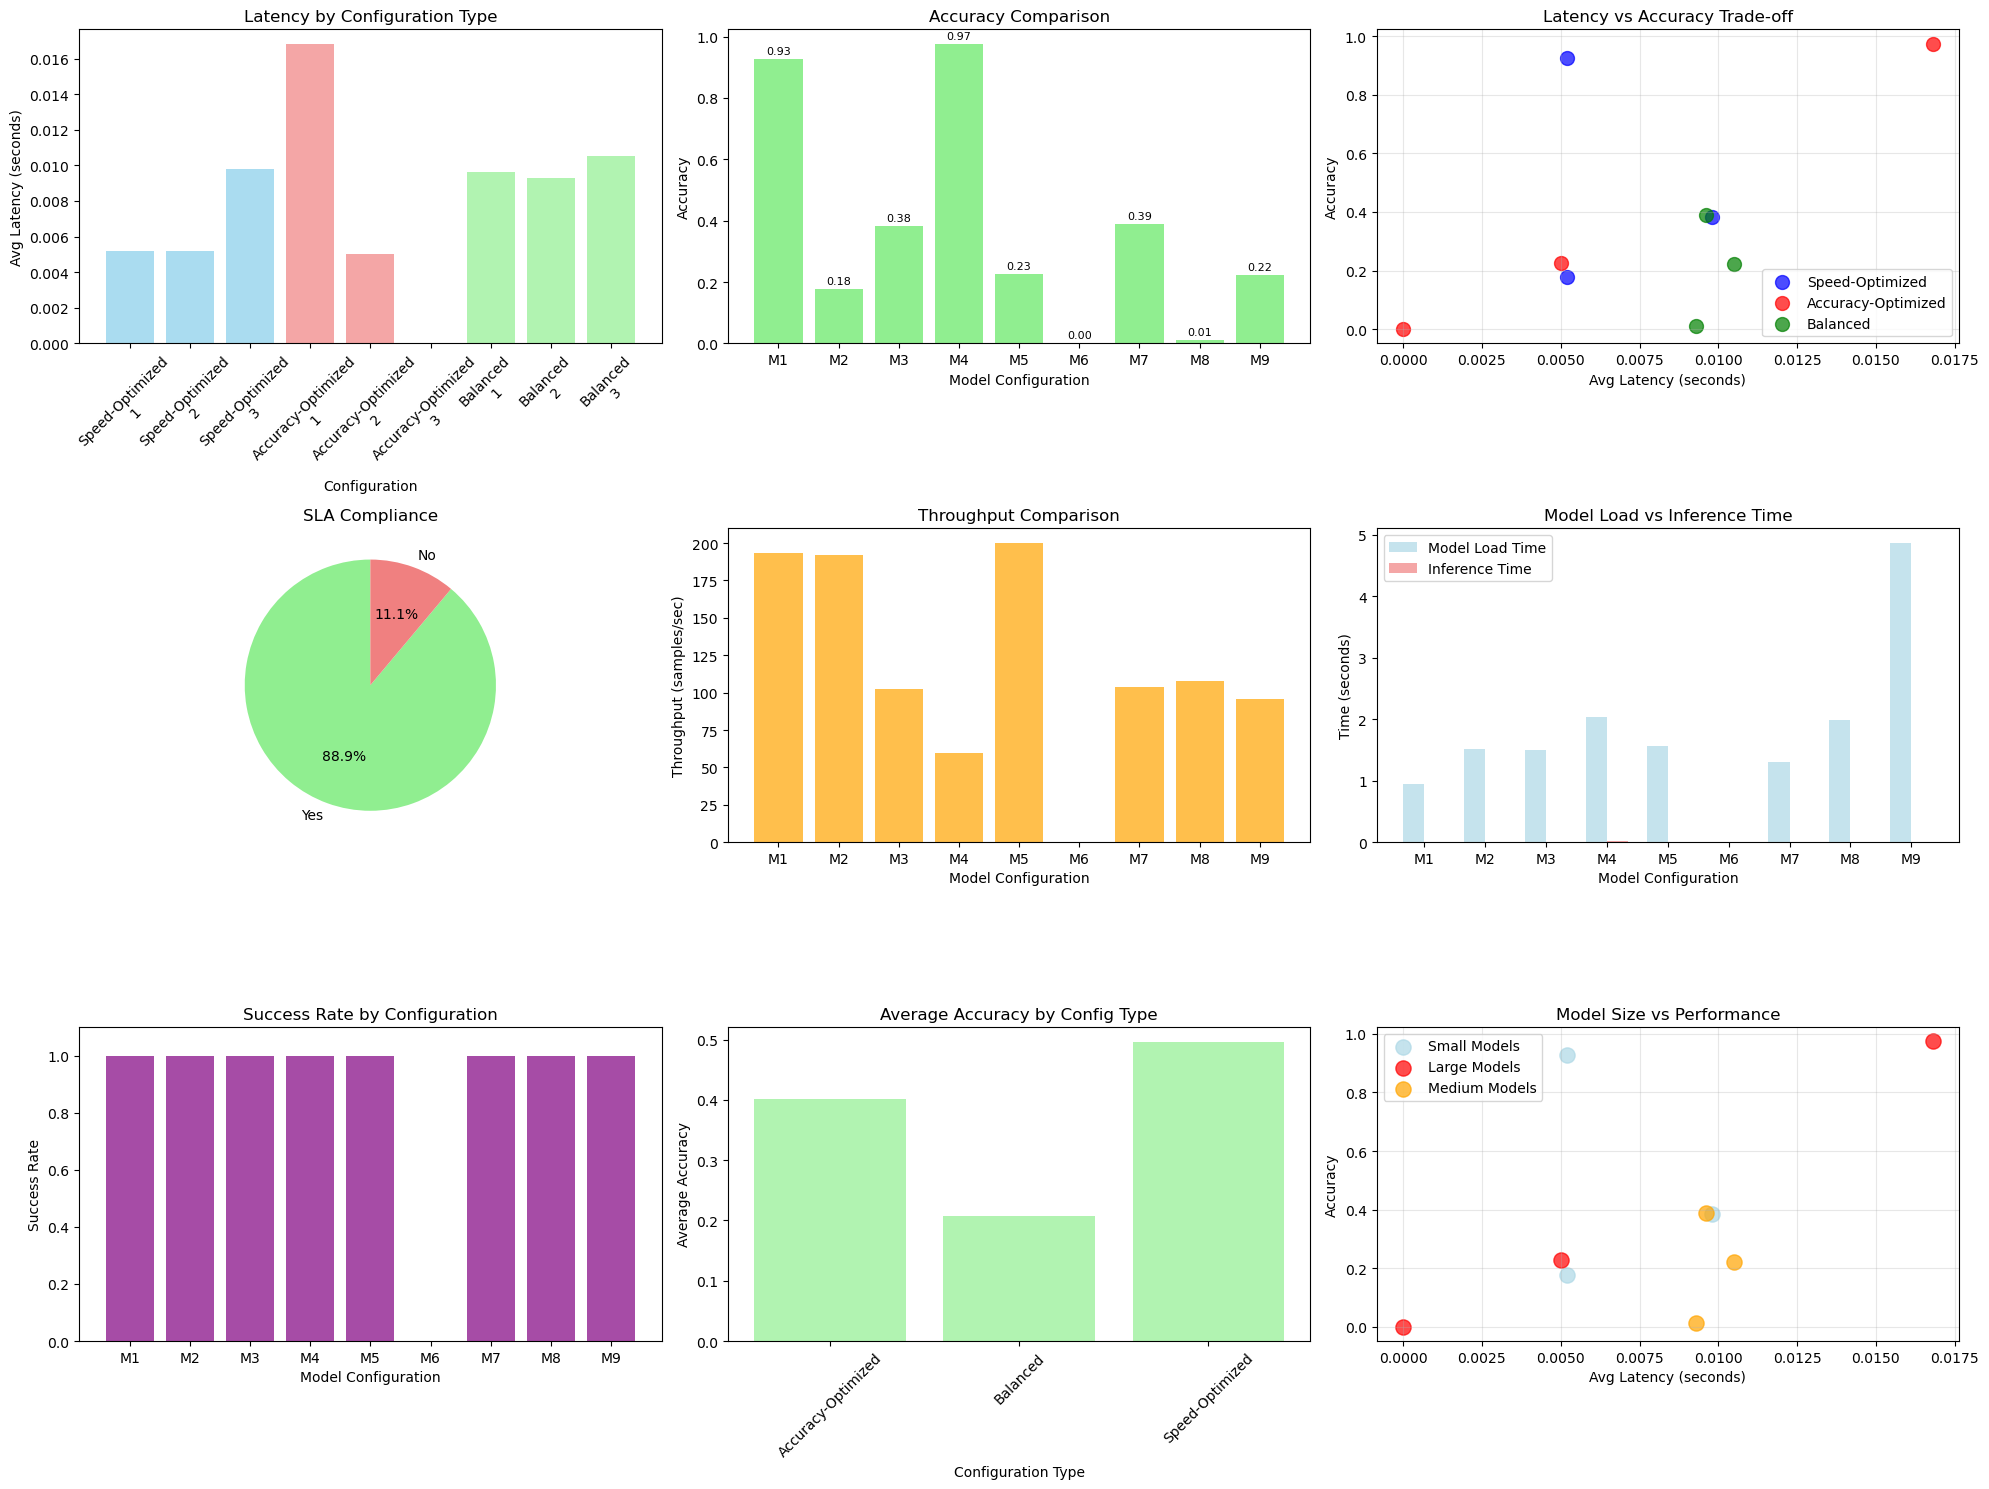


DETAILED STATISTICS

Performance by Configuration Type:

Speed-Optimized:
  Average Latency: 0.0067s
  Average Accuracy: 0.496
  SLA Compliance: 3/3
  Average Throughput: 162.60 samples/sec

Accuracy-Optimized:
  Average Latency: 0.0073s
  Average Accuracy: 0.401
  SLA Compliance: 2/3
  Average Throughput: 86.48 samples/sec

Balanced:
  Average Latency: 0.0098s
  Average Accuracy: 0.208
  SLA Compliance: 3/3
  Average Throughput: 102.31 samples/sec

Overall Statistics:
Best Accuracy: 0.975
Fastest Latency: 0.0000s
Average Latency: 0.0079s
Total SLA Compliance Rate: 8/9 (88.9%)


In [19]:
# Enhanced performance analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

# Performance Analysis
print("\n" + "="*60)
print("PERFORMANCE ANALYSIS")
print("="*60)

# Check if we have data
if len(results_df) == 0:
    print("No results to visualize. Please run the pipeline testing first.")
else:
    # Best performing model by accuracy
    best_accuracy_idx = results_df['Accuracy'].idxmax()
    best_model = results_df.iloc[best_accuracy_idx]
    print(f"Best Accuracy: {best_model['Configuration']} - {best_model['Accuracy']}")

    # Fastest model (use correct column name)
    latency_col = 'Avg_Total_Latency_sec' if 'Avg_Total_Latency_sec' in results_df.columns else 'Avg_Latency_sec'
    fastest_idx = results_df[latency_col].idxmin()
    fastest_model = results_df.iloc[fastest_idx]
    print(f"Fastest Model: {fastest_model['Configuration']} - {fastest_model[latency_col]:.4f}s")

    # SLA compliance
    sla_compliant = results_df[results_df['SLA_Met'] == 'Yes']
    print(f"Models meeting SLA: {len(sla_compliant)}/{len(results_df)}")

    # Create comprehensive visualizations
    fig = plt.figure(figsize=(20, 15))

    # 1. Latency comparison by configuration type
    ax1 = plt.subplot(3, 3, 1)
    config_types = results_df['Config_Type'].unique()
    colors = ['skyblue', 'lightcoral', 'lightgreen']
    
    for i, config_type in enumerate(config_types):
        type_data = results_df[results_df['Config_Type'] == config_type]
        ax1.bar([f"{config_type}\n{j+1}" for j in range(len(type_data))], 
                type_data[latency_col], 
                color=colors[i % len(colors)], 
                alpha=0.7,
                label=config_type)
    
    ax1.set_xlabel('Configuration')
    ax1.set_ylabel('Avg Latency (seconds)')
    ax1.set_title('Latency by Configuration Type')
    ax1.tick_params(axis='x', rotation=45)

    # 2. Accuracy comparison
    ax2 = plt.subplot(3, 3, 2)
    bars = ax2.bar(range(len(results_df)), results_df['Accuracy'], 
                   color=['lightgreen' if x == 'Yes' else 'lightcoral' 
                          for x in results_df['SLA_Met']])
    ax2.set_xlabel('Model Configuration')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy Comparison')
    ax2.set_xticks(range(len(results_df)))
    ax2.set_xticklabels([f"M{i+1}" for i in range(len(results_df))])

    # Add value labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.2f}', ha='center', va='bottom', fontsize=8)

    # 3. Latency vs Accuracy scatter plot
    ax3 = plt.subplot(3, 3, 3)
    colors_scatter = {'Speed-Optimized': 'blue', 'Accuracy-Optimized': 'red', 'Balanced': 'green'}
    for config_type in results_df['Config_Type'].unique():
        type_data = results_df[results_df['Config_Type'] == config_type]
        ax3.scatter(type_data[latency_col], type_data['Accuracy'], 
                   s=100, alpha=0.7, label=config_type,
                   color=colors_scatter.get(config_type, 'gray'))
    
    ax3.set_xlabel('Avg Latency (seconds)')
    ax3.set_ylabel('Accuracy')
    ax3.set_title('Latency vs Accuracy Trade-off')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. SLA compliance pie chart
    ax4 = plt.subplot(3, 3, 4)
    sla_counts = results_df['SLA_Met'].value_counts()
    colors_pie = ['lightgreen', 'lightcoral']
    wedges, texts, autotexts = ax4.pie(sla_counts.values, labels=sla_counts.index, 
                                       autopct='%1.1f%%', startangle=90,
                                       colors=colors_pie)
    ax4.set_title('SLA Compliance')

    # 5. Throughput comparison
    ax5 = plt.subplot(3, 3, 5)
    if 'Throughput_samples_per_sec' in results_df.columns:
        ax5.bar(range(len(results_df)), results_df['Throughput_samples_per_sec'], 
                color='orange', alpha=0.7)
        ax5.set_xlabel('Model Configuration')
        ax5.set_ylabel('Throughput (samples/sec)')
        ax5.set_title('Throughput Comparison')
        ax5.set_xticks(range(len(results_df)))
        ax5.set_xticklabels([f"M{i+1}" for i in range(len(results_df))])

    # 6. Model loading time vs inference time
    ax6 = plt.subplot(3, 3, 6)
    if 'Model_Load_Time_sec' in results_df.columns and 'Avg_Inference_Latency_sec' in results_df.columns:
        x_pos = range(len(results_df))
        width = 0.35
        
        ax6.bar([x - width/2 for x in x_pos], results_df['Model_Load_Time_sec'], 
                width, label='Model Load Time', color='lightblue', alpha=0.7)
        ax6.bar([x + width/2 for x in x_pos], results_df['Avg_Inference_Latency_sec'], 
                width, label='Inference Time', color='lightcoral', alpha=0.7)
        
        ax6.set_xlabel('Model Configuration')
        ax6.set_ylabel('Time (seconds)')
        ax6.set_title('Model Load vs Inference Time')
        ax6.set_xticks(x_pos)
        ax6.set_xticklabels([f"M{i+1}" for i in range(len(results_df))])
        ax6.legend()

    # 7. Success rate comparison
    ax7 = plt.subplot(3, 3, 7)
    if 'Success_Rate' in results_df.columns:
        ax7.bar(range(len(results_df)), results_df['Success_Rate'], 
                color='purple', alpha=0.7)
        ax7.set_xlabel('Model Configuration')
        ax7.set_ylabel('Success Rate')
        ax7.set_title('Success Rate by Configuration')
        ax7.set_xticks(range(len(results_df)))
        ax7.set_xticklabels([f"M{i+1}" for i in range(len(results_df))])
        ax7.set_ylim(0, 1.1)

    # 8. Configuration type performance summary
    ax8 = plt.subplot(3, 3, 8)
    summary_data = results_df.groupby('Config_Type').agg({
        latency_col: 'mean',
        'Accuracy': 'mean',
        'Throughput_samples_per_sec': 'mean' if 'Throughput_samples_per_sec' in results_df.columns else lambda x: 0
    }).reset_index()
    
    x_pos = range(len(summary_data))
    ax8.bar(x_pos, summary_data['Accuracy'], color='lightgreen', alpha=0.7)
    ax8.set_xlabel('Configuration Type')
    ax8.set_ylabel('Average Accuracy')
    ax8.set_title('Average Accuracy by Config Type')
    ax8.set_xticks(x_pos)
    ax8.set_xticklabels(summary_data['Config_Type'], rotation=45)

    # 9. Model size vs performance
    ax9 = plt.subplot(3, 3, 9)
    size_colors = {'Small': 'lightblue', 'Medium': 'orange', 'Large': 'red'}
    for size in results_df['Model_Size'].unique():
        size_data = results_df[results_df['Model_Size'] == size]
        ax9.scatter(size_data[latency_col], size_data['Accuracy'], 
                   s=120, alpha=0.7, label=f'{size} Models',
                   color=size_colors.get(size, 'gray'))
    
    ax9.set_xlabel('Avg Latency (seconds)')
    ax9.set_ylabel('Accuracy')
    ax9.set_title('Model Size vs Performance')
    ax9.legend()
    ax9.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Additional summary statistics
    print("\n" + "="*60)
    print("DETAILED STATISTICS")
    print("="*60)
    
    # Performance by configuration type
    print("\nPerformance by Configuration Type:")
    for config_type in results_df['Config_Type'].unique():
        type_data = results_df[results_df['Config_Type'] == config_type]
        print(f"\n{config_type}:")
        print(f"  Average Latency: {type_data[latency_col].mean():.4f}s")
        print(f"  Average Accuracy: {type_data['Accuracy'].mean():.3f}")
        print(f"  SLA Compliance: {(type_data['SLA_Met'] == 'Yes').sum()}/{len(type_data)}")
        if 'Throughput_samples_per_sec' in results_df.columns:
            print(f"  Average Throughput: {type_data['Throughput_samples_per_sec'].mean():.2f} samples/sec")

    print(f"\nOverall Statistics:")
    print(f"Best Accuracy: {results_df['Accuracy'].max():.3f}")
    print(f"Fastest Latency: {results_df[latency_col].min():.4f}s")
    print(f"Average Latency: {results_df[latency_col].mean():.4f}s")
    print(f"Total SLA Compliance Rate: {(results_df['SLA_Met'] == 'Yes').sum()}/{len(results_df)} ({(results_df['SLA_Met'] == 'Yes').sum()/len(results_df)*100:.1f}%)")